# Import Libraries and Load Dataframe

In [29]:

import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.metrics as sm
from sklearn.linear_model import LinearRegression, LogisticRegression
import sklearn.model_selection as sms
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error

from sklearn.feature_selection import f_regression, mutual_info_regression

from sklearn.model_selection import TimeSeriesSplit

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV, HalvingGridSearchCV, RandomizedSearchCV
from sklearn.neural_network import MLPRegressor

from sklearn.svm import LinearSVR, LinearSVC
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import IsolationForest

# calculate heuristic class weighting
from sklearn.utils.class_weight import compute_class_weight
import joblib
import statsmodels.api as sm


import tsfel
import ruptures as rpt
%matplotlib inline

In [2]:
df = pd.read_csv('gas+sensor+array+under+dynamic+gas+mixtures/ethylene_methane.txt', delim_whitespace=True, skiprows=1, header=None, names=['Time','Methane','Ethylene','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16'])

In [18]:
df.iloc[0:100,:]

Time  Methane  Ethylene      1        2      3      4      5      6  \
0    0.00      0.0       0.0 -41.98  2067.64 -37.13   2.28   8.63 -26.62   
1    0.01      0.0       0.0 -46.50  2067.88 -28.56  13.69 -12.35 -25.81   
2    0.02      0.0       0.0 -36.16  2055.81 -10.89   8.63  -2.93 -30.34   
3    0.03      0.0       0.0 -50.36  2053.68 -31.96  -0.65  -8.29 -21.60   
4    0.04      0.0       0.0 -37.30  2081.17 -36.16   3.26   5.05 -26.14   
..    ...      ...       ...    ...      ...    ...    ...    ...    ...   
96   0.96      0.0       0.0 -41.66  2065.75  -5.53  39.22  19.73  -5.21   
97   0.97      0.0       0.0 -39.72  2069.30  -2.44  35.28  23.49  -1.79   
98   0.98      0.0       0.0 -41.49  2051.31   0.16  34.62  22.84  -0.81   
99   0.99      0.0       0.0 -41.01  2068.36   3.09  34.95  19.73   1.63   
100  1.00      0.0       0.0 -41.17  2081.41   2.77  56.30  28.40   4.23   

         7      8        9       10       11       12       13       14  \
0    -8.46  -0.33  3437.73  2728.14  4054.03  4007.89  4478.27  5056.98   
1    -5.04  -5.04  3432.44  2734.47  4038.62  4019.40  4496.72  5051.81   
2    -9.27  -2.12  3438.61  2719.97  4030.92  4025.48  4489.54  5057.35   
3     7.98   2.28  3429.51  2720.50  4040.22  4000.87  4485.44  5049.60   
4    -7.48  -0.65  3436.85  2719.71  4029.64  4007.25  4499.12  5057.35   
..     ...    ...      ...      ...      ...      ...      ...      ...   
96   16.30  35.12  3448.91  2736.85  4051.14  3997.04  4476.57  5059.56   
97   22.84  29.71  3442.44  2741.87  4032.20  4004.70  4477.59  5066.58   
98   16.96  33.15  3449.79  2724.45  4035.73  4003.74  4481.00  5066.58   
99   15.16  33.15  3443.32  2739.75  4041.82  3991.94  4464.30  5068.43   
100  21.86  34.95  3435.38  2723.39  4040.22  4017.80  4494.33  5046.29   

          15       16  
0    3639.09  3128.49  
1    3636.97  3115.03  
2    3641.81  3105.24  
3    3642.72  3124.84  
4    3674.30  3147.59  
..       ...      ...  
96   3652.73  3148.15  
97   3671.56  3123.72  
98   3650.00  3157.16  
99   3656.67  3122.60  
100  3635.46  3131.01  

[101 rows x 19 columns]

In [3]:
df.head()

Time  Methane  Ethylene      1        2      3      4      5      6     7  \
0  0.00      0.0       0.0 -41.98  2067.64 -37.13   2.28   8.63 -26.62 -8.46   
1  0.01      0.0       0.0 -46.50  2067.88 -28.56  13.69 -12.35 -25.81 -5.04   
2  0.02      0.0       0.0 -36.16  2055.81 -10.89   8.63  -2.93 -30.34 -9.27   
3  0.03      0.0       0.0 -50.36  2053.68 -31.96  -0.65  -8.29 -21.60  7.98   
4  0.04      0.0       0.0 -37.30  2081.17 -36.16   3.26   5.05 -26.14 -7.48   

      8        9       10       11       12       13       14       15  \
0 -0.33  3437.73  2728.14  4054.03  4007.89  4478.27  5056.98  3639.09   
1 -5.04  3432.44  2734.47  4038.62  4019.40  4496.72  5051.81  3636.97   
2 -2.12  3438.61  2719.97  4030.92  4025.48  4489.54  5057.35  3641.81   
3  2.28  3429.51  2720.50  4040.22  4000.87  4485.44  5049.60  3642.72   
4 -0.65  3436.85  2719.71  4029.64  4007.25  4499.12  5057.35  3674.30   

        16  
0  3128.49  
1  3115.03  
2  3105.24  
3  3124.84  
4  3147.59

In [4]:
df.describe()

Time       Methane      Ethylene             1             2  \
count  4.178504e+06  4.178504e+06  4.178504e+06  4.178504e+06  4.178504e+06   
mean   2.089566e+04  5.808503e+01  4.369478e+00  2.520157e+03  1.711449e+03   
std    1.206404e+04  7.663941e+01  5.521296e+00  2.532045e+02  1.184762e+02   
min    0.000000e+00  0.000000e+00  0.000000e+00 -5.648000e+01  1.568880e+03   
25%    1.044672e+04  0.000000e+00  0.000000e+00  2.335120e+03  1.639010e+03   
50%    2.089672e+04  0.000000e+00  0.000000e+00  2.463490e+03  1.701300e+03   
75%    3.134324e+04  1.000000e+02  8.330000e+00  2.676930e+03  1.754580e+03   
max    4.179019e+04  2.966700e+02  2.000000e+01  3.402560e+03  9.825750e+03   

                  3             4             5             6             7  \
count  4.178504e+06  4.178504e+06  4.178504e+06  4.178504e+06  4.178504e+06   
mean   2.756596e+03  3.035848e+03  1.863258e+03  2.386329e+03  2.689914e+03   
std    1.150495e+03  1.252085e+03  1.104965e+03  1.425092e+03  1.102780e+03   
min   -4.778000e+01 -6.830000e+00 -1.268000e+01 -4.198000e+01 -1.528000e+01   
25%    1.581310e+03  1.750760e+03  8.197600e+02  1.061500e+03  1.533260e+03   
50%    2.885640e+03  3.199850e+03  1.393180e+03  1.688830e+03  2.785620e+03   
75%    3.798990e+03  4.172030e+03  2.813350e+03  3.605260e+03  3.610690e+03   
max    5.567440e+03  6.127680e+03  4.420840e+03  5.707530e+03  5.304140e+03   

                  8             9            10            11            12  \
count  4.178504e+06  4.178504e+06  4.178504e+06  4.178504e+06  4.178504e+06   
mean   2.978962e+03  3.541804e+03  2.823842e+03  2.301598e+03  2.024606e+03   
std    1.229724e+03  2.607058e+02  2.002925e+02  9.875315e+02  8.246309e+02   
min   -1.187000e+01  2.976530e+03  2.367650e+03  6.898700e+02  5.817900e+02   
25%    1.660440e+03  3.344630e+03  2.672740e+03  1.409680e+03  1.201660e+03   
50%    3.136350e+03  3.481370e+03  2.782960e+03  2.174530e+03  2.072150e+03   
75%    4.083020e+03  3.708470e+03  2.943730e+03  3.140840e+03  2.701560e+03   
max    5.820370e+03  4.436430e+03  3.519340e+03  4.849910e+03  4.062070e+03   

                 13            14            15            16  
count  4.178504e+06  4.178504e+06  4.178504e+06  4.178504e+06  
mean   1.687490e+03  1.806279e+03  2.309401e+03  1.862996e+03  
std    9.865598e+02  1.102382e+03  9.652522e+02  7.658043e+02  
min    4.433000e+02  4.239800e+02  7.713900e+02  5.890900e+02  
25%    7.593200e+02  7.685600e+02  1.424110e+03  1.113520e+03  
50%    1.266570e+03  1.332660e+03  2.165370e+03  1.839750e+03  
75%    2.543380e+03  2.746090e+03  3.123440e+03  2.506360e+03  
max    4.540980e+03  5.108820e+03  4.699970e+03  3.764370e+03

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4178504 entries, 0 to 4178503
Data columns (total 19 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Time      float64
 1   Methane   float64
 2   Ethylene  float64
 3   1         float64
 4   2         float64
 5   3         float64
 6   4         float64
 7   5         float64
 8   6         float64
 9   7         float64
 10  8         float64
 11  9         float64
 12  10        float64
 13  11        float64
 14  12        float64
 15  13        float64
 16  14        float64
 17  15        float64
 18  16        float64
dtypes: float64(19)
memory usage: 605.7 MB


# Split Data into Train, Test, and Deployment Sets

In [5]:
x1 = df[['Time','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16']]
y = df[['Methane', 'Ethylene']]


# Split data sets evenly into training, test, and deployment (40%, 30%, 30%)
x1_train, x1_deployment_test, y_train, y_deployment_test = train_test_split(x1, y, test_size=0.6, random_state=42, shuffle = False)
x1_test, x1_deployment, y_test, y_deployment = train_test_split(x1_deployment_test, y_deployment_test, test_size = 0.5, shuffle =  False)

In [4]:
x1_deployment.info(), x1_train.info(), x1_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1253552 entries, 2924952 to 4178503
Data columns (total 17 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   Time    1253552 non-null  float64
 1   1       1253552 non-null  float64
 2   2       1253552 non-null  float64
 3   3       1253552 non-null  float64
 4   4       1253552 non-null  float64
 5   5       1253552 non-null  float64
 6   6       1253552 non-null  float64
 7   7       1253552 non-null  float64
 8   8       1253552 non-null  float64
 9   9       1253552 non-null  float64
 10  10      1253552 non-null  float64
 11  11      1253552 non-null  float64
 12  12      1253552 non-null  float64
 13  13      1253552 non-null  float64
 14  14      1253552 non-null  float64
 15  15      1253552 non-null  float64
 16  16      1253552 non-null  float64
dtypes: float64(17)
memory usage: 172.1 MB
<class 'pandas.core.frame.DataFrame'>
Index: 1671401 entries, 0 to 1671400
Data columns (total 17 colu

(None, None, None)

In [5]:
x1_deployment

Time        1        2        3        4        5        6  \
2924952  29253.99  2402.60  1667.96  2169.71  2474.11  2469.30  3247.09   
2924953  29254.00  2424.42  1655.57  2166.34  2472.34  2472.34  3256.24   
2924954  29254.01  2422.91  1663.09  2174.29  2459.95  2462.22  3280.02   
2924955  29254.02  2417.14  1658.22  2167.06  2466.52  2481.46  3245.66   
2924956  29254.03  2416.89  1659.77  2155.26  2468.80  2470.32  3254.81   
...           ...      ...      ...      ...      ...      ...      ...   
4178499  41790.15  2348.01  1599.24  1329.94  1488.62  1031.11  1431.76   
4178500  41790.16  2341.81  1605.37  1333.28  1479.61  1022.80  1421.56   
4178501  41790.17  2345.78  1604.06  1337.47  1475.10  1022.61  1423.68   
4178502  41790.18  2350.25  1594.86  1323.68  1492.49  1041.03  1434.53   
4178503  41790.19  2348.01  1598.80  1338.93  1490.34  1033.49  1405.23   

               7        8        9       10       11       12       13  \
2924952  2283.58  2698.94  3350.14  2687.14  1358.22  1544.97  2275.48   
2924953  2291.69  2707.87  3349.27  2685.57  1346.47  1539.33  2276.71   
2924954  2291.20  2708.92  3351.30  2681.64  1341.65  1537.38  2276.71   
2924955  2280.14  2704.71  3358.55  2688.97  1345.00  1535.86  2249.05   
2924956  2282.10  2704.45  3359.72  2698.68  1360.95  1529.15  2242.21   
...          ...      ...      ...      ...      ...      ...      ...   
4178499  1335.58  1506.05  3300.43  2634.70  1156.91   975.15   972.41   
4178500  1336.00  1500.45  3277.72  2640.67  1155.49   975.15   963.60   
4178501  1345.63  1504.76  3299.56  2622.24  1153.47   964.18   978.68   
4178502  1338.72  1508.85  3296.69  2640.15  1150.03   971.04   976.92   
4178503  1337.68  1518.34  3292.95  2633.40  1152.05   977.51   984.96   

              14       15       16  
2924952  2389.34  1577.16  1397.20  
2924953  2410.37  1562.35  1409.05  
2924954  2394.84  1557.78  1404.60  
2924955  2412.12  1584.80  1420.92  
2924956  2411.62  1568.66  1424.11  
...          ...      ...      ...  
4178499   929.27  1211.47   948.94  
4178500   938.42  1222.74   937.25  
4178501   949.92  1204.32   921.50  
4178502   940.76  1212.09   946.99  
4178503   934.14  1201.46   932.38  

[1253552 rows x 17 columns]

In [6]:
# Combine the dataframes
train_df = pd.concat([x1_train, y_train], axis = 1)
test_df = pd.concat([x1_test, y_test], axis = 1)

# Perform Initial Round of EDA 
(Need to verify each sensor is working)

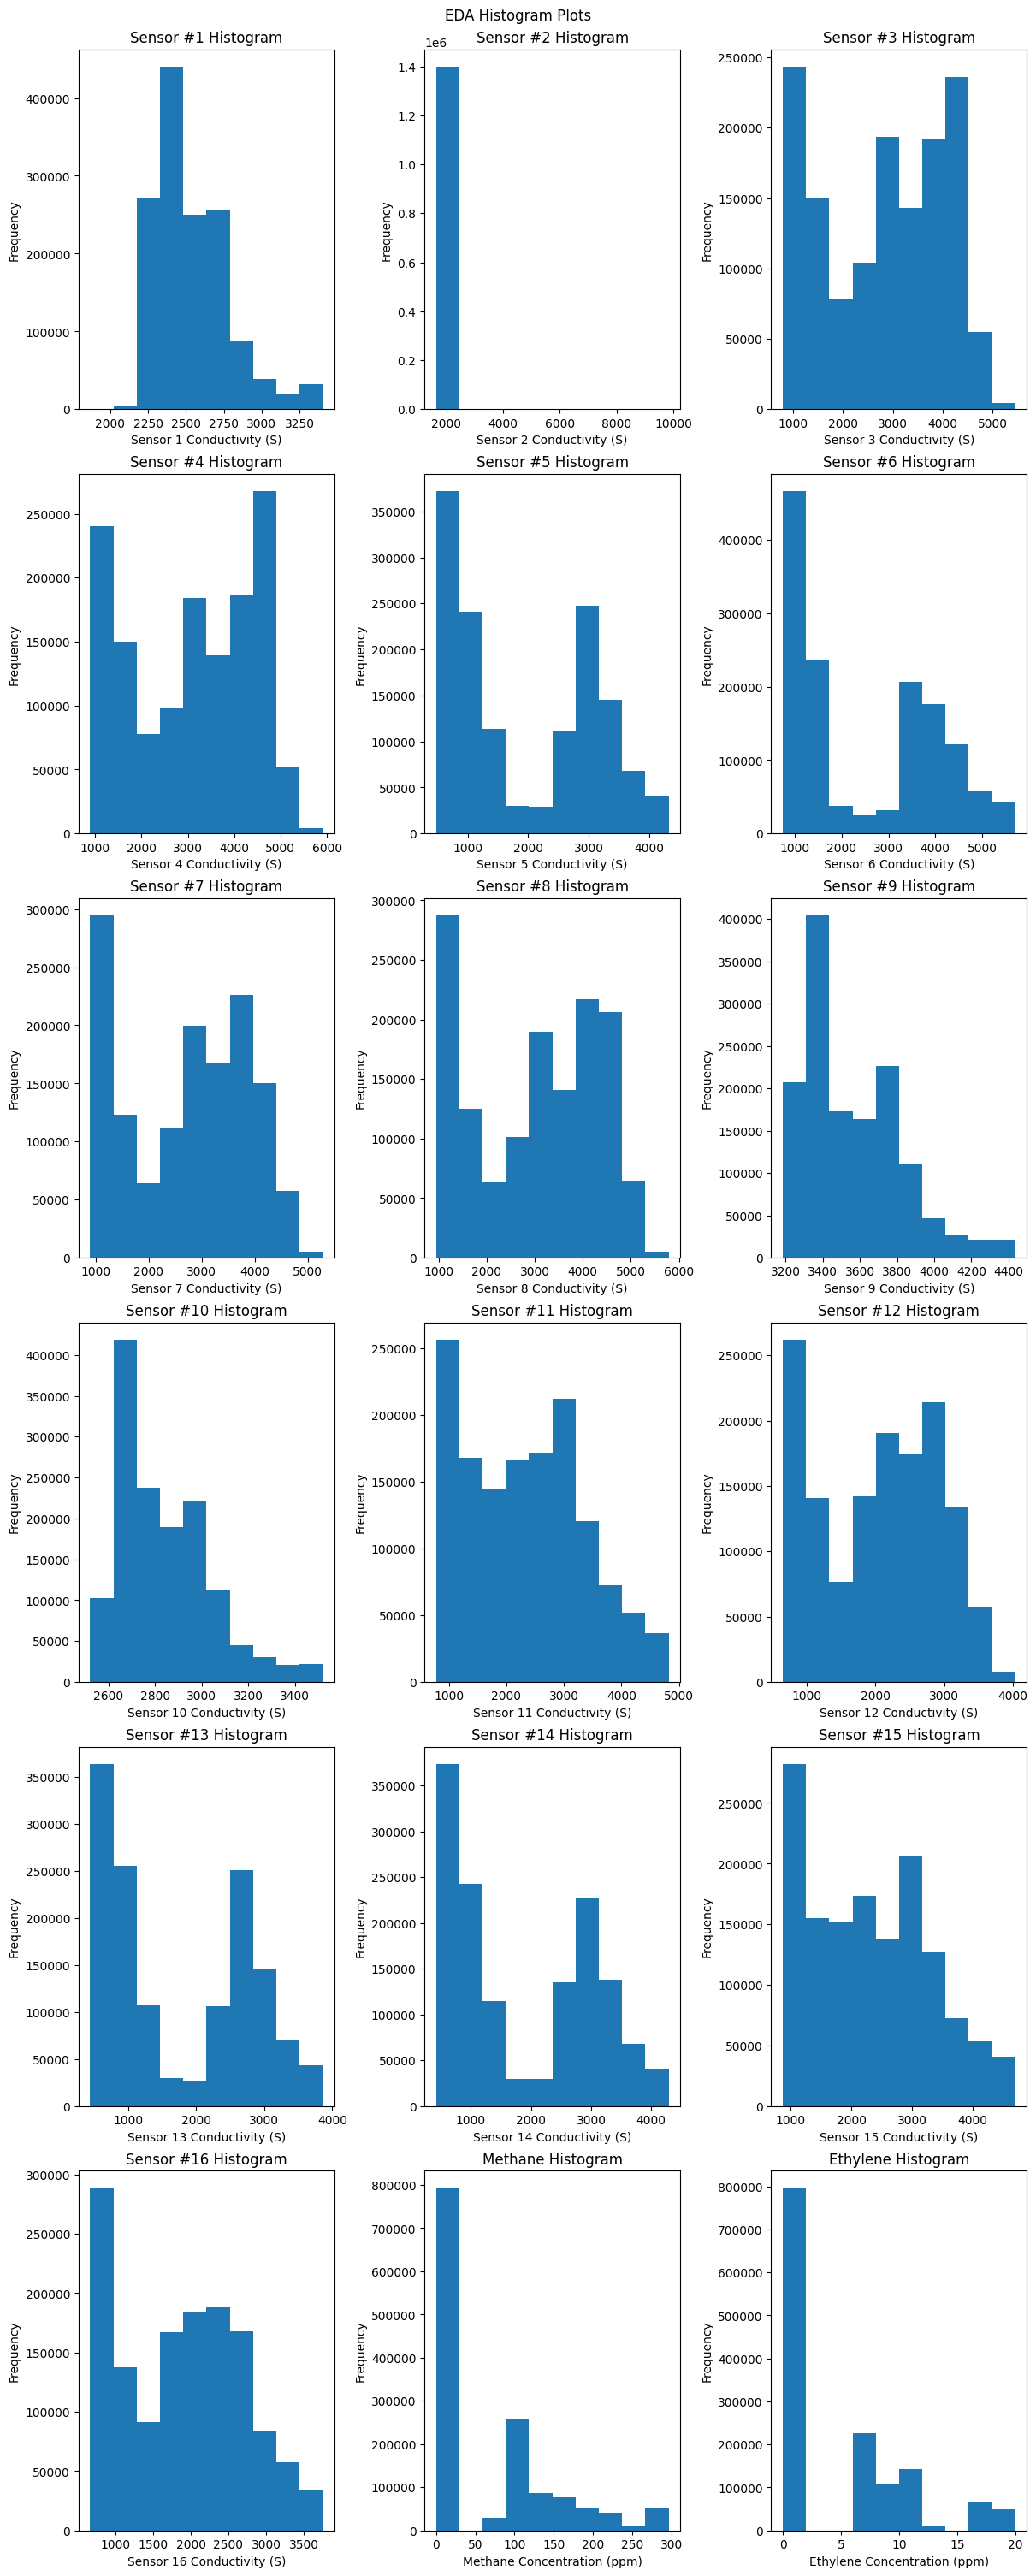

In [12]:
# Plot standard plots (all histograms + a time scatter plot)
fig = plt.figure(figsize = (12, 30), layout = "constrained")
fig.suptitle("EDA Histogram Plots")
for i in range(1, 19):
    ax1 = fig.add_subplot(18//3, 3, i)
    ax1.hist(train_df.iloc[:,i])
    x_label_string = train_df.iloc[:,i].name
    if i < 17:
        x_label_string = "Sensor " + x_label_string + " Conductivity (S)"
    else: 
        x_label_string = x_label_string + " Concentration (ppm)"
    ax1.set_xlabel(x_label_string)
    ax1.set_ylabel("Frequency")
    if i < 17:
        ax1.title.set_text("Sensor #" + train_df.iloc[:,i].name + " Histogram")
    else:
        ax1.title.set_text(train_df.iloc[:,i].name + " Histogram") 
plt.show()

In [141]:
import matplotlib
color_list = ["pink", "red", "maroon", "salmon", "orange", "yellow", "yellowgreen", "green", "cyan", "blue", "indigo", "violet", "gray", "black", "brown", "chocolate"]
colors = [matplotlib.colors.cnames[color] for color in color_list]

In [ ]:
# Plot standard plots (all histograms + a time scatter plot) over all datapoints
fig_conduct = plt.figure(figsize = (12, 10), layout = "constrained")
ax_scatter_conduct = fig_conduct.add_subplot(2, 1, 1)
ax_scatter_concentration = fig_conduct.add_subplot(2, 1, 2)
# Cycler for conductivity plots

for i in range(1, 19):
    x_label_string = df.iloc[:,i].name
    if i > 2:
        ax_scatter_conduct.plot(df.iloc[:,0], df.iloc[:,i], label = x_label_string, color = colors[i - 3])
        ax_scatter_conduct.legend()
        ax_scatter_conduct.set_xlabel("Time (s)")
        ax_scatter_conduct.set_ylabel("Conductivity (S)")
        ax_scatter_conduct.title.set_text("Time Plot of Sensors Of All Datapoints") 
        ax_scatter_conduct.legend() 
    else:  
        ax_scatter_concentration.plot(df.iloc[:,0], df.iloc[:,i], label = x_label_string)
        ax_scatter_concentration.legend()
        ax_scatter_concentration.set_xlabel("Time (s)")
        ax_scatter_concentration.set_ylabel("Concentration (ppm)")
        ax_scatter_concentration.title.set_text("Time Plot of Concentrations Of All Datapoints")
        ax_scatter_concentration.legend()   
plt.show()

C:\Users\jacob\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


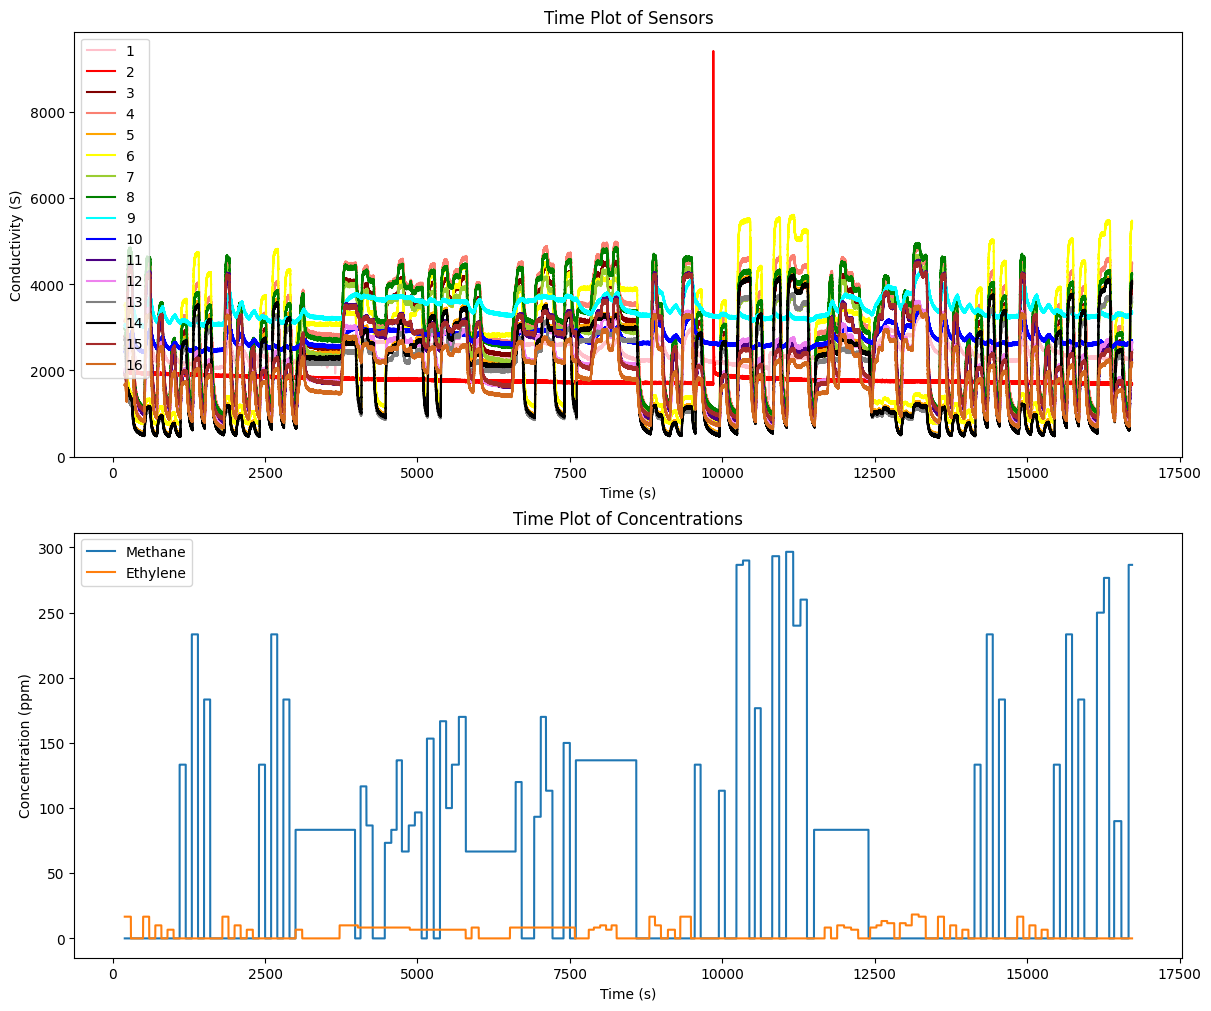

In [142]:
# Plot standard plots (all histograms + a time scatter plot)
fig_conduct = plt.figure(figsize = (12, 10), layout = "constrained")
ax_scatter_conduct = fig_conduct.add_subplot(2, 1, 1)
ax_scatter_concentration = fig_conduct.add_subplot(2, 1, 2)
# Cycler for conductivity plots

for i in range(1, 19):
    x_label_string = train_df.iloc[:,i].name
    if i < 17:
        ax_scatter_conduct.plot(train_df.iloc[:,0], train_df.iloc[:,i], label = x_label_string, color = colors[i - 1])
        ax_scatter_conduct.legend()
        ax_scatter_conduct.set_xlabel("Time (s)")
        ax_scatter_conduct.set_ylabel("Conductivity (S)")
        ax_scatter_conduct.title.set_text("Time Plot of Sensors") 
        ax_scatter_conduct.legend() 
    else:  
        ax_scatter_concentration.plot(train_df.iloc[:,0], train_df.iloc[:,i], label = x_label_string)
        ax_scatter_concentration.legend()
        ax_scatter_concentration.set_xlabel("Time (s)")
        ax_scatter_concentration.set_ylabel("Concentration (ppm)")
        ax_scatter_concentration.title.set_text("Time Plot of Concentrations")
        ax_scatter_concentration.legend()   
plt.show()

Let's check each sensor of each type

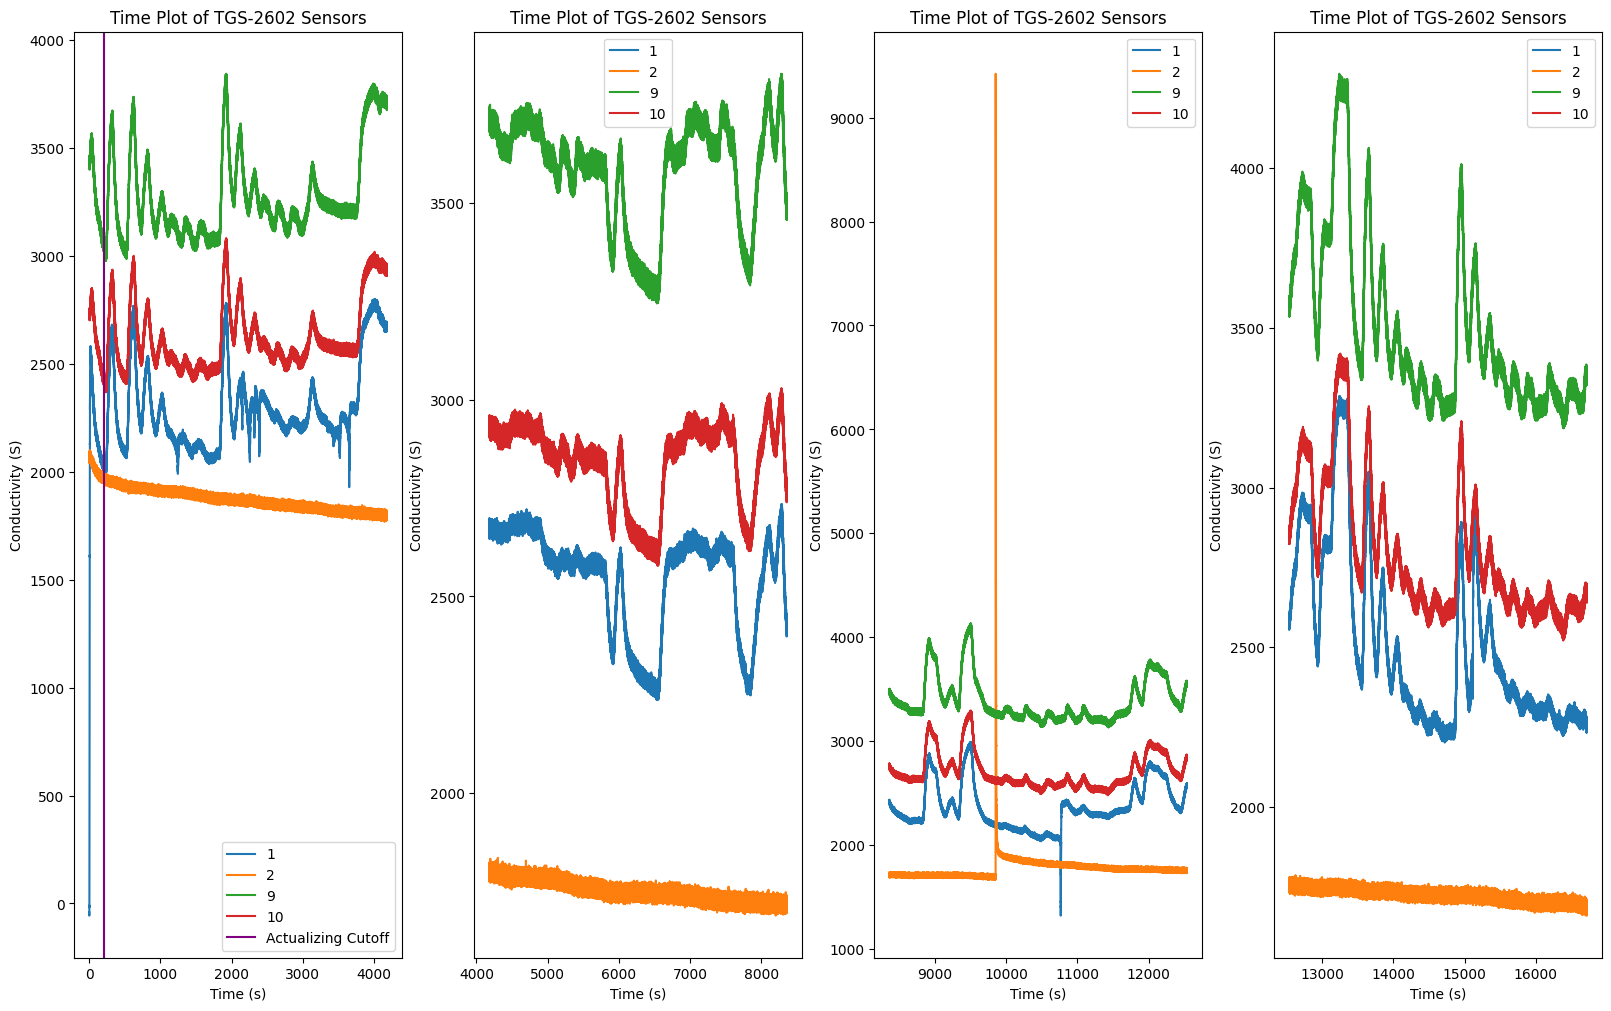

In [11]:
# Plot TG-2602 Sensors Over Time
sensors = [1, 2, 9, 10]
fig_conduct = plt.figure(figsize = (16, 10), layout = "constrained")
# ax_scatter_conduct = fig_conduct.add_subplot(2, 1, 1)
# Cycler for conductivity plots
num_ranges = 4

ax_scatter_conduct_list = [fig_conduct.add_subplot(1, 4, j + 1) for j in range(num_ranges)]
for i in sensors:
    x_label_string = train_df.iloc[:,i].name
    for j in range(num_ranges):
        ax_scatter_conduct = ax_scatter_conduct_list[j]
        ax_scatter_conduct.plot(train_df.iloc[j * train_df.shape[0] // 4: (j + 1) * train_df.shape[0] // 4,0], train_df.iloc[j * train_df.shape[0] // 4: (j + 1) * train_df.shape[0] // 4,i], label = x_label_string)
        ax_scatter_conduct.legend()
        ax_scatter_conduct.set_xlabel("Time (s)")
        ax_scatter_conduct.set_ylabel("Conductivity (S)")
        ax_scatter_conduct.title.set_text("Time Plot of TGS-2602 Sensors") 
        if j > 0:
            ax_scatter_conduct.legend() 
ax_scatter_conduct_list[0].axvline(200, c = "purple", label = "Actualizing Cutoff")
ax_scatter_conduct_list[0].legend()
plt.show()

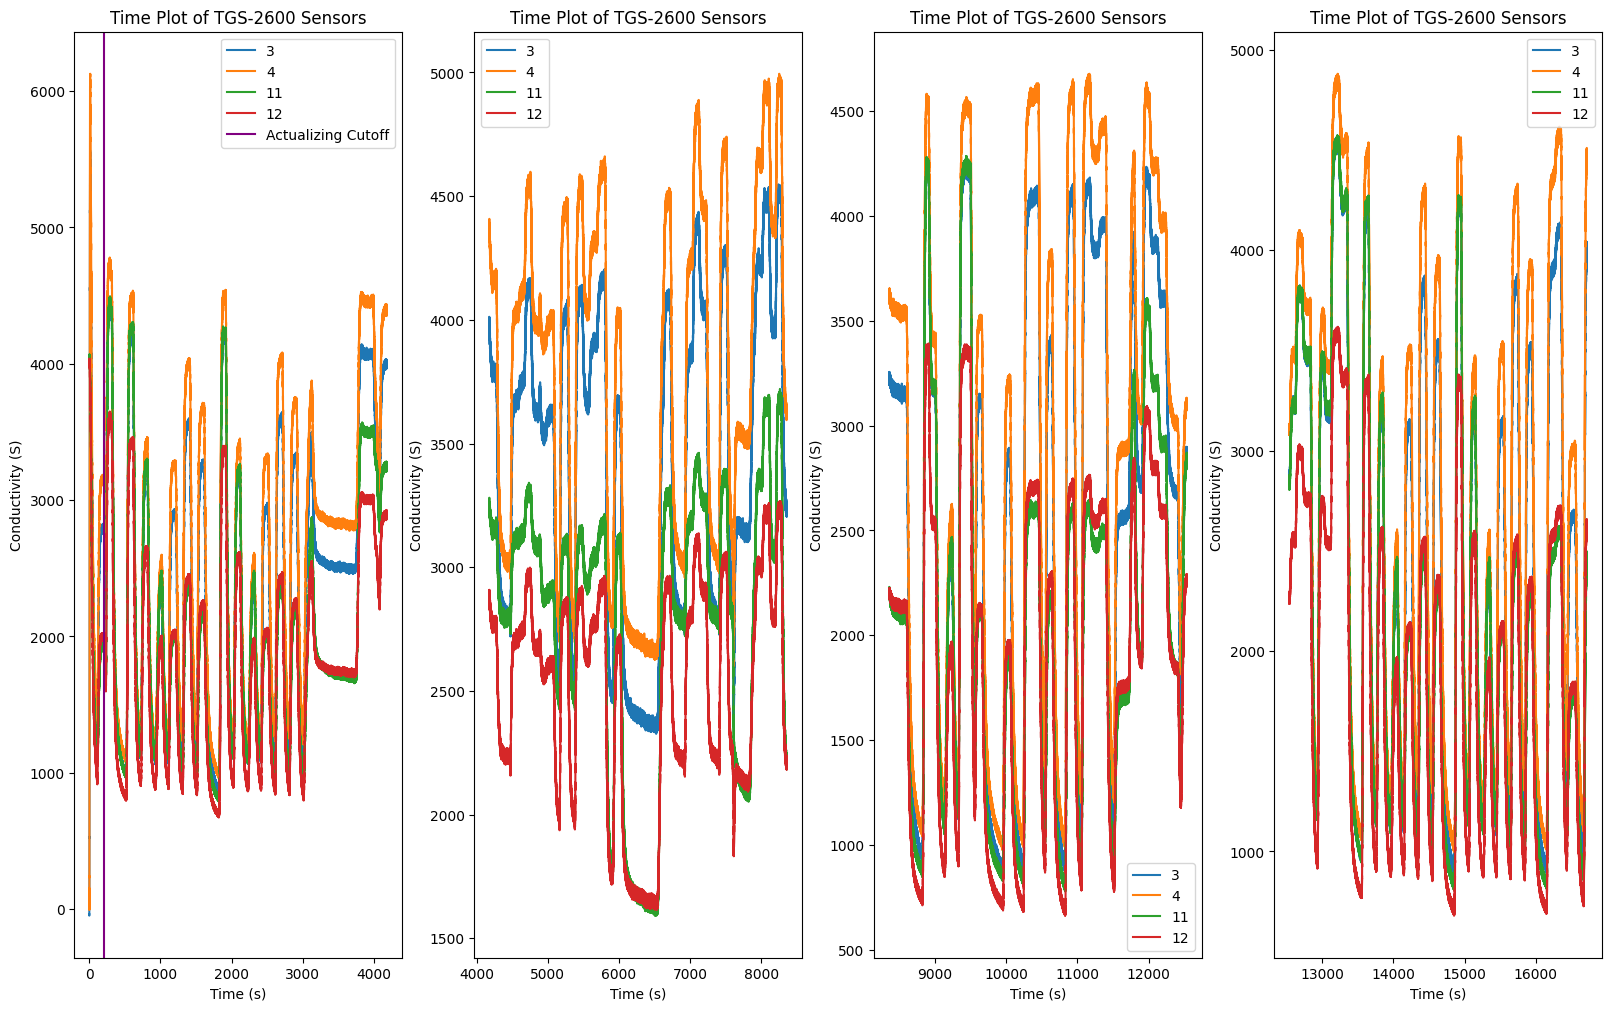

In [10]:
# Plot TG-2600 Sensors Over Time
sensors = [3, 4, 11, 12]
fig_conduct = plt.figure(figsize = (16, 10), layout = "constrained")
# ax_scatter_conduct = fig_conduct.add_subplot(2, 1, 1)
# Cycler for conductivity plots
num_ranges = 4

ax_scatter_conduct_list = [fig_conduct.add_subplot(1, 4, j + 1) for j in range(num_ranges)]
for i in sensors:
    x_label_string = train_df.iloc[:,i].name
    for j in range(num_ranges):
        ax_scatter_conduct = ax_scatter_conduct_list[j]
        ax_scatter_conduct.plot(train_df.iloc[j * train_df.shape[0] // 4: (j + 1) * train_df.shape[0] // 4,0], train_df.iloc[j * train_df.shape[0] // 4: (j + 1) * train_df.shape[0] // 4,i], label = x_label_string)
        ax_scatter_conduct.legend()
        ax_scatter_conduct.set_xlabel("Time (s)")
        ax_scatter_conduct.set_ylabel("Conductivity (S)")
        ax_scatter_conduct.title.set_text("Time Plot of TGS-2600 Sensors") 
        if j > 0:
            ax_scatter_conduct.legend() 
ax_scatter_conduct_list[0].axvline(200, c = "purple", label = "Actualizing Cutoff")
ax_scatter_conduct_list[0].legend()
plt.show()

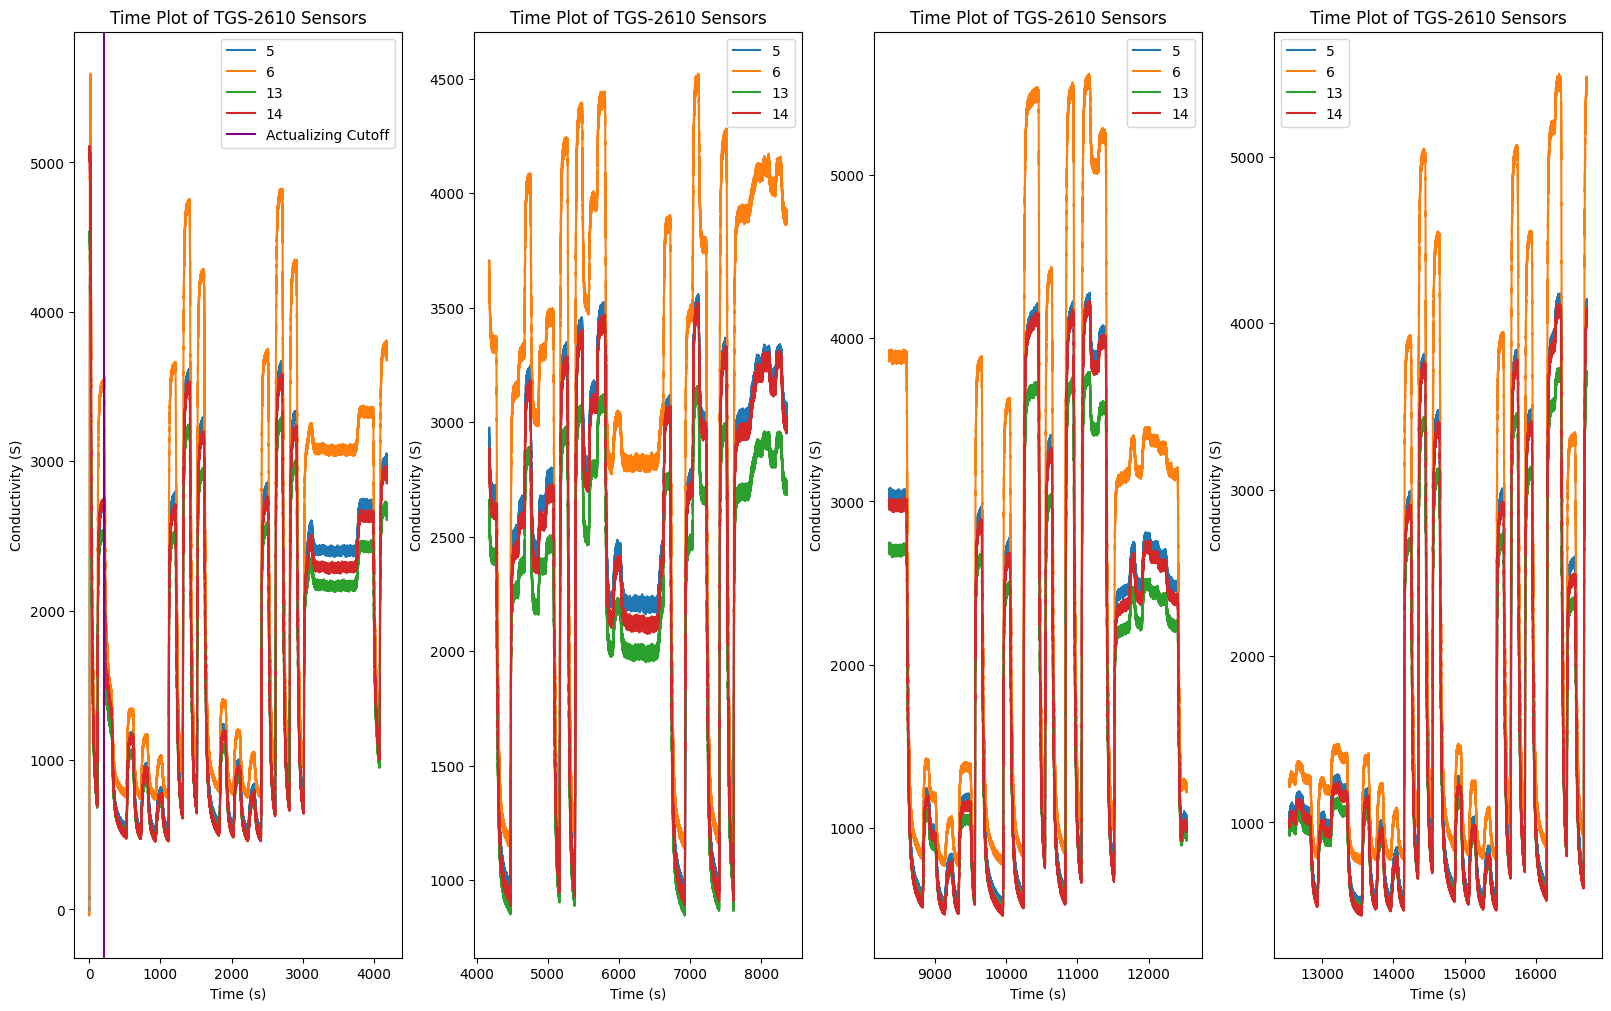

In [9]:
# Plot TG-2610 Sensors Over Time
sensors = [5, 6, 13, 14]
fig_conduct = plt.figure(figsize = (16, 10), layout = "constrained")
# ax_scatter_conduct = fig_conduct.add_subplot(2, 1, 1)
# Cycler for conductivity plots
num_ranges = 4

ax_scatter_conduct_list = [fig_conduct.add_subplot(1, 4, j + 1) for j in range(num_ranges)]
for i in sensors:
    x_label_string = train_df.iloc[:,i].name
    for j in range(num_ranges):
        ax_scatter_conduct = ax_scatter_conduct_list[j]
        ax_scatter_conduct.plot(train_df.iloc[j * train_df.shape[0] // 4: (j + 1) * train_df.shape[0] // 4,0], train_df.iloc[j * train_df.shape[0] // 4: (j + 1) * train_df.shape[0] // 4,i], label = x_label_string)
        ax_scatter_conduct.legend()
        ax_scatter_conduct.set_xlabel("Time (s)")
        ax_scatter_conduct.set_ylabel("Conductivity (S)")
        ax_scatter_conduct.title.set_text("Time Plot of TGS-2610 Sensors") 
        if j > 0:
            ax_scatter_conduct.legend() 
ax_scatter_conduct_list[0].axvline(200, c = "purple", label = "Actualizing Cutoff")
ax_scatter_conduct_list[0].legend()
plt.show()

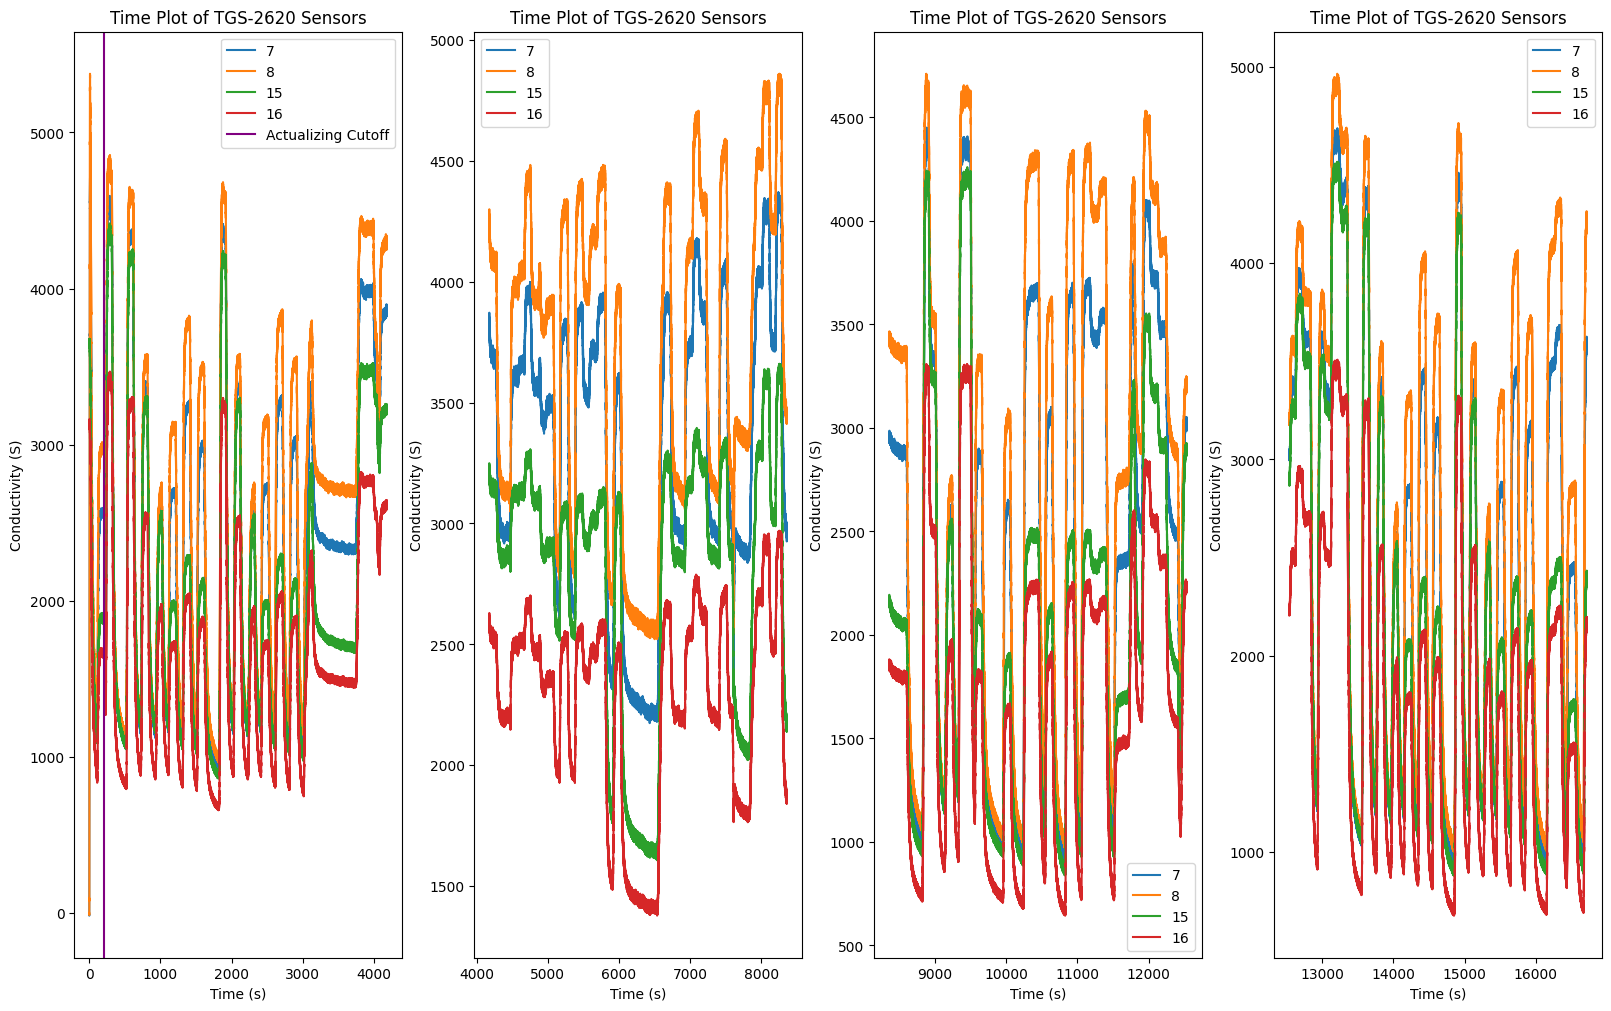

In [12]:
# Plot TG-2620 Sensors Over Time
sensors = [7, 8, 15, 16]
fig_conduct = plt.figure(figsize = (16, 10), layout = "constrained")
# ax_scatter_conduct = fig_conduct.add_subplot(2, 1, 1)
# Cycler for conductivity plots
num_ranges = 4

ax_scatter_conduct_list = [fig_conduct.add_subplot(1, 4, j + 1) for j in range(num_ranges)]
for i in sensors:
    x_label_string = train_df.iloc[:,i].name
    for j in range(num_ranges):
        ax_scatter_conduct = ax_scatter_conduct_list[j]
        ax_scatter_conduct.plot(train_df.iloc[j * train_df.shape[0] // 4: (j + 1) * train_df.shape[0] // 4,0], train_df.iloc[j * train_df.shape[0] // 4: (j + 1) * train_df.shape[0] // 4,i], label = x_label_string)
        ax_scatter_conduct.legend()
        ax_scatter_conduct.set_xlabel("Time (s)")
        ax_scatter_conduct.set_ylabel("Conductivity (S)")
        ax_scatter_conduct.title.set_text("Time Plot of TGS-2620 Sensors") 
        if j > 0:
            ax_scatter_conduct.legend() 
ax_scatter_conduct_list[0].axvline(200, c = "purple", label = "Actualizing Cutoff")
ax_scatter_conduct_list[0].legend()
plt.show()

# Remove first 200 seconds -> sensor are actualizing first 200 seconds

In [7]:
train_df = train_df[20000:]
x1_train = x1_train[20000:]
y_train = y_train[20000:]

# Sensor 2 is clearly broken. We need to remove it going forward.

In [8]:
# Contain all sensors except sensor 2
good_x_cols = ['Time', '1','3','4','5','6','7','8','9','10','11','12','13','14','15','16']
good_sensor_cols = ['1','3','4','5','6','7','8','9','10','11','12','13','14','15','16']

# Get Specific Y Values

In [9]:
y_meth_train = y_train["Methane"]
y_meth_test = y_test["Methane"]
y_ethy_train = y_train["Ethylene"]
y_ethy_test = y_test["Ethylene"]

In [10]:
y_meth_train_vals = y_meth_train.values
y_meth_test_vals = y_meth_test.values
y_ethy_train_vals = y_ethy_train.values
y_ethy_test_vals = y_ethy_test.values

# F Tests and Mutual Info Tests

In [25]:
# Do f tests
f_test_meth, f_test_meth_p_vals = f_regression(x1_train[good_sensor_cols], y_meth_train)
f_test_meth_norm = f_test_meth / np.max(f_test_meth)
f_test_ethy, f_test_ethy_p_vals = f_regression(x1_train[good_sensor_cols], y_ethy_train)
f_test_ethy_norm = f_test_ethy / np.max(f_test_ethy)

In [26]:
f_test_meth, f_test_ethy

(array([  38208.3231246 ,  291982.22503014,  344621.63762425,
        2141902.20182859, 2448318.61351156,  196280.85559834,
         319139.44905161,   29274.83590325,   44921.66362464,
           9504.39927369,  133616.72719369, 2272785.25880873,
        2215461.01340711,    9487.8106874 ,   55232.83391453]),
 array([ 641747.97440977,  292868.99558562,  242943.73987286,
          17537.34817939,   32180.95176043,  527805.42053175,
         386009.74458974,  677452.15586975,  646202.67282496,
         882487.87731193,  514004.46836175,   19428.57372087,
          15263.72471045, 1158458.36146324,  885654.52910987]))

In [27]:
f_test_meth_norm, f_test_ethy_norm

(array([0.01560594, 0.11925826, 0.14075849, 0.87484619, 1.        ,
        0.08016965, 0.13035046, 0.01195712, 0.01834796, 0.00388201,
        0.05457489, 0.92830453, 0.90489081, 0.00387524, 0.0225595 ]),
 array([0.55396723, 0.25280926, 0.20971297, 0.01513852, 0.02777912,
        0.45561018, 0.33320986, 0.58478766, 0.5578126 , 0.76177781,
        0.44369697, 0.01677106, 0.01317589, 1.        , 0.76451132]))

In [28]:
f_test_meth_p_vals, f_test_ethy_p_vals

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [29]:
# Do mutual information tests
mi_meth = mutual_info_regression(x1_train[good_sensor_cols], y_meth_train)
mi_meth_norm = mi_meth /np.max(mi_meth)
print("Got MI Methane Info:", mi_meth)
print("Normalized:", mi_meth_norm)
mi_ethy = mutual_info_regression(x1_train[good_sensor_cols], y_ethy_train)
mi_ethy_norm = mi_ethy / np.max(mi_ethy)
print("Got MI Ethylene Info:", mi_ethy)
print("Normalized:", mi_ethy_norm)

Got MI Methane Info: [0.63375711 0.75601248 0.7711868  1.17525309 1.27136069 0.87443402
 0.87524631 0.51999221 0.53263246 0.76039585 0.77385114 1.16062193
 1.14863489 0.82719138 0.8271276 ]
Normalized: [0.49848726 0.5946483  0.6065838  0.92440571 1.         0.68779382
 0.68843273 0.40900448 0.41894677 0.59809608 0.60867946 0.91289745
 0.90346894 0.6506347  0.65058453]
Got MI Ethylene Info: [0.43527039 0.35576088 0.34247061 0.40926688 0.45148891 0.48033629
 0.43089013 0.42107979 0.414852   0.56840301 0.43422511 0.38662909
 0.39102575 0.63808418 0.5527368 ]
Normalized: [0.68215199 0.55754536 0.53671696 0.6413995  0.70756951 0.75277887
 0.67528728 0.65991259 0.65015246 0.89079627 0.68051384 0.60592176
 0.61281217 1.         0.86624432]


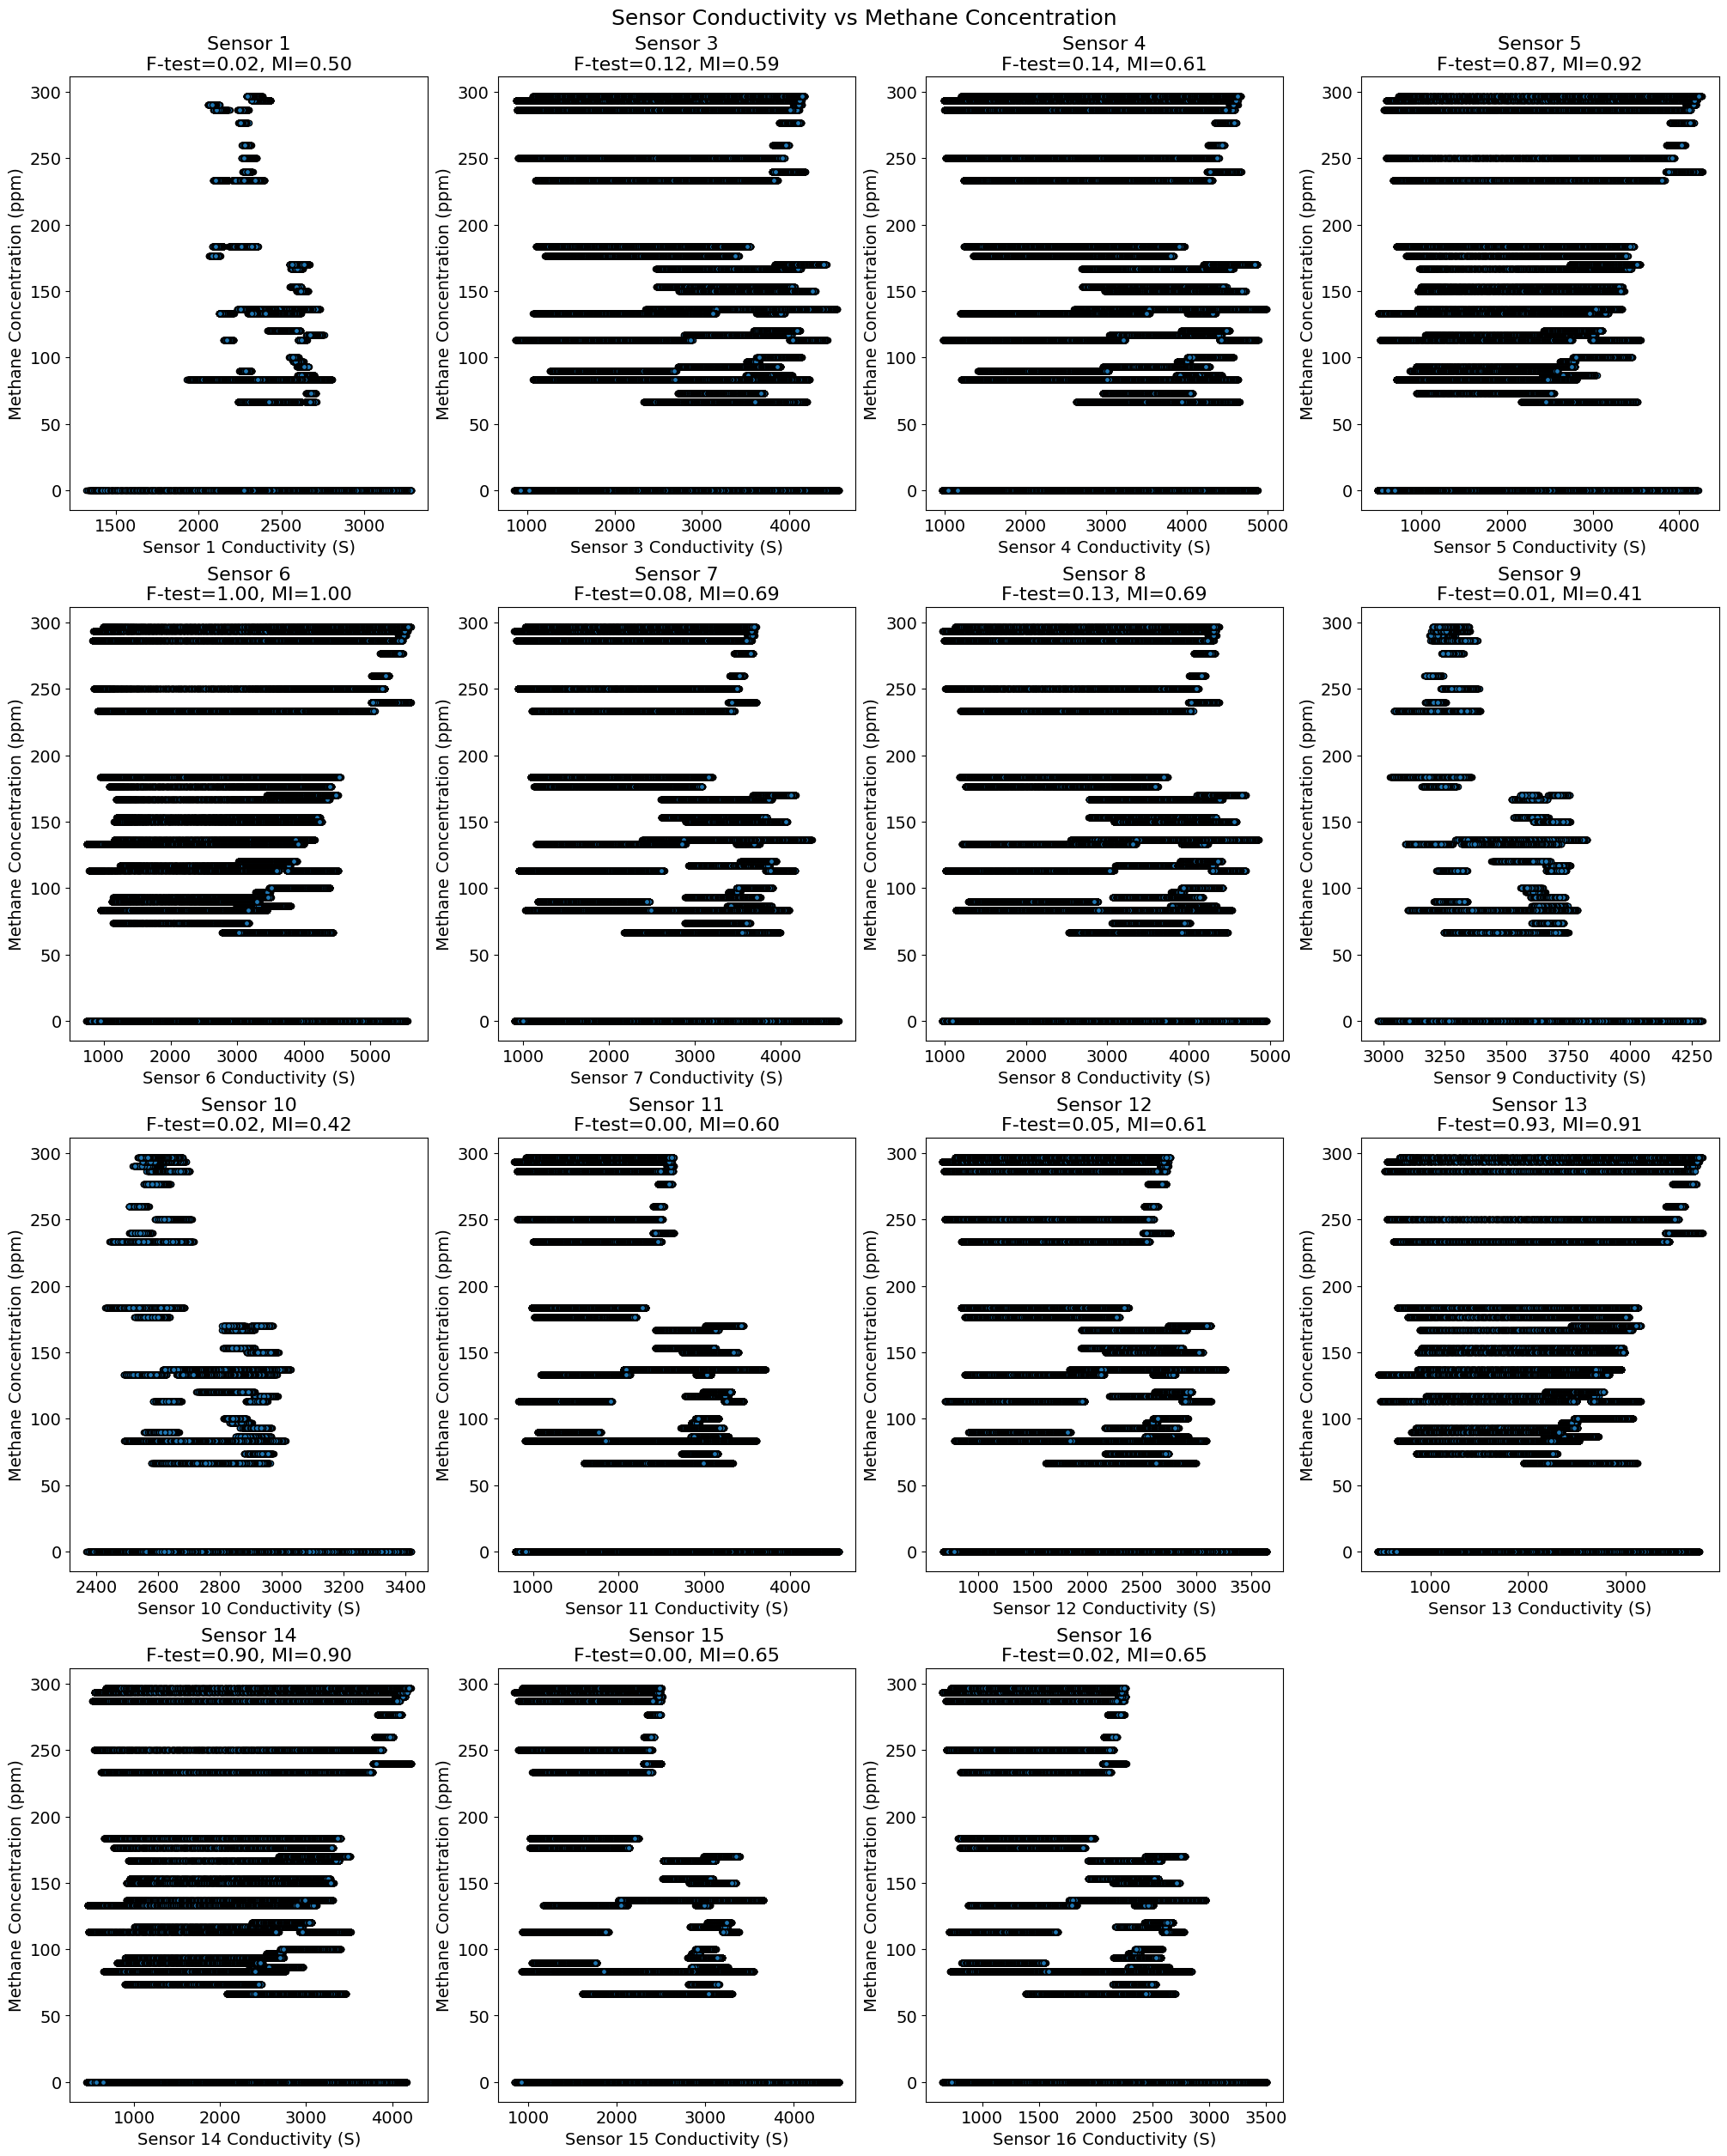

In [34]:
# Plot features vs methane, also display normalized f test features and normalized mutual info features
plt.figure(figsize=(20, 25), layout = "constrained")
num_features = len(good_sensor_cols)
for i in range(num_features):
    feature_name = x1_train[good_sensor_cols].columns[i]
    plt.subplot((num_features + 4) // 4, 4, i + 1)
    plt.scatter(x1_train[good_sensor_cols].iloc[:,i], y_meth_train, edgecolor="black", s=20)
    plt.xlabel("Sensor " + feature_name + " Conductivity (S)", fontsize= 14)
    plt.ylabel("Methane Concentration (ppm)", fontsize= 14)
    plt.title("Sensor {}\nF-test={:.2f}, MI={:.2f}".format(feature_name, f_test_meth_norm[i], mi_meth_norm[i]), fontsize=16)
    plt.tick_params(labelsize = 14)
plt.suptitle("Sensor Conductivity vs Methane Concentration", fontsize= 18)
plt.show()

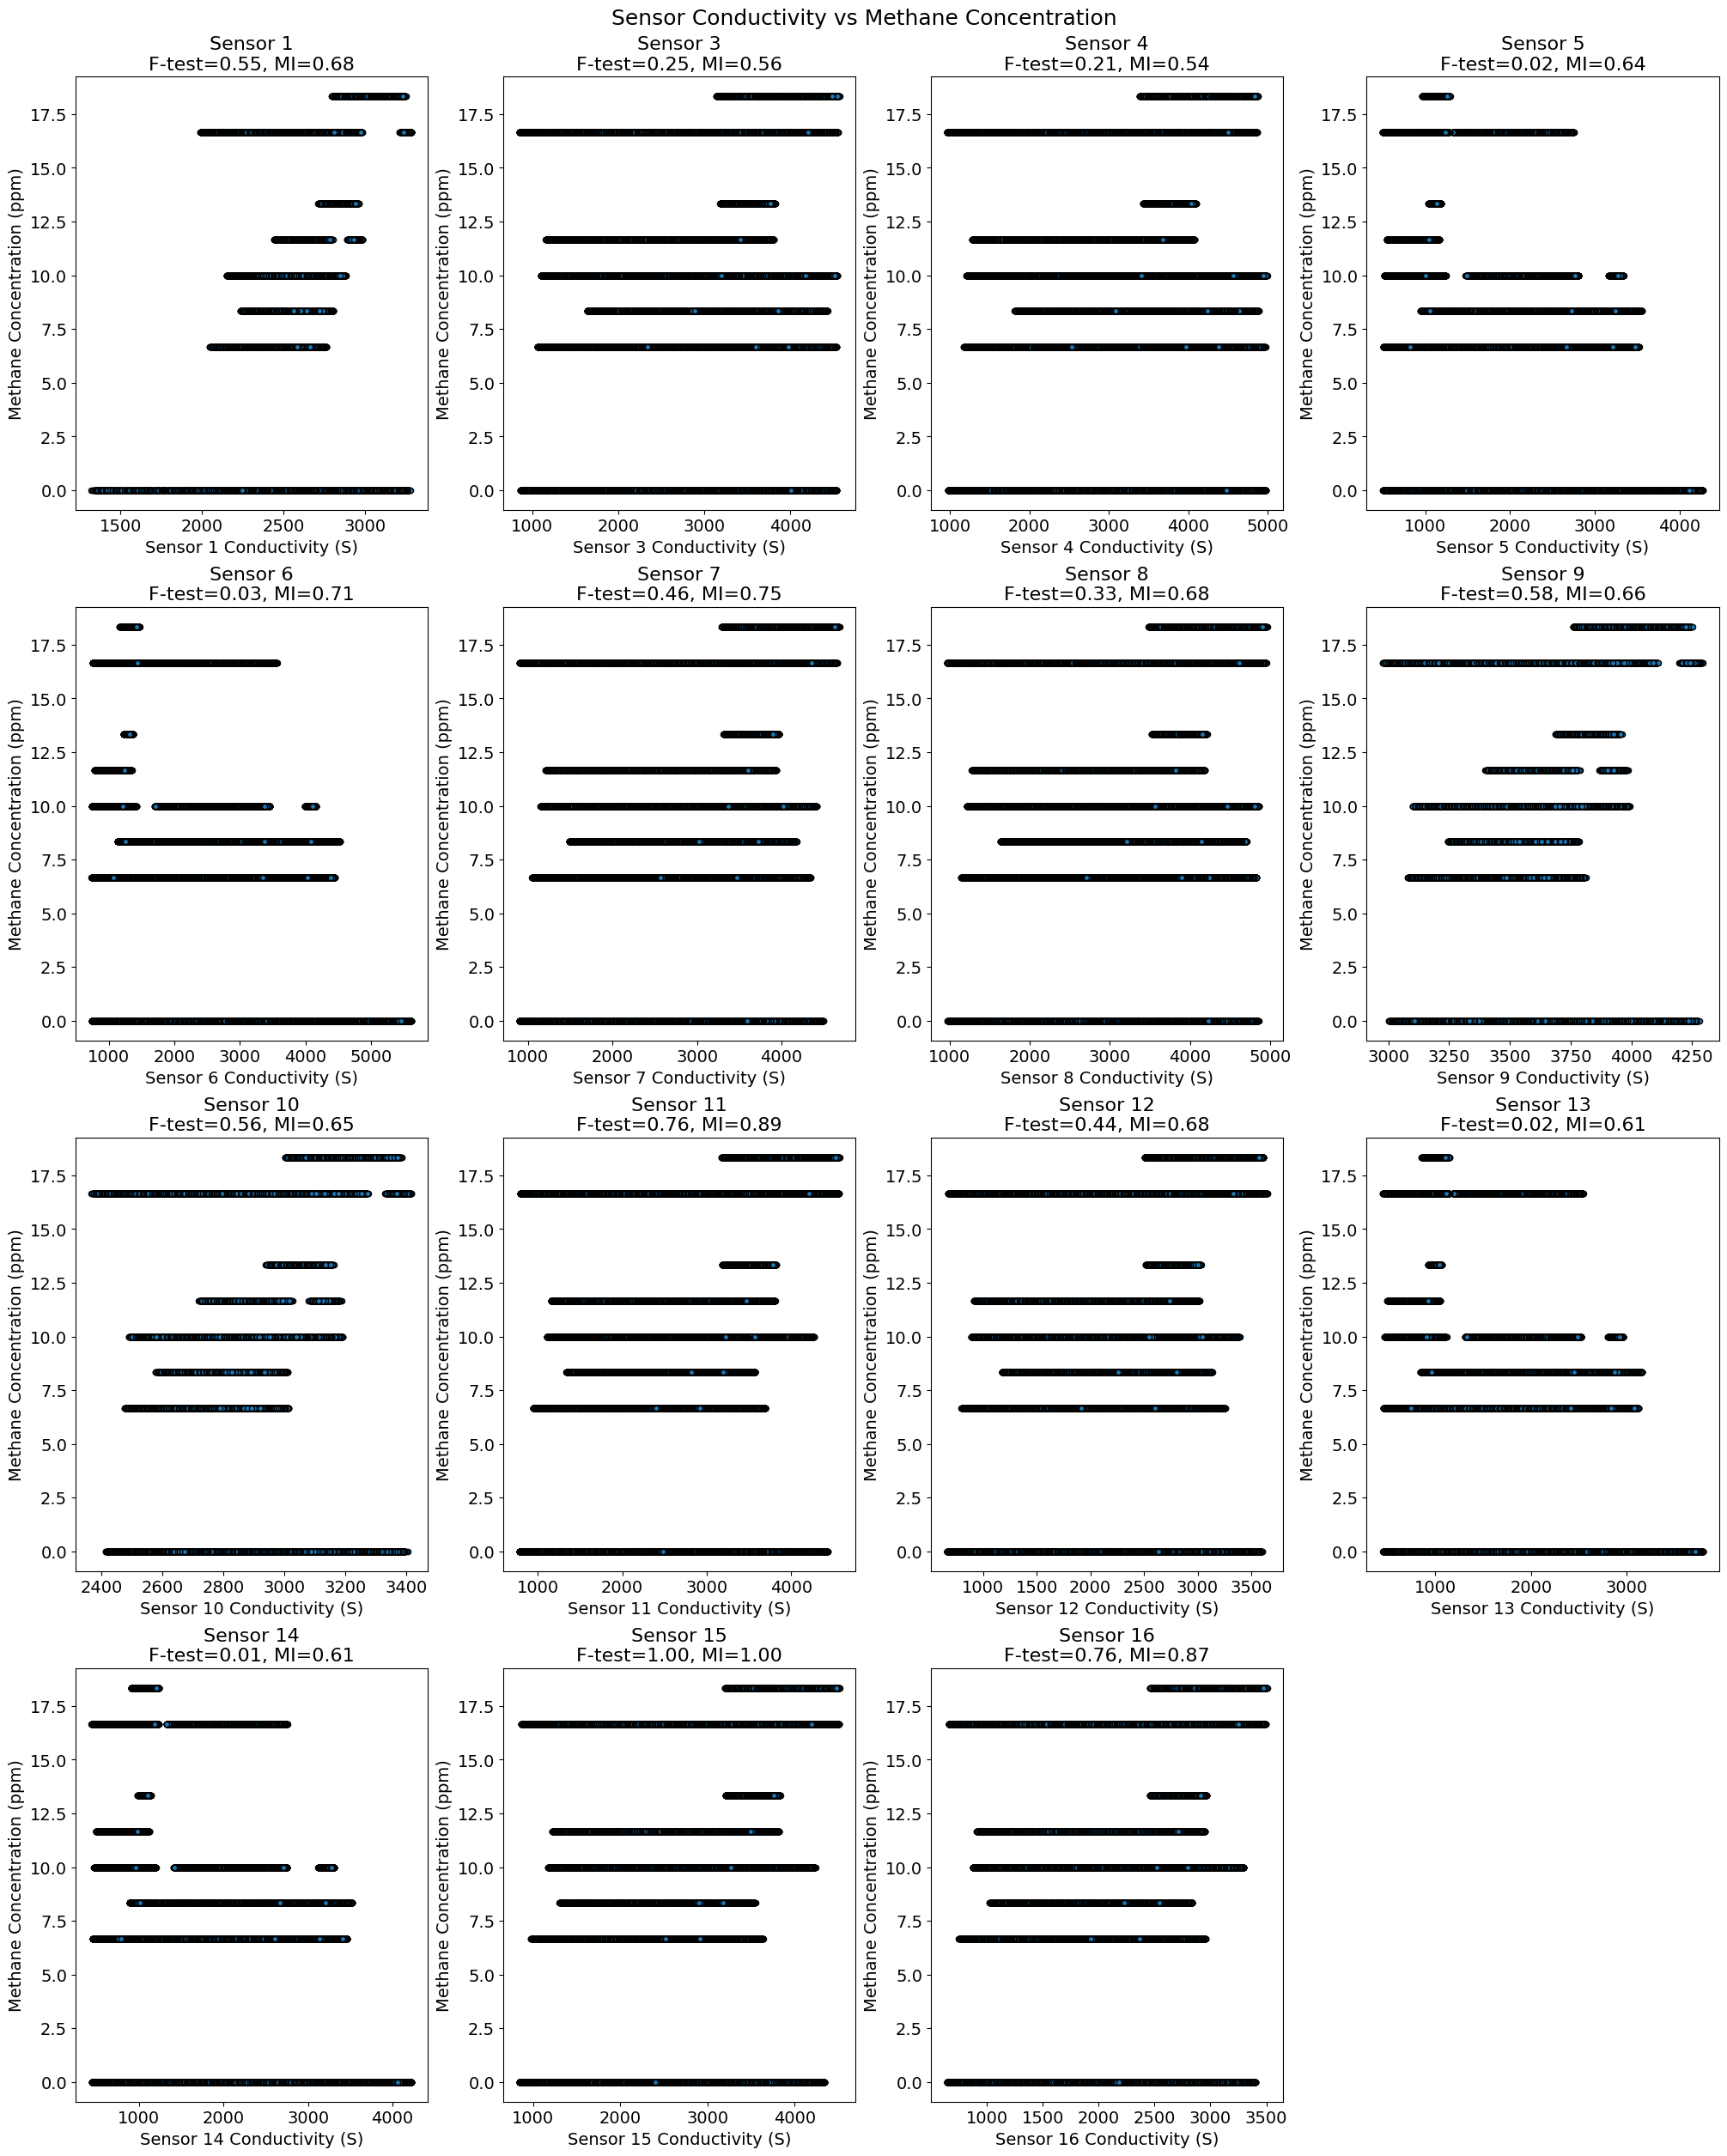

In [35]:
# Plot features vs ethylene
plt.figure(figsize=(20, 25), layout = "constrained")
num_features = len(good_sensor_cols)
for i in range(num_features):
    feature_name = x1_train[good_sensor_cols].columns[i]
    plt.subplot((num_features + 4) // 4, 4, i + 1)
    plt.scatter(x1_train[good_sensor_cols].iloc[:,i], y_ethy_train, edgecolor="black", s=20)
    plt.xlabel("Sensor " + feature_name + " Conductivity (S)", fontsize= 14)
    plt.ylabel("Methane Concentration (ppm)", fontsize= 14)
    plt.title("Sensor {}\nF-test={:.2f}, MI={:.2f}".format(feature_name, f_test_ethy_norm[i], mi_ethy_norm[i]), fontsize=16)
    plt.tick_params(labelsize = 14)
plt.suptitle("Sensor Conductivity vs Methane Concentration", fontsize= 18)
plt.show()

##  Do bar plots of the F-test values and minimum info test values

In [60]:
tuples_f_test_meth = sorted(zip(f_test_meth, x1_train[good_sensor_cols].columns), reverse=True)
meth_f_score_list, meth_f_test_features = [t[0] for t in tuples_f_test_meth], [t[1] for t in tuples_f_test_meth]
tuples_f_test_ethy = sorted(zip(f_test_ethy, x1_train[good_sensor_cols].columns), reverse=True)
ethy_f_score_list, ethy_f_test_features = [t[0] for t in tuples_f_test_ethy], [t[1] for t in tuples_f_test_ethy]
tuples_mi_meth = sorted(zip(mi_meth , x1_train[good_sensor_cols].columns), reverse=True)
meth_mi_score_list, meth_mi_features = [t[0] for t in tuples_mi_meth], [t[1] for t in tuples_mi_meth]
tuples_mi_ethy = sorted(zip(mi_ethy, x1_train[good_sensor_cols].columns), reverse=True)
ethy_mi_score_list, ethy_mi_features = [t[0] for t in tuples_mi_ethy], [t[1] for t in tuples_mi_ethy]

Text(0.5, 1.0, 'Ethylene Mutual Info Values of Features')

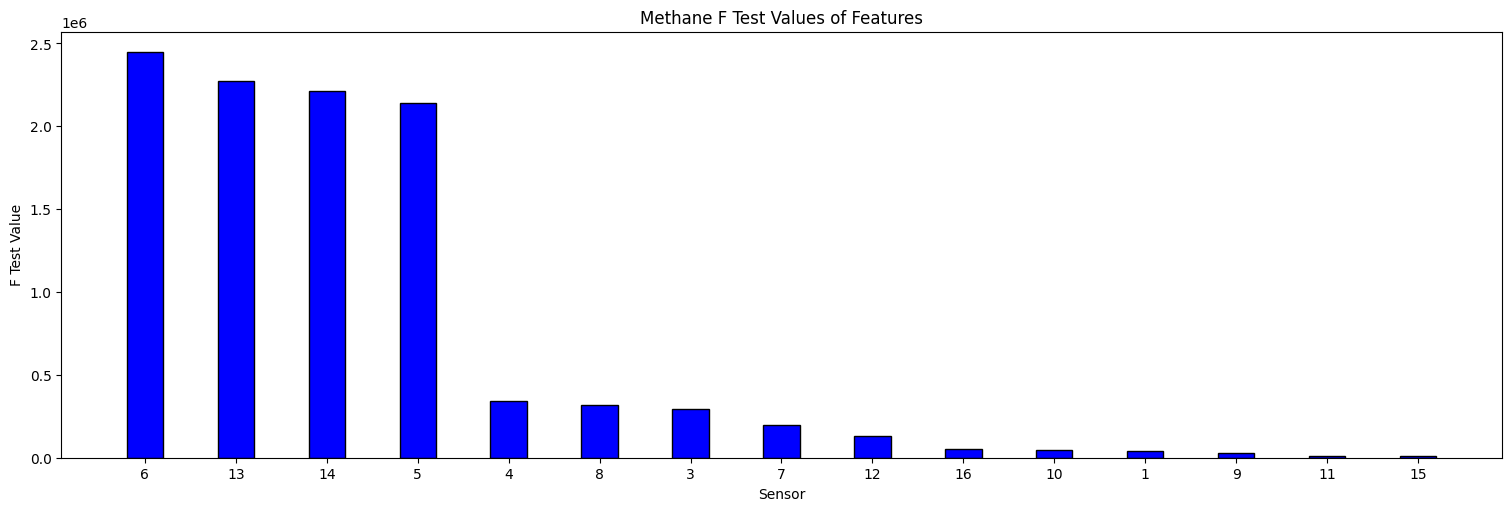

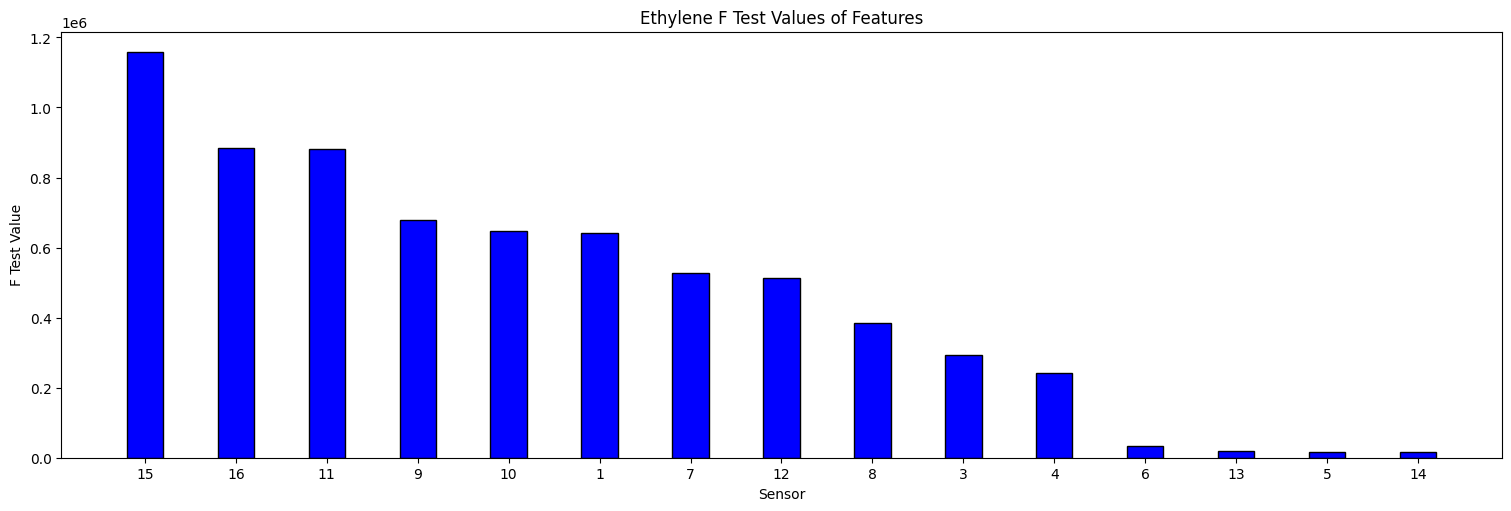

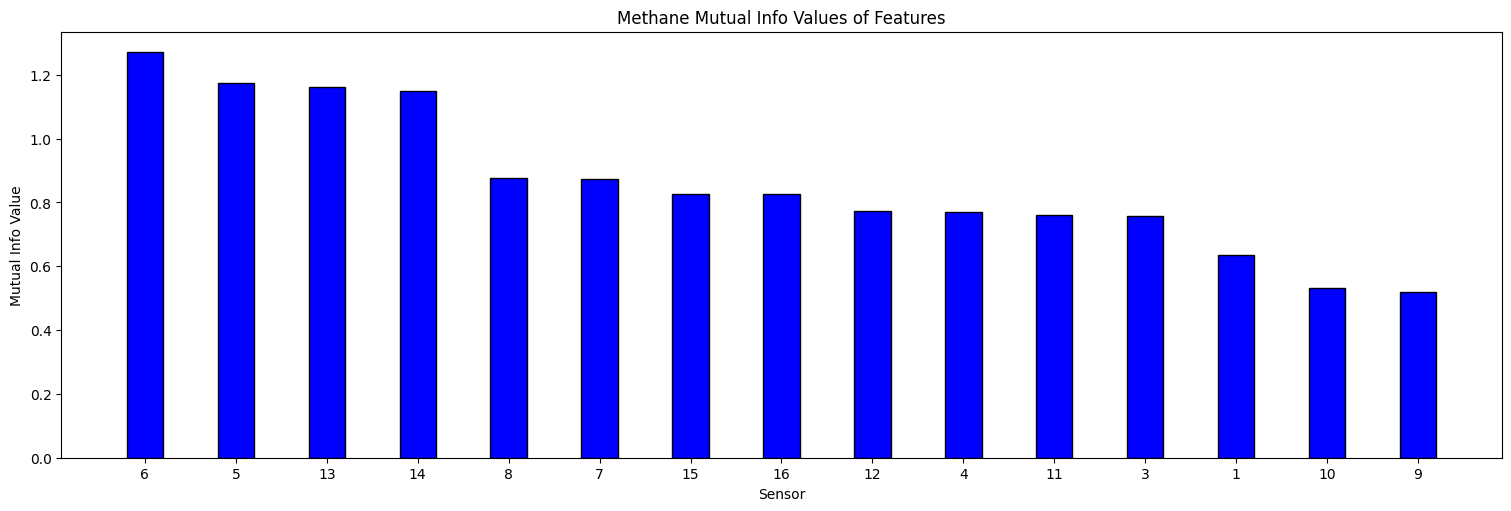

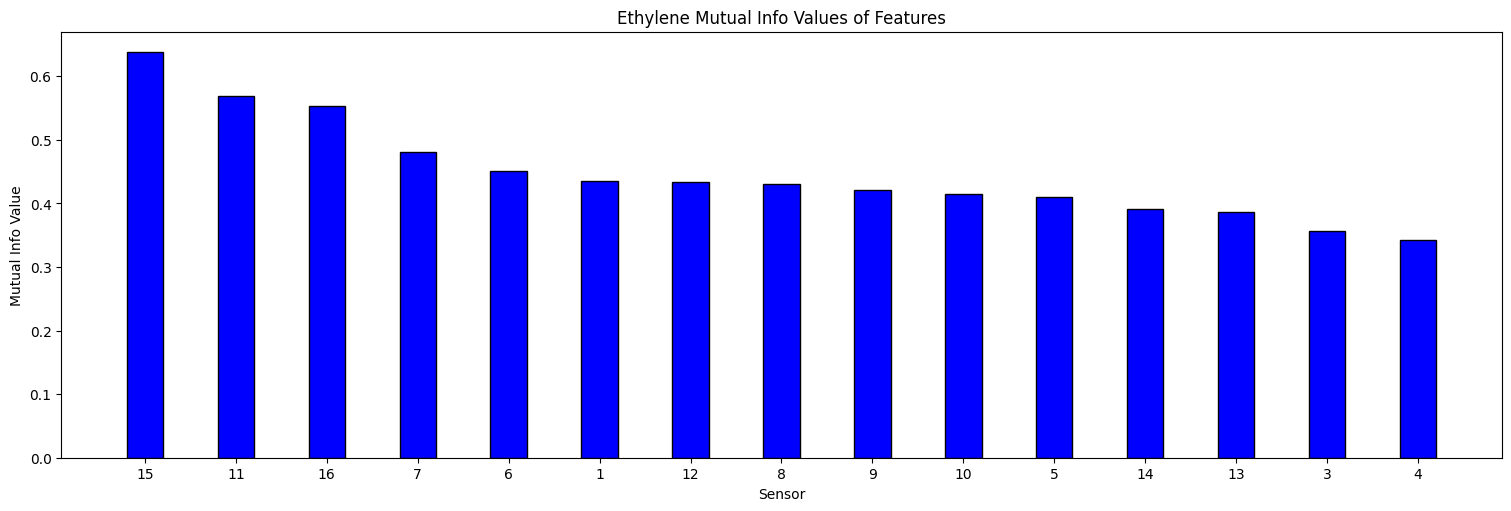

In [61]:
fig = plt.figure(figsize = (15, 5), layout = "constrained")
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(meth_f_test_features, meth_f_score_list, color = 'blue', edgecolor='black', width = 0.4)
ax1.set_ylabel("F Test Value")
ax1.set_xlabel("Sensor")
ax1.set_title("Methane F Test Values of Features")

fig = plt.figure(figsize = (15, 5), layout = "constrained")
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(ethy_f_test_features, ethy_f_score_list, color = 'blue', edgecolor='black', width = 0.4)
ax1.set_ylabel("F Test Value")
ax1.set_xlabel("Sensor")
ax1.set_title("Ethylene F Test Values of Features")

fig = plt.figure(figsize = (15, 5), layout = "constrained")
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(meth_mi_features, meth_mi_score_list, color = 'blue', edgecolor='black', width = 0.4)
ax1.set_ylabel("Mutual Info Value")
ax1.set_xlabel("Sensor")
ax1.set_title("Methane Mutual Info Values of Features")

fig = plt.figure(figsize = (15, 5), layout = "constrained")
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(ethy_mi_features, ethy_mi_score_list, color = 'blue', edgecolor='black', width = 0.4)
ax1.set_ylabel("Mutual Info Value")
ax1.set_xlabel("Sensor")
ax1.set_title("Ethylene Mutual Info Values of Features")

## Do bar plots of the normalized F-test values and minimum info test values

In [58]:
tuples_f_test_meth_norm = sorted(zip(f_test_meth_norm, x1_train[good_sensor_cols].columns), reverse=True)
meth_f_score_list_norm, meth_f_test_features_norm = [t[0] for t in tuples_f_test_meth_norm], [t[1] for t in tuples_f_test_meth_norm]
tuples_f_test_ethy_norm = sorted(zip(f_test_ethy_norm, x1_train[good_sensor_cols].columns), reverse=True)
ethy_f_score_list_norm, ethy_f_test_features_norm = [t[0] for t in tuples_f_test_ethy_norm], [t[1] for t in tuples_f_test_ethy_norm]
tuples_mi_meth_norm = sorted(zip(mi_meth_norm, x1_train[good_sensor_cols].columns), reverse=True)
meth_mi_score_list_norm, meth_mi_features_norm = [t[0] for t in tuples_mi_meth_norm], [t[1] for t in tuples_mi_meth_norm]
tuples_mi_ethy_norm = sorted(zip(mi_ethy_norm, x1_train[good_sensor_cols].columns), reverse=True)
ethy_mi_score_list_norm, ethy_mi_features_norm = [t[0] for t in tuples_mi_ethy_norm], [t[1] for t in tuples_mi_ethy_norm]

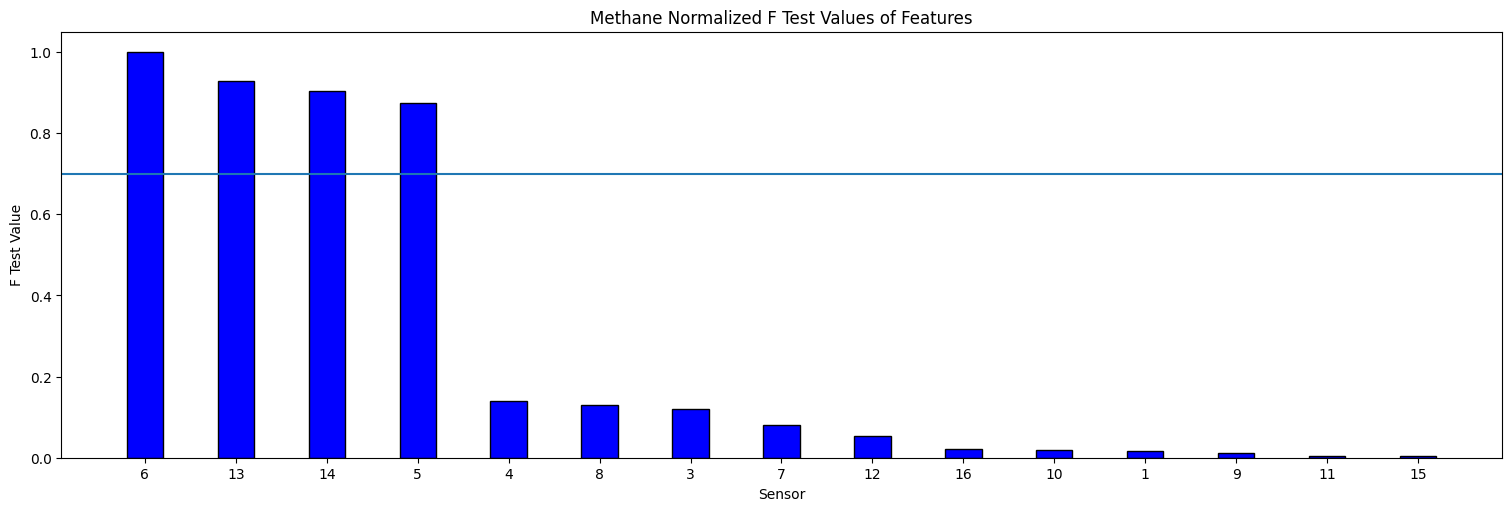

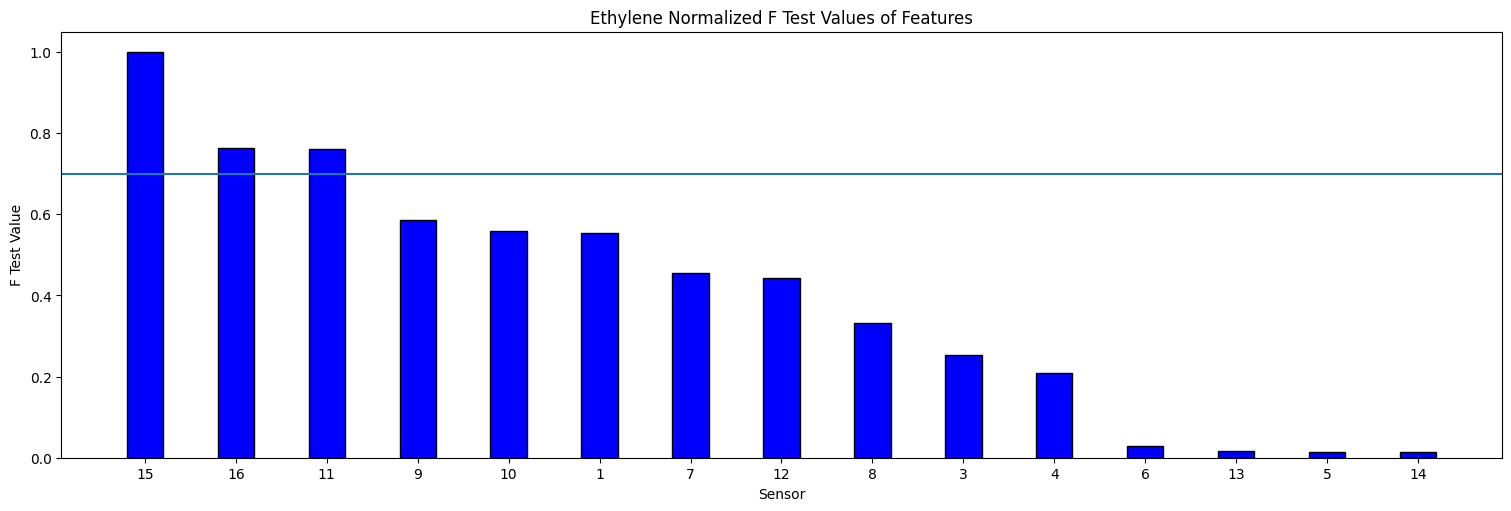

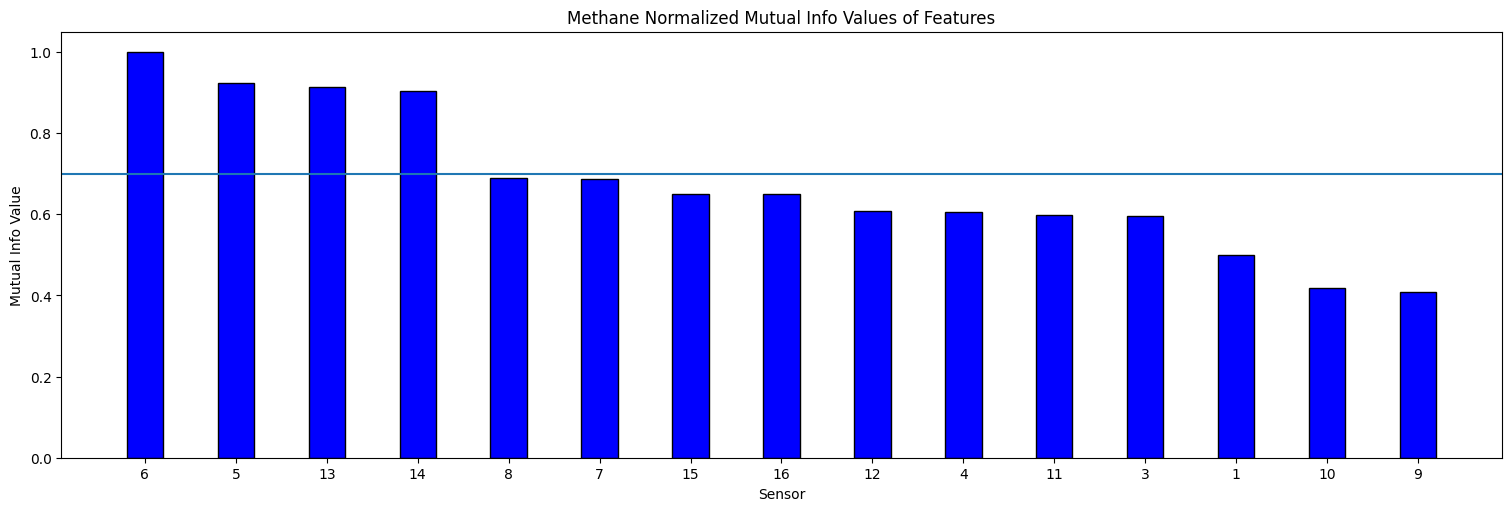

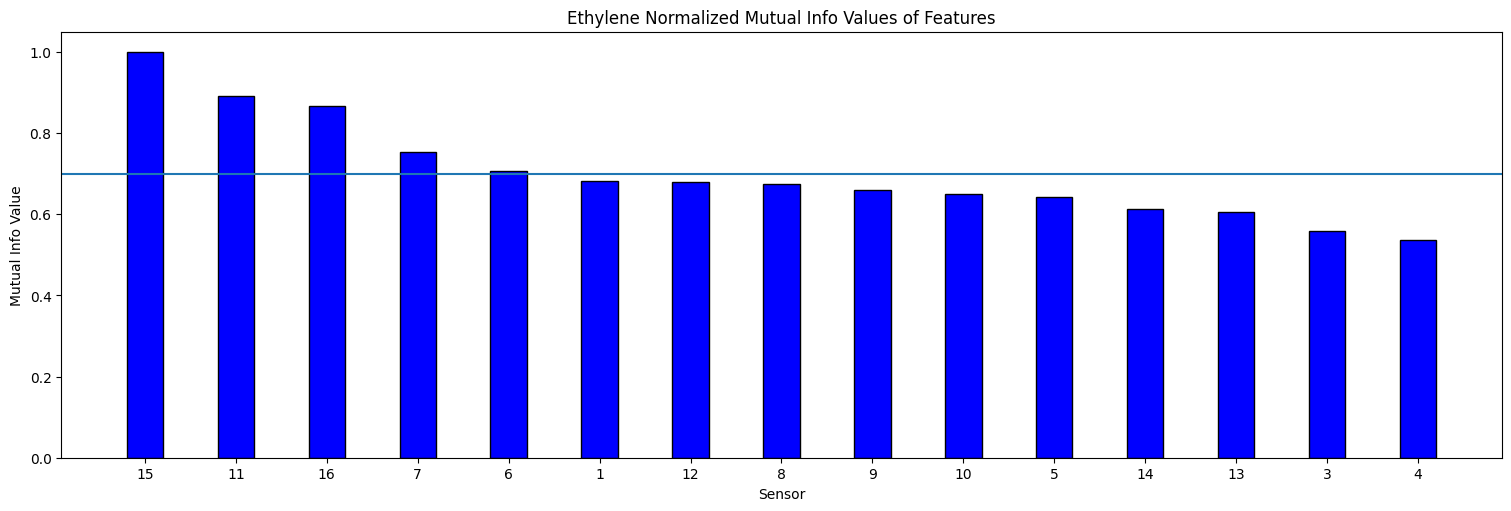

In [59]:
cutoff = 0.7
fig = plt.figure(figsize = (15, 5), layout = "constrained")
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(meth_f_test_features_norm, meth_f_score_list_norm, color = 'blue', edgecolor='black', width = 0.4)
ax1.set_ylabel("F Test Value")
ax1.set_xlabel("Sensor")
ax1.set_title("Methane Normalized F Test Values of Features")
ax1.axhline(cutoff)

fig = plt.figure(figsize = (15, 5), layout = "constrained")
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(ethy_f_test_features_norm, ethy_f_score_list_norm, color = 'blue', edgecolor='black', width = 0.4)
ax1.set_ylabel("F Test Value")
ax1.set_xlabel("Sensor")
ax1.set_title("Ethylene Normalized F Test Values of Features")
ax1.axhline(cutoff)

fig = plt.figure(figsize = (15, 5), layout = "constrained")
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(meth_mi_features_norm, meth_mi_score_list_norm, color = 'blue', edgecolor='black', width = 0.4)
ax1.set_ylabel("Mutual Info Value")
ax1.set_xlabel("Sensor")
ax1.set_title("Methane Normalized Mutual Info Values of Features")
ax1.axhline(cutoff)

fig = plt.figure(figsize = (15, 5), layout = "constrained")
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(ethy_mi_features_norm, ethy_mi_score_list_norm, color = 'blue', edgecolor='black', width = 0.4)
ax1.set_ylabel("Mutual Info Value")
ax1.set_xlabel("Sensor")
ax1.set_title("Ethylene Normalized Mutual Info Values of Features")
ax1.axhline(cutoff)

# Now remove Senors that fall below the cutoff
Cutoff is drop sensors with F-test and mutual info test less than 0.7

In [64]:

# go through and find sensors that don't meet the cutoff
good_meth_sensors = []
good_ethy_sensors = []

# Create a dictionary of the tuples containing both the feature name and list, so we can give the sensor name and get a score value back
mi_meth_norm_dict = {v: k for k, v in dict(tuples_mi_meth_norm).items()} 
mi_ethy_norm_dict = {v: k for k, v in dict(tuples_mi_ethy_norm).items()} 

for i in range(len(meth_f_test_features_norm)):
    curr_sensor = meth_f_test_features_norm[i]
    # Keep the sensor if it meets the cutoff
    if not (meth_f_score_list_norm[i] < cutoff and mi_meth_norm_dict[curr_sensor] < cutoff):
        good_meth_sensors.append(curr_sensor)
for i in range(len(ethy_f_test_features_norm)):
    curr_sensor = ethy_f_test_features_norm[i]
    # Keep the sensor if it meets the cutoff
    if not (ethy_f_score_list_norm[i] < cutoff and mi_ethy_norm_dict[curr_sensor] < cutoff):
        good_ethy_sensors.append(curr_sensor)   
print("Kept methane sensors:", good_meth_sensors, "\nKept ethylene sensors:", good_ethy_sensors)


Kept methane sensors: ['6', '13', '14', '5'] 
Kept ethylene sensors: ['15', '16', '11', '7', '6']


Note: We would remove sensor 2 if it showed up here since it's broken.

In [65]:
meth_cutoff_train = x1_train[good_meth_sensors]
meth_cutoff_test = x1_test[good_meth_sensors]
ethy_cutoff_train = x1_train[good_ethy_sensors]
ethy_cutoff_test = x1_test[good_ethy_sensors]

In [33]:
meth_cutoff_train

5       12       13        4
20000    2712.07  2004.92  2512.73  3143.37
20001    2711.55  2009.62  2489.84  3148.43
20002    2711.02  1989.70  2492.38  3132.98
20003    2713.39  2000.70  2515.02  3144.21
20004    2703.14  2001.41  2519.87  3149.84
...          ...      ...      ...      ...
1671396  4100.80  2635.74  3681.30  4493.98
1671397  4119.92  2637.81  3699.91  4498.09
1671398  4108.57  2644.32  3687.70  4483.05
1671399  4103.71  2645.62  3698.39  4491.59
1671400  4116.03  2636.26  3710.92  4484.08

[1651401 rows x 4 columns]

In [357]:
ethy_cutoff_train


14       15       10        6        5
1671401  4069.16  2411.37  2656.04  5453.49  4102.74
1671402  4059.17  2378.36  2665.17  5454.66  4105.01
1671403  4054.03  2424.17  2681.11  5448.83  4115.70
1671404  4070.44  2421.15  2672.22  5451.55  4103.06
1671405  4066.26  2415.88  2677.45  5444.95  4108.89
...          ...      ...      ...      ...      ...
2924947  2409.11  1574.11  2688.19  3251.66  2476.65
2924948  2413.38  1547.79  2683.99  3259.38  2473.10
2924949  2400.85  1565.83  2688.97  3270.55  2458.18
2924950  2392.34  1563.87  2680.33  3245.95  2470.82
2924951  2403.10  1567.35  2691.07  3257.09  2472.85

[1253551 rows x 5 columns]

In [358]:
ethy_cutoff_test.info(), meth_cutoff_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1253551 entries, 1671401 to 2924951
Data columns (total 5 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   14      1253551 non-null  float64
 1   15      1253551 non-null  float64
 2   10      1253551 non-null  float64
 3   6       1253551 non-null  float64
 4   5       1253551 non-null  float64
dtypes: float64(5)
memory usage: 57.4 MB
<class 'pandas.core.frame.DataFrame'>
Index: 1253551 entries, 1671401 to 2924951
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   5       1253551 non-null  float64
 1   12      1253551 non-null  float64
 2   13      1253551 non-null  float64
 3   4       1253551 non-null  float64
dtypes: float64(4)
memory usage: 47.8 MB


(None, None)

# Feature Engineering

We need to add historical measurements as features. 

In [359]:
meth_cutoff_train

5       12       13        4
20000    2712.07  2004.92  2512.73  3143.37
20001    2711.55  2009.62  2489.84  3148.43
20002    2711.02  1989.70  2492.38  3132.98
20003    2713.39  2000.70  2515.02  3144.21
20004    2703.14  2001.41  2519.87  3149.84
...          ...      ...      ...      ...
1671396  4100.80  2635.74  3681.30  4493.98
1671397  4119.92  2637.81  3699.91  4498.09
1671398  4108.57  2644.32  3687.70  4483.05
1671399  4103.71  2645.62  3698.39  4491.59
1671400  4116.03  2636.26  3710.92  4484.08

[1651401 rows x 4 columns]

In [67]:
meth_cutoff_train.shift(1).bfill()

6       13       14        5
20000        NaN      NaN      NaN      NaN
20001    3518.45  2512.73  2712.34  2712.07
20002    3527.97  2489.84  2716.81  2711.55
20003    3534.23  2492.38  2708.13  2711.02
20004    3517.26  2515.02  2704.98  2713.39
...          ...      ...      ...      ...
1671396  5450.38  3658.19  4064.97  4114.08
1671397  5460.10  3681.30  4032.20  4100.80
1671398  5436.02  3699.91  4079.47  4119.92
1671399  5455.44  3687.70  4085.28  4108.57
1671400  5415.11  3698.39  4048.25  4103.71

[1651401 rows x 4 columns]

In [66]:
def get_historical_measurements(orig_df, window_size, sampling_rate):
    '''Appends historical measurements to a dataframe'''
    orig_cols = orig_df.columns
    # Go through and make the window and append it as features. There will be window_size / sampling_rate features added for each feature
    for i in range(window_size//sampling_rate):
        # Shift the values over (get time t - 1)
        shift_val = sampling_rate * (i + 1)
        orig_df_shifted = orig_df[orig_cols].shift(shift_val).bfill()
        orig_df_shifted.columns = ["{}_(t-{})".format(col, shift_val) for col in list(orig_df_shifted.columns)]
        orig_df = pd.concat([orig_df, orig_df_shifted], axis = 1)
    return orig_df

In [67]:
window_size = 50
sampling_rate = 5

In [68]:
meth_historical_train = get_historical_measurements(meth_cutoff_train, window_size, sampling_rate)
ethy_historical_train = get_historical_measurements(ethy_cutoff_train, window_size, sampling_rate)
meth_historical_test = get_historical_measurements(meth_cutoff_test, window_size, sampling_rate)
ethy_historical_test = get_historical_measurements(ethy_cutoff_test, window_size, sampling_rate)

In [69]:
meth_historical_train.columns

Index(['6', '13', '14', '5', '6_(t-5)', '13_(t-5)', '14_(t-5)', '5_(t-5)',
       '6_(t-10)', '13_(t-10)', '14_(t-10)', '5_(t-10)', '6_(t-15)',
       '13_(t-15)', '14_(t-15)', '5_(t-15)', '6_(t-20)', '13_(t-20)',
       '14_(t-20)', '5_(t-20)', '6_(t-25)', '13_(t-25)', '14_(t-25)',
       '5_(t-25)', '6_(t-30)', '13_(t-30)', '14_(t-30)', '5_(t-30)',
       '6_(t-35)', '13_(t-35)', '14_(t-35)', '5_(t-35)', '6_(t-40)',
       '13_(t-40)', '14_(t-40)', '5_(t-40)', '6_(t-45)', '13_(t-45)',
       '14_(t-45)', '5_(t-45)', '6_(t-50)', '13_(t-50)', '14_(t-50)',
       '5_(t-50)'],
      dtype='object')

We need to get features.
Statistical - Mean, median, Range, Standard Deviation, Max, Min, Kurtosis, Skewness 
Time / Frequency - Autocorrelation, entropy, Positive Turning, Negative Turning, Peak to peak distance

In [70]:
def get_features_dict():
    stat_features = ["Kurtosis", "Max", "Mean", "Median", "Min", "Peak to peak distance", "Skewness", "Standard Deviation"]
    time_features = ["Autocorrelation", "Negative turning points", "Positive turning points", "Slope"]
    # spectral_features = ["Spectral entropy"]
    stat_features_dict = dict(filter(lambda i:i[0] in stat_features, tsfel.get_features_by_domain()['statistical'].items()))
    time_features_dict = dict(filter(lambda i:i[0] in time_features, tsfel.get_features_by_domain()['temporal'].items()))
    # spectral_features_dict = dict(filter(lambda i:i[0] in spectral_features, tsfel.get_features_by_domain()['spectral'].items()))
    features_dict = {
        "temporal" : time_features_dict,
        "statistical": stat_features_dict

    }
    return features_dict

In [70]:
meth_cutoff_train.iloc[[5, 3],:]

6       13       14        5
20005  3505.97  2520.89  2712.60  2699.99
20003  3517.26  2515.02  2704.98  2713.39

In [72]:
[30 - sampling_rate * j for j in range(window_size//sampling_rate + 1)]
    

[30, 25, 20, 15, 10, 5, 0]

In [150]:
meth_historical_train.iloc[30:31, :].index

Index([20030], dtype='int64')

In [71]:
def find_positive_turning_points(signal):
    # From tsfresh
    # Calculate differences
    diff_sig = np.diff(signal)
    array_signal = np.arange(len(diff_sig[:-1]))
    positive_turning_pts = np.where((diff_sig[array_signal + 1] < 0) & (diff_sig[array_signal] > 0))[0]
    
    return len(positive_turning_pts)

In [72]:
def find_negative_turning_points(signal):
    # From tsfresh
    # Calculate differences
    diff_sig = np.diff(signal)
    array_signal = np.arange(len(diff_sig[:-1]))
    negative_turning_pts = np.where((diff_sig[array_signal] < 0) & (diff_sig[array_signal + 1] > 0))[0]

    return len(negative_turning_pts)

In [73]:
def get_features(window_df, orig_cols, window_size, sampling_rate):
    '''Gets statistical and time features from data frame'''
    window_df_copy = window_df.copy()
    num_orig_cols = len(orig_cols)
    for i in range(len(orig_cols)):
        # Get the current columns
        curr_cols = list(range(i, i + window_size // sampling_rate * num_orig_cols + 1, num_orig_cols))
        print("Getting features for:", list(window_df.iloc[:,curr_cols].columns))
        # We can get a measurement on axis = 1 since we already have the previous measurements in the dataframe
        window_df_copy["{}_mean".format(orig_cols[i])] = window_df.iloc[:,curr_cols].mean(axis = 1)
        print("Calculated mean")
        window_df_copy["{}_median".format(orig_cols[i])] = window_df.iloc[:,curr_cols].median(axis = 1)
        print("Calculated median")
        window_df_copy["{}_max".format(orig_cols[i])] = window_df.iloc[:,curr_cols].max(axis = 1)
        print("Calculated max")
        window_df_copy["{}_min".format(orig_cols[i])] = window_df.iloc[:,curr_cols].min(axis = 1)
        print("Calculated min")
        window_df_copy["{}_std".format(orig_cols[i])] = window_df.iloc[:,curr_cols].std(axis = 1)
        print("Calculated std")
        window_df_copy["{}_range".format(orig_cols[i])] =window_df.iloc[:,curr_cols].apply(lambda row: max(row) - min(row), axis = 1)
        print("Calculated range")
        window_df_copy["{}_skew".format(orig_cols[i])] = window_df.iloc[:,curr_cols].skew(axis = 1)
        print("Calculated skewness")
        window_df_copy["{}_kurtosis".format(orig_cols[i])] = window_df.iloc[:,curr_cols].kurtosis(axis = 1)
        print("Calculated kurtosis")
        
        window_df_copy["{}_autocorrelation".format(orig_cols[i])] = window_df.iloc[window_size:,curr_cols].apply(lambda row: row.autocorr(1), axis = 1)
        # Backfill is necessary because we can't get autocorrelation before row = window size 
        window_df_copy["{}_autocorrelation".format(orig_cols[i])] = window_df_copy["{}_autocorrelation".format(orig_cols[i])].bfill()
        print("Calculated autocorrelation")
        
        window_df_copy["{}_positive_turning_points".format(orig_cols[i])] = window_df.iloc[window_size:,curr_cols].apply(lambda row: find_positive_turning_points(row), axis = 1)
        window_df_copy["{}_positive_turning_points".format(orig_cols[i])] = window_df_copy["{}_positive_turning_points".format(orig_cols[i])].bfill()
        print("Calculated number of positive turning points")
        
        window_df_copy["{}_negative_turning_points".format(orig_cols[i])] = window_df.iloc[window_size:,curr_cols].apply(lambda row: find_positive_turning_points(row), axis = 1)
        window_df_copy["{}_negative_turning_points".format(orig_cols[i])] = window_df_copy["{}_negative_turning_points".format(orig_cols[i])].bfill()
        print("Calculated number of negative turning points")
        
    return window_df_copy
    

In [74]:
cols_wanted = list(range(0, 0 + window_size // sampling_rate * 4 + 1, 4))

[]

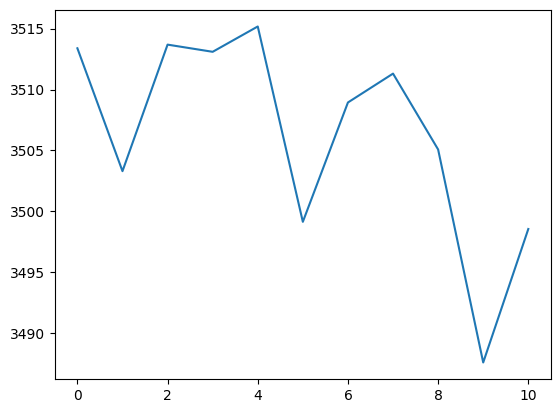

In [75]:
plt.plot(list(meth_historical_train.iloc[60:60+1,cols_wanted].stack()))
plt.plot()

In [76]:
print("Positive turning points:", meth_historical_train.iloc[60:60+1,cols_wanted].apply(lambda row: find_positive_turning_points(row), axis = 1),
      "\nNegative turning points:", meth_historical_train.iloc[60:60+1,cols_wanted].apply(lambda row: find_negative_turning_points(row), axis = 1))

Positive turning points: 20060    3
dtype: int64 
Negative turning points: 20060    4
dtype: int64


In [77]:
x_meth_fe_train = get_features(meth_historical_train, meth_cutoff_train.columns, window_size, sampling_rate)
x_meth_fe_train.info()

Getting features for: ['6', '6_(t-5)', '6_(t-10)', '6_(t-15)', '6_(t-20)', '6_(t-25)', '6_(t-30)', '6_(t-35)', '6_(t-40)', '6_(t-45)', '6_(t-50)']
Calculated mean
Calculated median
Calculated max
Calculated min
Calculated std
Calculated range
Calculated skewness
Calculated kurtosis
Calculated autocorrelation
Calculated number of positive turning points
Calculated number of negative turning points
Getting features for: ['13', '13_(t-5)', '13_(t-10)', '13_(t-15)', '13_(t-20)', '13_(t-25)', '13_(t-30)', '13_(t-35)', '13_(t-40)', '13_(t-45)', '13_(t-50)']
Calculated mean
Calculated median
Calculated max
Calculated min
Calculated std
Calculated range
Calculated skewness
Calculated kurtosis
Calculated autocorrelation
Calculated number of positive turning points
Calculated number of negative turning points
Getting features for: ['14', '14_(t-5)', '14_(t-10)', '14_(t-15)', '14_(t-20)', '14_(t-25)', '14_(t-30)', '14_(t-35)', '14_(t-40)', '14_(t-45)', '14_(t-50)']
Calculated mean
Calculated medi

In [78]:
x_ethy_fe_train = get_features(ethy_historical_train, ethy_cutoff_train.columns, window_size, sampling_rate)
x_meth_fe_test = get_features(meth_historical_test, meth_cutoff_test.columns, window_size, sampling_rate)
x_ethy_fe_test = get_features(ethy_historical_test, ethy_cutoff_test.columns, window_size, sampling_rate)

Getting features for: ['15', '15_(t-5)', '15_(t-10)', '15_(t-15)', '15_(t-20)', '15_(t-25)', '15_(t-30)', '15_(t-35)', '15_(t-40)', '15_(t-45)', '15_(t-50)']
Calculated mean
Calculated median
Calculated max
Calculated min
Calculated std
Calculated range
Calculated skewness
Calculated kurtosis
Calculated autocorrelation
Calculated number of positive turning points
Calculated number of negative turning points
Getting features for: ['16', '16_(t-5)', '16_(t-10)', '16_(t-15)', '16_(t-20)', '16_(t-25)', '16_(t-30)', '16_(t-35)', '16_(t-40)', '16_(t-45)', '16_(t-50)']
Calculated mean
Calculated median
Calculated max
Calculated min
Calculated std
Calculated range
Calculated skewness
Calculated kurtosis
Calculated autocorrelation
Calculated number of positive turning points
Calculated number of negative turning points
Getting features for: ['11', '11_(t-5)', '11_(t-10)', '11_(t-15)', '11_(t-20)', '11_(t-25)', '11_(t-30)', '11_(t-35)', '11_(t-40)', '11_(t-45)', '11_(t-50)']
Calculated mean
Calc

# Save Feature Engineered Datasets
So we don't have to do feature engineering again.

In [81]:
meth_fe_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1651401 entries, 20000 to 1671400
Data columns (total 89 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   6                           1651401 non-null  float64
 1   13                          1651401 non-null  float64
 2   14                          1651401 non-null  float64
 3   5                           1651401 non-null  float64
 4   6_(t-5)                     1651401 non-null  float64
 5   13_(t-5)                    1651401 non-null  float64
 6   14_(t-5)                    1651401 non-null  float64
 7   5_(t-5)                     1651401 non-null  float64
 8   6_(t-10)                    1651401 non-null  float64
 9   13_(t-10)                   1651401 non-null  float64
 10  14_(t-10)                   1651401 non-null  float64
 11  5_(t-10)                    1651401 non-null  float64
 12  6_(t-15)                    1651401 non-null  float64
 13

In [80]:
meth_fe_train_df = pd.concat([x_meth_fe_train, y_meth_train], axis = 1)
meth_fe_train_df.to_csv("gas+sensor+array+under+dynamic+gas+mixtures/meth_fe_train.csv")
ethy_fe_train_df = pd.concat([x_ethy_fe_train, y_ethy_train], axis = 1)
ethy_fe_train_df.to_csv("gas+sensor+array+under+dynamic+gas+mixtures/ethy_fe_train.csv")
meth_fe_test_df = pd.concat([x_meth_fe_test, y_meth_test], axis = 1)
meth_fe_test_df.to_csv("gas+sensor+array+under+dynamic+gas+mixtures/meth_fe_test.csv")
ethy_fe_test_df = pd.concat([x_ethy_fe_test, y_ethy_test], axis = 1)
ethy_fe_test_df.to_csv("gas+sensor+array+under+dynamic+gas+mixtures/ethy_fe_test.csv")

# Load the Feature Engineered Datasets

In [13]:
meth_fe_train_df = pd.read_csv('gas+sensor+array+under+dynamic+gas+mixtures/meth_fe_train.csv', index_col = 0)

In [15]:
ethy_fe_train_df = pd.read_csv('gas+sensor+array+under+dynamic+gas+mixtures/ethy_fe_train.csv', index_col = 0)

In [16]:
meth_fe_test_df = pd.read_csv('gas+sensor+array+under+dynamic+gas+mixtures/meth_fe_test.csv', index_col = 0)

In [17]:
ethy_fe_test_df = pd.read_csv('gas+sensor+array+under+dynamic+gas+mixtures/ethy_fe_test.csv', index_col = 0)

# Split the Dataframes into X Sets

In [23]:
x_meth_fe_train = meth_fe_train_df.drop(["Methane"], axis = 1)
x_ethy_fe_train = ethy_fe_train_df.drop(["Ethylene"], axis = 1)
x_meth_fe_test = meth_fe_test_df.drop(["Methane"], axis = 1)
x_ethy_fe_test = ethy_fe_test_df.drop(["Ethylene"], axis = 1)


In [24]:
x_meth_fe_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1651401 entries, 20000 to 1671400
Data columns (total 88 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   6                           1651401 non-null  float64
 1   13                          1651401 non-null  float64
 2   14                          1651401 non-null  float64
 3   5                           1651401 non-null  float64
 4   6_(t-5)                     1651401 non-null  float64
 5   13_(t-5)                    1651401 non-null  float64
 6   14_(t-5)                    1651401 non-null  float64
 7   5_(t-5)                     1651401 non-null  float64
 8   6_(t-10)                    1651401 non-null  float64
 9   13_(t-10)                   1651401 non-null  float64
 10  14_(t-10)                   1651401 non-null  float64
 11  5_(t-10)                    1651401 non-null  float64
 12  6_(t-15)                    1651401 non-null  float64
 13

# Delete Data frames to save space

In [25]:
del meth_fe_train_df
del ethy_fe_train_df
del meth_fe_test_df
del ethy_fe_test_df

# Redo EDA

# Define Helper Functions

## Define Metrics Function to easily get metrics

In [179]:
def get_main_metrics(actual, predict):
  '''Returns a tuple containing RMSE, RMSE / mean, RMSE / range, MAPE, and MAE'''
  # Calculate rmse
  rmse = mean_squared_error(actual, predict, squared = False)

  # Calculate mean and range
  print(rmse)
  mean = np.mean(actual)

  range_val = np.max(actual) - np.min(actual)
  print(np.max(actual), np.min(actual), range_val)
  # Calculate MAPE and MAE
  mape = mean_absolute_percentage_error(actual, predict)
  mae = mean_absolute_error(actual, predict)
  return (rmse, rmse/mean, rmse/range_val, mape, mae)

## Define GridSearchCV Helper Functions

In [19]:
model_collections = {}

In [20]:
def optimize_halving_model(model, param_grid, scoring, get_metrics, cv, verbose, n_jobs, x_train, y_train, x_test, y_test):
  """Optimizes a model given a parameter grid and a scaler using HalvingGridSearchCV"""
  try:
    grid = HalvingGridSearchCV(estimator= model,
                      param_grid = param_grid,
                      scoring=scoring,
                      cv=cv, 
                      verbose = verbose,
                      n_jobs=n_jobs)
    # Run fit on the GridSearchCV which will search for the best parameters
    grid_results = grid.fit(x_train, y_train)
    # Run predictions on the test dataset
    best_model_predictions = grid.predict(x_test)
    metrics = None
    if get_metrics:
        metrics = get_main_metrics(y_test, best_model_predictions)
    return (grid_results, y_test, best_model_predictions, metrics, grid_results.best_params_, grid_results.best_score_)
  except Exception as e:
    return ["error",[],str(e)]

# Compare Linear Regression Results With No Other Preprocessing

In [124]:
lr_meth_no_preprocessing = optimize_halving_model(LinearRegression(), {}, "neg_root_mean_squared_error", True, 2, 10, -1, x1_train, y_meth_train, x1_test, y_meth_test)
print(lr_meth_no_preprocessing[3])

n_iterations: 1
n_required_iterations: 1
n_possible_iterations: 1
min_resources_: 1651401
max_resources_: 1651401
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 1
n_resources: 1651401
Fitting 2 folds for each of 1 candidates, totalling 2 fits
(48.27956022823918, 0.7623436036614115, 0.16273826213718667, 5.385580076994364e+16, 23.568939490773772)


In [352]:
lr_ethy_no_preprocessing = optimize_halving_model(LinearRegression(), {}, "neg_root_mean_squared_error", True, 2, 10, -1, x1_train, y_ethy_train, x1_test, y_ethy_test)
print(lr_ethy_no_preprocessing[3])

n_iterations: 1
n_required_iterations: 1
n_possible_iterations: 1
min_resources_: 1651401
max_resources_: 1651401
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 1
n_resources: 1651401
Fitting 2 folds for each of 1 candidates, totalling 2 fits
(3.514366137591874, 0.7569406842486769, 0.17571830687959372, 3391630189415065.5, 2.046963338189643)


In [132]:
lr_meth_goods = optimize_halving_model(LinearRegression(), {}, "neg_root_mean_squared_error", True, 2, 10, -1, x1_train[good_meth_sensors], y_meth_train, x1_test[good_meth_sensors], y_meth_test)
print(lr_meth_goods[3:])

n_iterations: 1
n_required_iterations: 1
n_possible_iterations: 1
min_resources_: 1651401
max_resources_: 1651401
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 1
n_resources: 1651401
Fitting 2 folds for each of 1 candidates, totalling 2 fits
((49.37602518073298, 0.7796569975535881, 0.1664341698882023, 6.02702838391468e+16, 25.510068072271228), {}, -43.939057122619275)


# Redo EDA

In [ ]:
# Plot standard plots (all histograms + a time scatter plot)
# num_features = len(train_reduced_df.columns)
# fig = plt.figure(figsize = (12, 5 * num_features//3), layout = "constrained")
# fig.suptitle("EDA Histogram Plots")
# for i in range(1, num_features):
#     ax1 = fig.add_subplot(num_features//3, 3, i)
#     ax1.hist(train_reduced_df.iloc[:,i])
#     x_label_string = train_reduced_df.iloc[:,i].name
#     if i < num_features - 2:
#         x_label_string = "Sensor " + x_label_string + " Average Conductivity (S)"
#     else: 
#         x_label_string = x_label_string + " Concentration (ppm)"
#     ax1.set_xlabel(x_label_string)
#     ax1.set_ylabel("Frequency")
#     if i < num_features - 2:
#         ax1.title.set_text("Sensor " + train_reduced_df.iloc[:,i].name + " Histogram")
#     else:
#         ax1.title.set_text(train_reduced_df.iloc[:,i].name + " Histogram") 
# plt.show()

# Perform Robust Scaler on Data 

In [181]:
# Create scaler
robust_meth_scaler = RobustScaler()
robust_ethy_scaler = RobustScaler()

In [182]:
# First, train all the data on the scalers
robust_meth_scaler.fit(x_meth_fe_train, y_train)
robust_ethy_scaler.fit(x_ethy_fe_train, y_train)

RobustScaler()

In [183]:
# Second, transform all the train data on the fitted scalers
x_meth_train_fe_robust = robust_meth_scaler.transform(x_meth_fe_train)
x_ethy_train_fe_robust = robust_ethy_scaler.transform(x_ethy_fe_train)

In [184]:
# Third, transform all the test data on the fitted scalers
x_meth_test_fe_robust = robust_meth_scaler.transform(x_meth_fe_test)
x_ethy_test_fe_robust = robust_ethy_scaler.transform(x_ethy_fe_test)

# Perform Power Transformer on Data 

In [185]:
# Create transformers
meth_power_transformer = PowerTransformer()
ethy_power_transformer = PowerTransformer()

In [186]:
# First, train all the data on the transformers
meth_power_transformer.fit(x_meth_train_fe_robust, y_train)
ethy_power_transformer.fit(x_ethy_train_fe_robust, y_train)

PowerTransformer()

In [187]:
# Second, transform all the train data on the fitted scalers
x_meth_train_ferp = meth_power_transformer.transform(x_meth_train_fe_robust)
x_ethy_train_ferp = ethy_power_transformer.transform(x_ethy_train_fe_robust)

In [188]:
# Third, transform all the test data on the fitted scalers
x_meth_test_ferp = meth_power_transformer.transform(x_meth_test_fe_robust)
x_ethy_test_ferp = ethy_power_transformer.transform(x_ethy_test_fe_robust)

# Perform Principal Component Analysis (PCA)

In [94]:
pca_meth = PCA()
pca_meth.fit(x_meth_train_ferp)
pca_ethy = PCA()
pca_ethy.fit(x_ethy_train_ferp)

PCA()

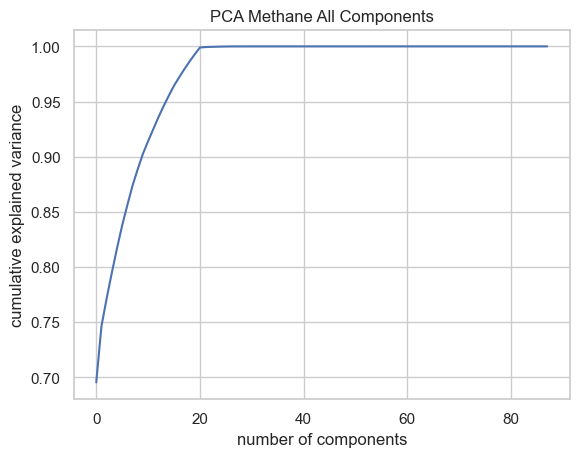

None

In [95]:
# Make plots of cumulative explained variance
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_meth.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("PCA Methane All Components")
# plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())

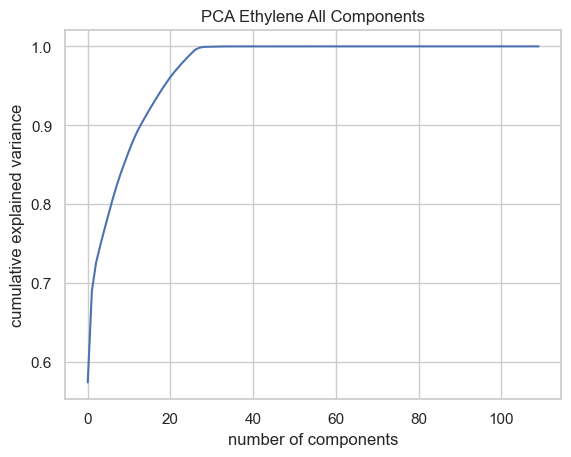

None

In [96]:
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_ethy.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("PCA Ethylene All Components")
# plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())

In [101]:
x_meth_train_ferp.shape

(1671401, 31)

In [189]:
# Implement 0.95 variance threshold
pca_meth_best = PCA(n_components=0.95)
pca_meth_best.fit(x_meth_train_ferp)
pca_ethy_best = PCA(n_components=0.95)
pca_ethy_best.fit(x_ethy_train_ferp)

PCA(n_components=0.95)

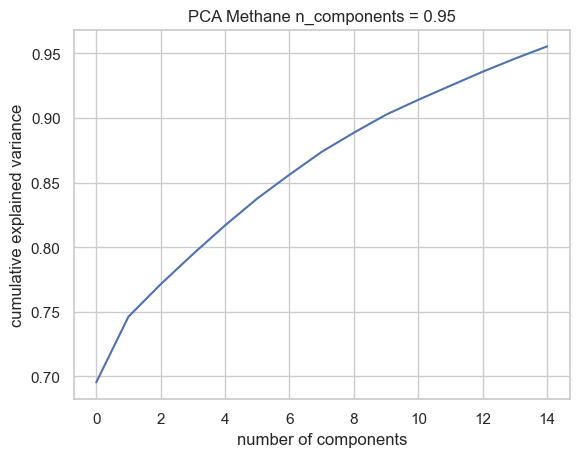

None

In [190]:
# Make plots of cumulative explained variance
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_meth_best.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("PCA Methane n_components = 0.95")
# plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())

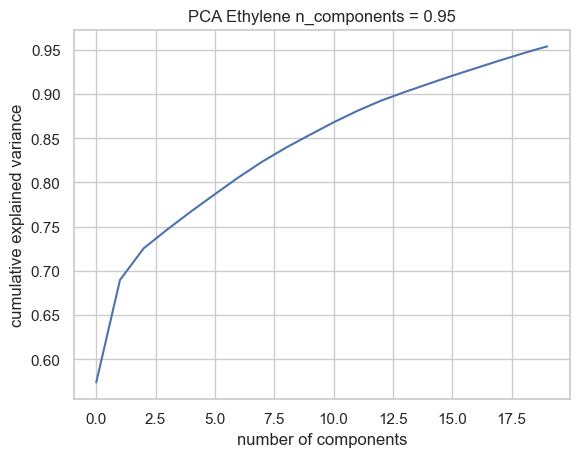

None

In [99]:
# Make plots of cumulative explained variance
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_ethy_best.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("PCA Ethylene n_components = 0.95")
# plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())

In [191]:
# Fit the PCA on the data
x_meth_train_preprocessed = pca_meth_best.transform(x_meth_train_ferp)
x_ethy_train_preprocessed = pca_ethy_best.transform(x_ethy_train_ferp)
x_meth_test_preprocessed = pca_meth_best.transform(x_meth_test_ferp)
x_ethy_test_preprocessed = pca_ethy_best.transform(x_ethy_test_ferp)

In [101]:
x_meth_train_preprocessed.shape, y_meth_train.shape

((1651401, 15), (1651401,))

# Run ElasticNet

In [192]:
elastic_net_param_grid = {
    'alpha': [0.01, 0.1, 1, 2],
    'l1_ratio': [0, 0.25, 0.5, 0.75, 1],
}

In [103]:
from sklearn.linear_model import ElasticNet

In [193]:
optim_enet_meth = optimize_halving_model(ElasticNet(), elastic_net_param_grid, "neg_root_mean_squared_error", True, 5, 10, -1, x_meth_train_preprocessed, y_meth_train, x_meth_test_preprocessed, y_meth_test)
print(optim_enet_meth[3:])
model_collections["optim_enet_meth"] = optim_enet_meth

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 183489
max_resources_: 1651401
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 20
n_resources: 183489
Fitting 5 folds for each of 20 candidates, totalling 100 fits
----------
iter: 1
n_candidates: 7
n_resources: 550467
Fitting 5 folds for each of 7 candidates, totalling 35 fits
----------
iter: 2
n_candidates: 3
n_resources: 1651401
Fitting 5 folds for each of 3 candidates, totalling 15 fits


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.575e+09, tolerance: 1.103e+06 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


56.271444979735435
296.67 0.0 296.67
((56.271444979735435, 0.8885370112380353, 0.18967689682049224, 7.67465918643904e+16, 34.5046571125938), {'alpha': 2, 'l1_ratio': 0}, -53.8416169375195)


In [194]:
print(optim_enet_meth[4])

{'alpha': 2, 'l1_ratio': 0}


In [195]:
joblib.dump(optim_enet_meth, "models/best_meth_fmi_enet.pkl")

['models/best_meth_fmi_enet.pkl']

In [196]:
optim_enet_ethy = optimize_halving_model(ElasticNet(), elastic_net_param_grid, "neg_root_mean_squared_error", True, 5, 10, -1, x_ethy_train_preprocessed, y_ethy_train, x_ethy_test_preprocessed, y_ethy_test)
print(optim_enet_ethy[3:])
model_collections["optim_enet_ethy"] = optim_enet_ethy

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 183489
max_resources_: 1651401
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 20
n_resources: 183489
Fitting 5 folds for each of 20 candidates, totalling 100 fits


----------
iter: 1
n_candidates: 7
n_resources: 550467
Fitting 5 folds for each of 7 candidates, totalling 35 fits
----------
iter: 2
n_candidates: 3
n_resources: 1651401
Fitting 5 folds for each of 3 candidates, totalling 15 fits
4.065451173169898
20.0 0.0 20.0
((4.065451173169898, 0.8756359674315126, 0.20327255865849492, 5449635666946840.0, 2.7103209466095772), {'alpha': 0.01, 'l1_ratio': 1}, -3.768004502767674)


In [197]:
print(optim_enet_ethy[4])

{'alpha': 0.01, 'l1_ratio': 1}


In [198]:
joblib.dump(optim_enet_ethy, "models/best_ethy_fmi_enet.pkl")

['models/best_ethy_fmi_enet.pkl']

# Run Linear SVR

In [199]:
linear_svr_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'epsilon': [0, 0.1, 1],
    'verbose': [10],
}

In [200]:
optim_lsvr_meth = optimize_halving_model(LinearSVR(), linear_svr_param_grid, "neg_root_mean_squared_error", True, 5, 10, -1, x_meth_train_preprocessed, y_meth_train, x_meth_test_preprocessed, y_meth_test)
print(optim_lsvr_meth[3:])
model_collections["optim_lsvr_meth"] = optim_lsvr_meth

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 183489
max_resources_: 1651401
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 15
n_resources: 183489
Fitting 5 folds for each of 15 candidates, totalling 75 fits
----------
iter: 1
n_candidates: 5
n_resources: 550467
Fitting 5 folds for each of 5 candidates, totalling 25 fits
----------
iter: 2
n_candidates: 2
n_resources: 1651401
Fitting 5 folds for each of 2 candidates, totalling 10 fits


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[LibLinear]56.537210953209794
296.67 0.0 296.67
((56.537210953209794, 0.8927335074155319, 0.19057272711500925, 6.438485989886941e+16, 32.938976534700075), {'C': 1, 'epsilon': 1, 'verbose': 10}, -54.654807536859906)


In [201]:
joblib.dump(optim_lsvr_meth, "models/best_meth_fmi_lsvr.pkl")

['models/best_meth_fmi_lsvr.pkl']

In [202]:
optim_lsvr_ethy = optimize_halving_model(LinearSVR(), linear_svr_param_grid, "neg_root_mean_squared_error", True, 5, 10, -1, x_ethy_train_preprocessed, y_ethy_train, x_ethy_test_preprocessed, y_ethy_test)
print(optim_lsvr_ethy[3])
model_collections["optim_lsvr_ethy"] = optim_lsvr_ethy

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 183489
max_resources_: 1651401
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 15
n_resources: 183489
Fitting 5 folds for each of 15 candidates, totalling 75 fits
----------
iter: 1
n_candidates: 5
n_resources: 550467
Fitting 5 folds for each of 5 candidates, totalling 25 fits
----------
iter: 2
n_candidates: 2
n_resources: 1651401
Fitting 5 folds for each of 2 candidates, totalling 10 fits


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[LibLinear]

c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


4.1624378574359095
20.0 0.0 20.0
(4.1624378574359095, 0.8965254149953424, 0.20812189287179547, 5219873814818992.0, 2.3798302173368144)


In [203]:
joblib.dump(optim_lsvr_ethy, "models/best_ethy_fmi_lsvr.pkl")

['models/best_ethy_fmi_lsvr.pkl']

# Plot Results

C:\Users\jacob\AppData\Local\Temp\ipykernel_33884\3335752449.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(best_model_labels, rotation = 45)
C:\Users\jacob\AppData\Local\Temp\ipykernel_33884\3335752449.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(best_model_labels, rotation = 45)
C:\Users\jacob\AppData\Local\Temp\ipykernel_33884\3335752449.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(best_model_labels, rotation = 45)
C:\Users\jacob\AppData\Local\Temp\ipykernel_33884\3335752449.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(best_model_labels, rotation = 45)
C:\Users\jacob\AppData\Local\Temp\ipykernel_33884\3335752449.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(best_model_labels, rotation = 45)


Text(0.5, 1.0, 'MAE of Hypertuned Models')

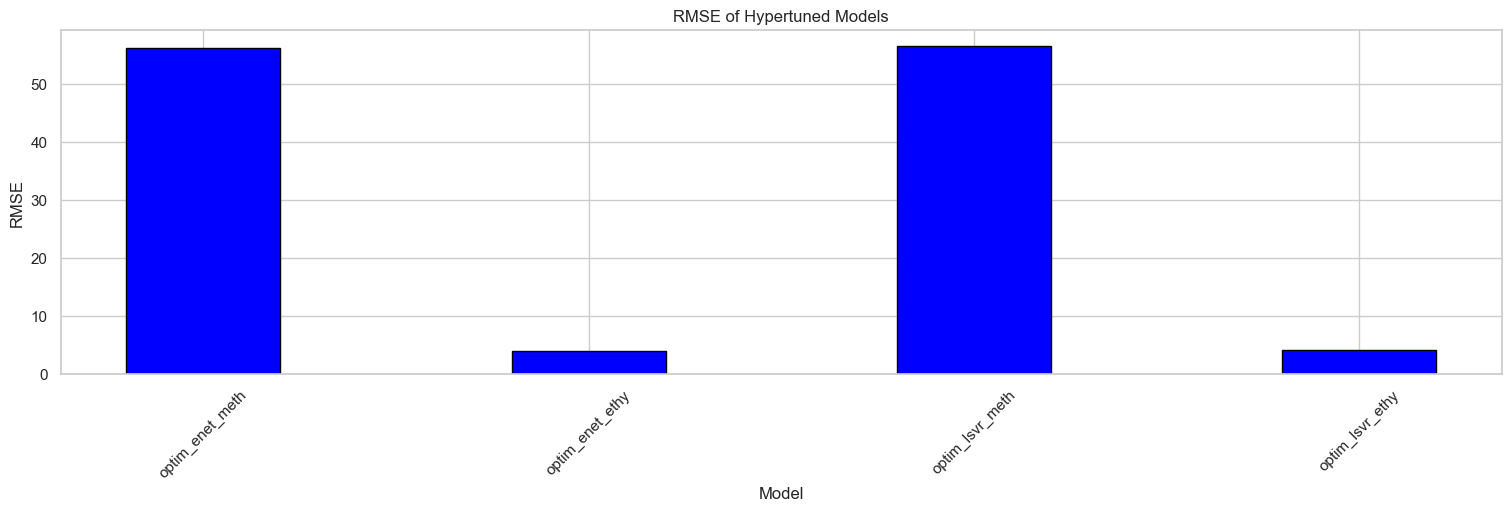

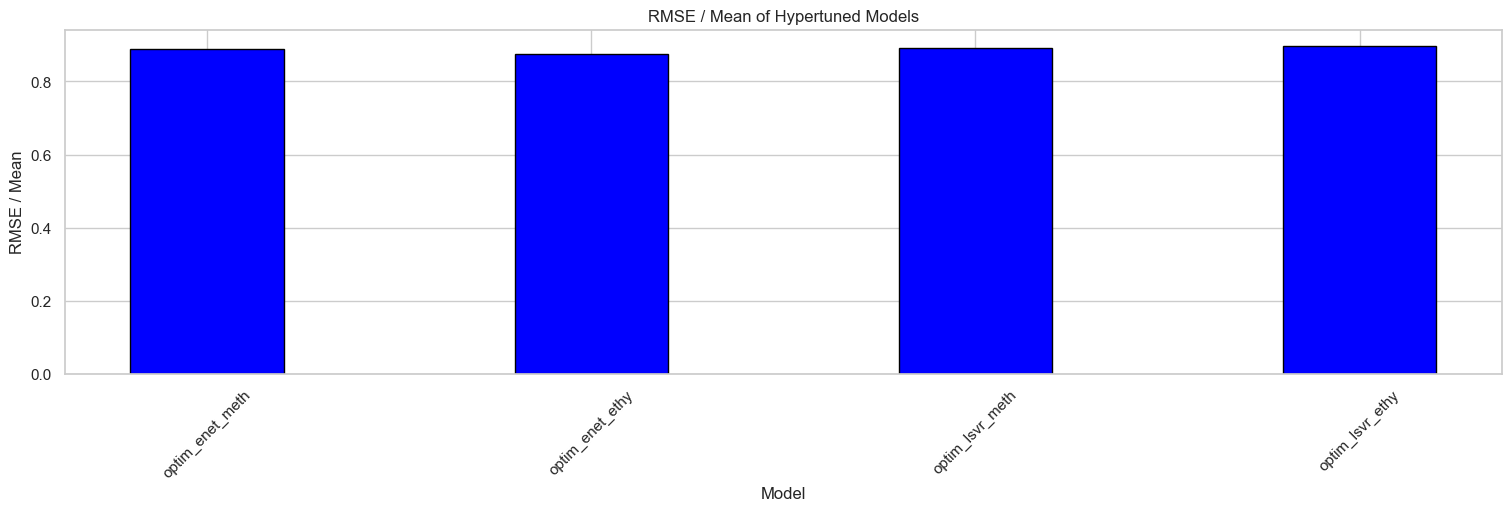

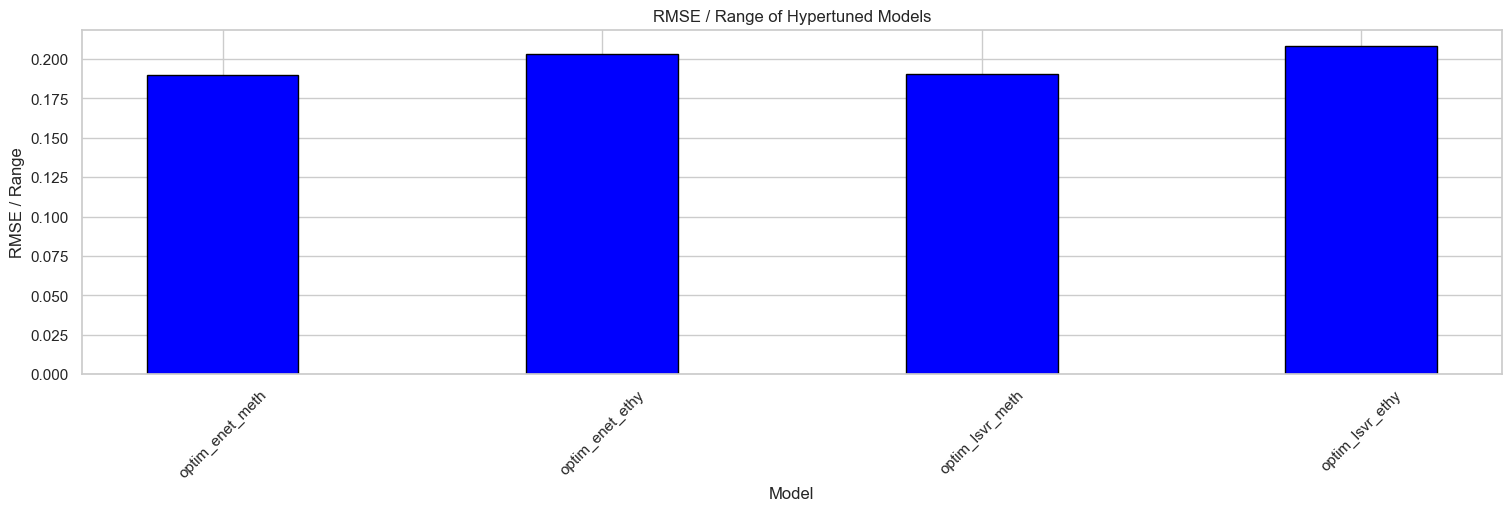

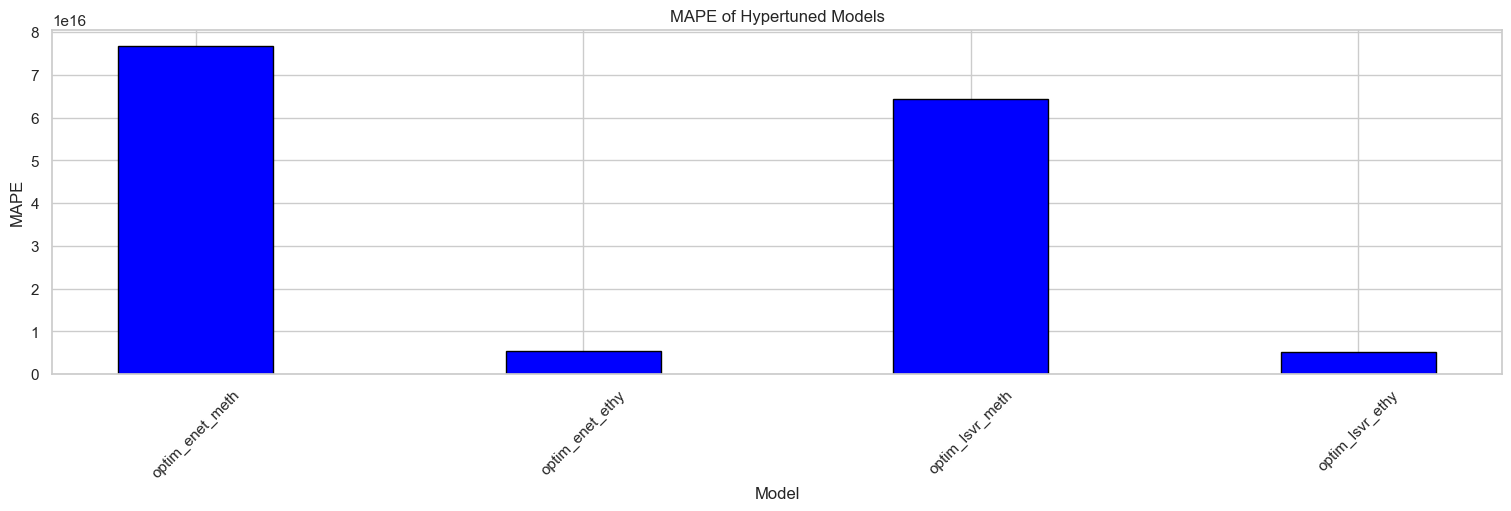

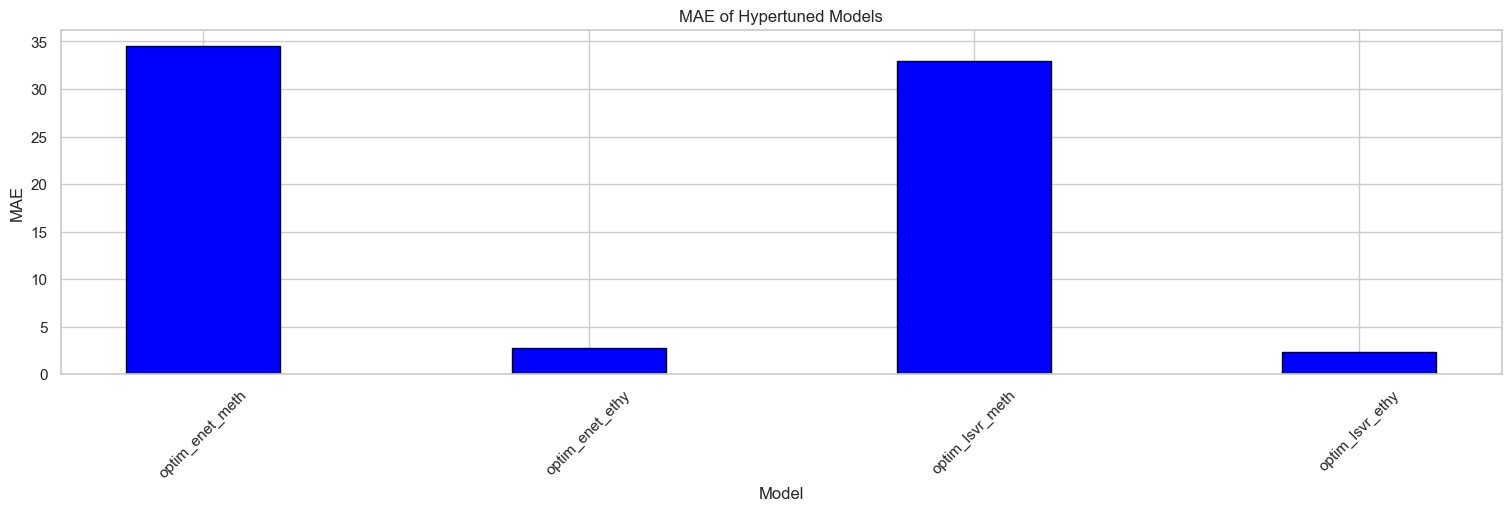

In [204]:
# Get Plots of the model data
best_model_labels = model_collections.keys()
rmses = [model_collections[label][3][0] for label in best_model_labels]

rmses_div_mean = [model_collections[label][3][1] for label in best_model_labels]
rmses_div_range = [model_collections[label][3][2] for label in best_model_labels]
mapes = [model_collections[label][3][3] for label in best_model_labels]
maes = [model_collections[label][3][4] for label in best_model_labels]

fig = plt.figure(figsize = (15, 5), layout = "constrained")
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(best_model_labels, rmses, color = 'blue', edgecolor='black', width = 0.4)
ax1.set_xticklabels(best_model_labels, rotation = 45)
ax1.set_ylabel("RMSE")
ax1.set_xlabel("Model")
ax1.set_title("RMSE of Hypertuned Models")

fig = plt.figure(figsize = (15, 5), layout = "constrained")
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(best_model_labels, rmses_div_mean, color = 'blue', edgecolor='black', width = 0.4)
ax1.set_xticklabels(best_model_labels, rotation = 45)
ax1.set_ylabel("RMSE / Mean")
ax1.set_xlabel("Model")
ax1.set_title("RMSE / Mean of Hypertuned Models")

fig = plt.figure(figsize = (15, 5), layout = "constrained")
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(best_model_labels, rmses_div_range, color = 'blue', edgecolor='black', width = 0.4)
ax1.set_xticklabels(best_model_labels, rotation = 45)
ax1.set_ylabel("RMSE / Range")
ax1.set_xlabel("Model")
ax1.set_title("RMSE / Range of Hypertuned Models")

fig = plt.figure(figsize = (15, 5), layout = "constrained")
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(best_model_labels, mapes, color = 'blue', edgecolor='black', width = 0.4)
ax1.set_xticklabels(best_model_labels, rotation = 45)
ax1.set_ylabel("MAPE")
ax1.set_xlabel("Model")
ax1.set_title("MAPE of Hypertuned Models")

fig = plt.figure(figsize = (15, 5), layout = "constrained")
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(best_model_labels, maes, color = 'blue', edgecolor='black', width = 0.4)
ax1.set_xticklabels(best_model_labels, rotation = 45)
ax1.set_ylabel("MAE")
ax1.set_xlabel("Model")
ax1.set_title("MAE of Hypertuned Models")

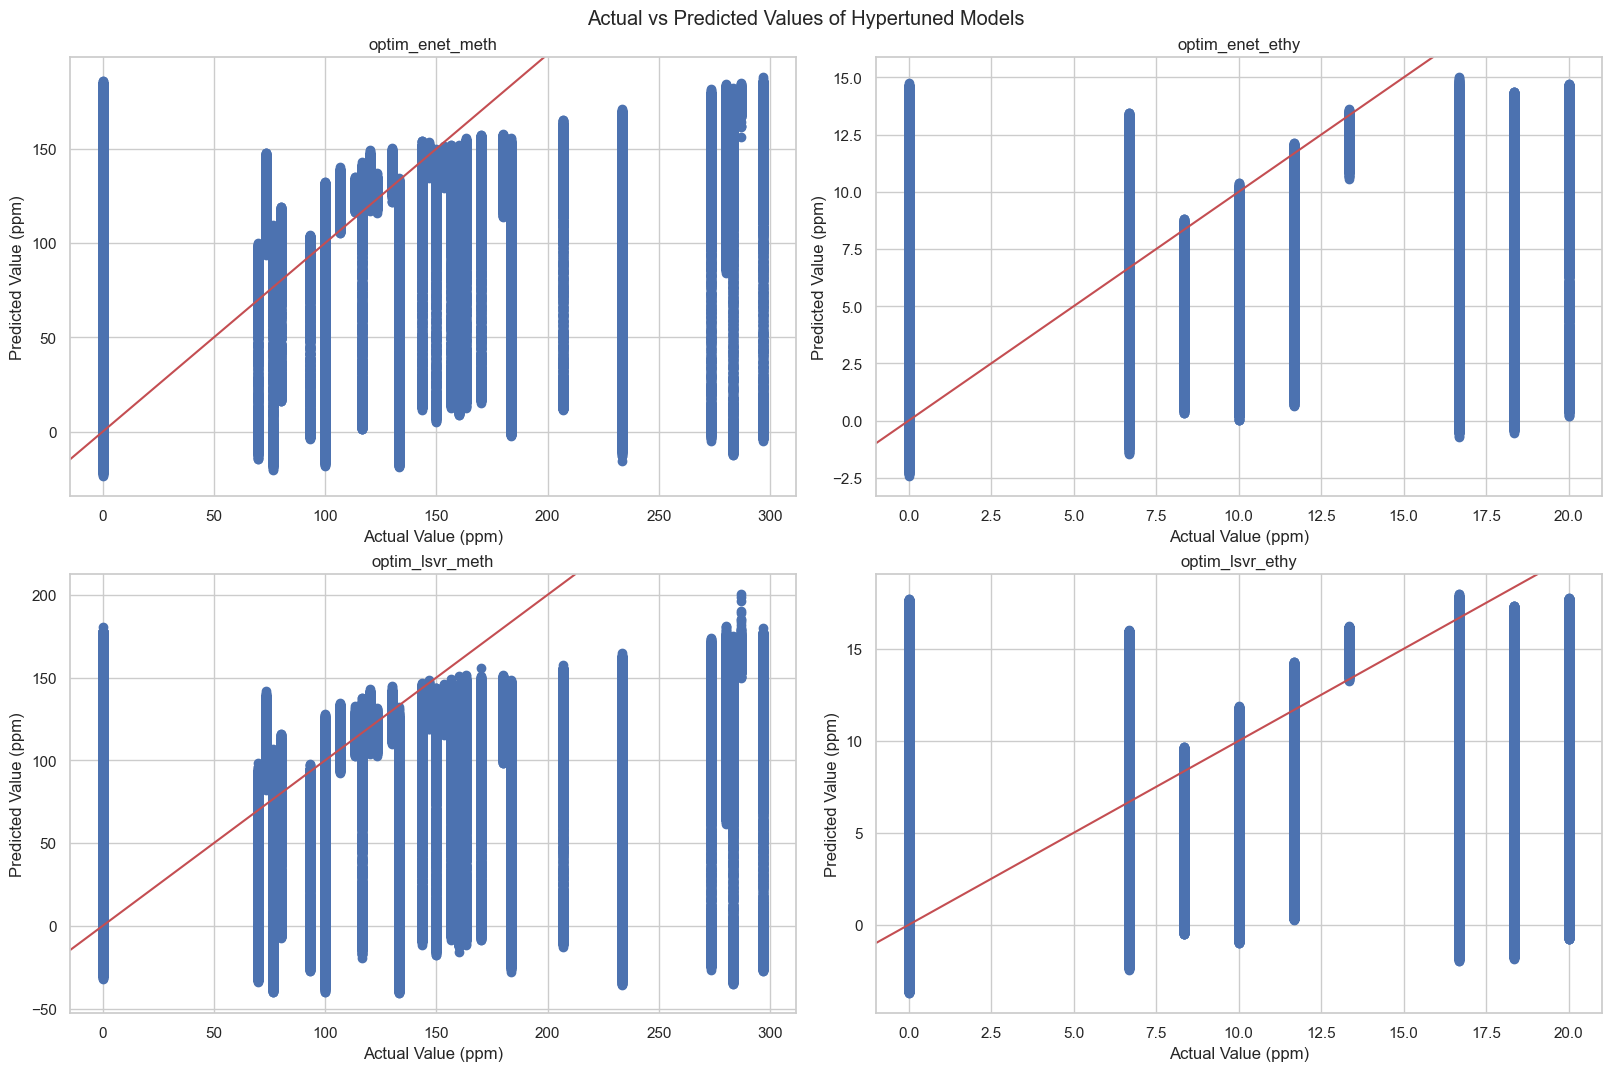

In [205]:
# Make plots of actual vs predicted values
fig = plt.figure(figsize=(16, 15), layout = "constrained")
fig.suptitle("Actual vs Predicted Values of Hypertuned Models")
for i in range(len(model_collections)):
  curr_best_model_label = list(best_model_labels)[i]
  curr_best_model = model_collections[curr_best_model_label]

  ax1 = fig.add_subplot(len(model_collections)//2 + 1, 2, i + 1)
  ax1.set_ylabel("Predicted Value (ppm)")
  ax1.set_xlabel("Actual Value (ppm)")
  ax1.title.set_text(curr_best_model_label)
  # Plot the predicted y values vs the actual y values
  ax1.scatter(curr_best_model[1], curr_best_model[2])
  # Plot the line y = x
  ax1.axline((0, 0), slope=1, color = "r")
  # Make sure that the axes are the same
  # ax1.set_aspect('equal', adjustable='box')
plt.show()

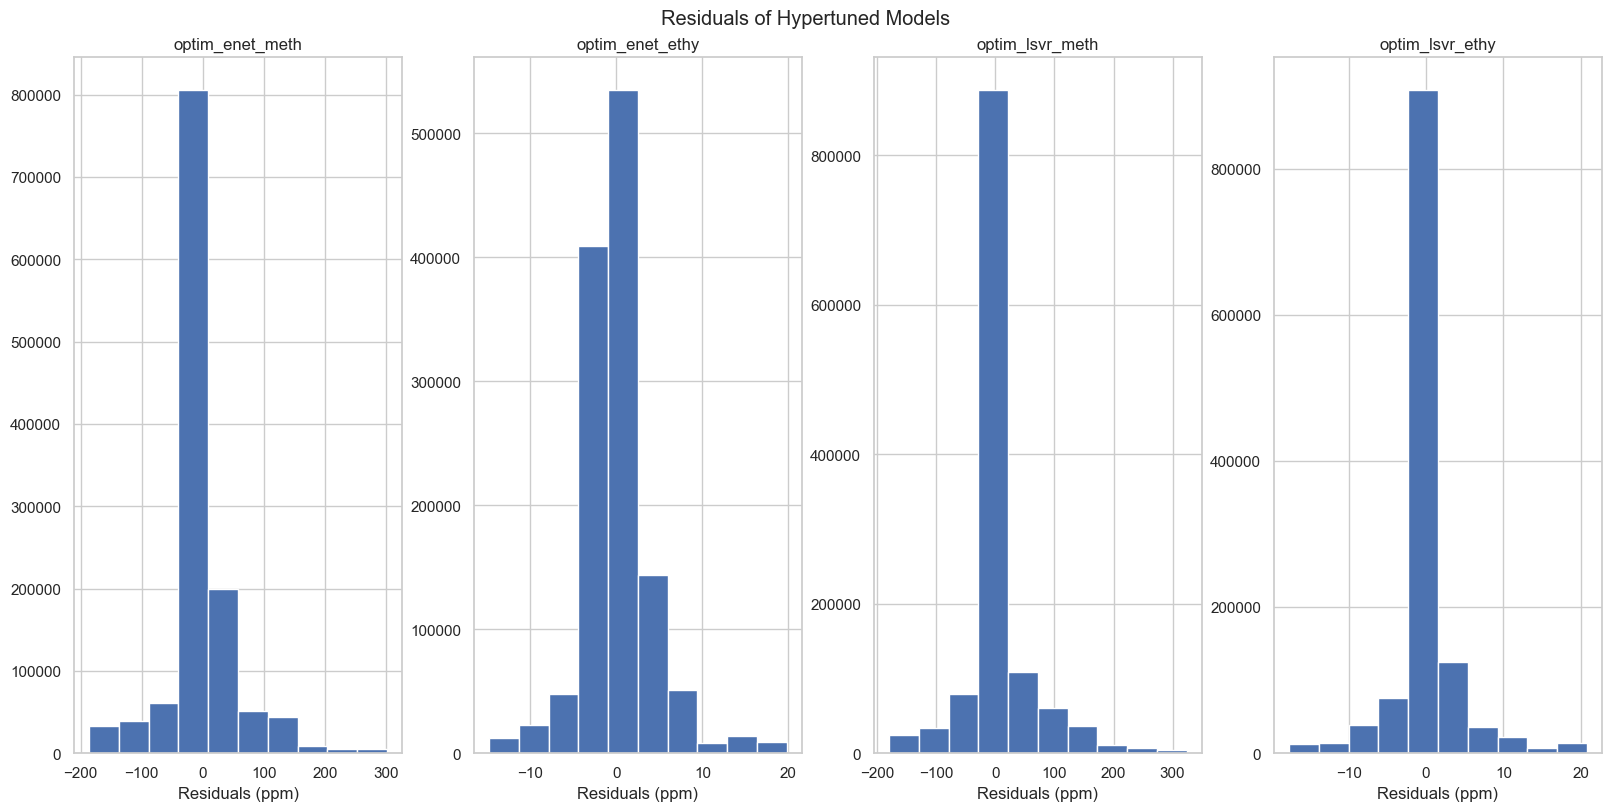

In [206]:
# Make plots of residuals values
fig = plt.figure(figsize=(16, 15), layout = "constrained")
fig.suptitle("Residuals of Hypertuned Models")
for i in range(len(model_collections)):
  curr_best_model_label = list(best_model_labels)[i]
  curr_best_model = model_collections[curr_best_model_label]
  ax1 = fig.add_subplot(len(model_collections)//4 + 1, 4, i + 1)
  ax1.set_xlabel("Residuals (ppm)")
  ax1.title.set_text(curr_best_model_label)
  # Plot the predicted y values vs the actual y values
  # print(residuals[i].shape, residuals[i])
  ax1.hist(curr_best_model[1] - curr_best_model[2])
  # Make sure that the axes are the same
  # ax1.set_aspect('equal', adjustable='box')
plt.show()

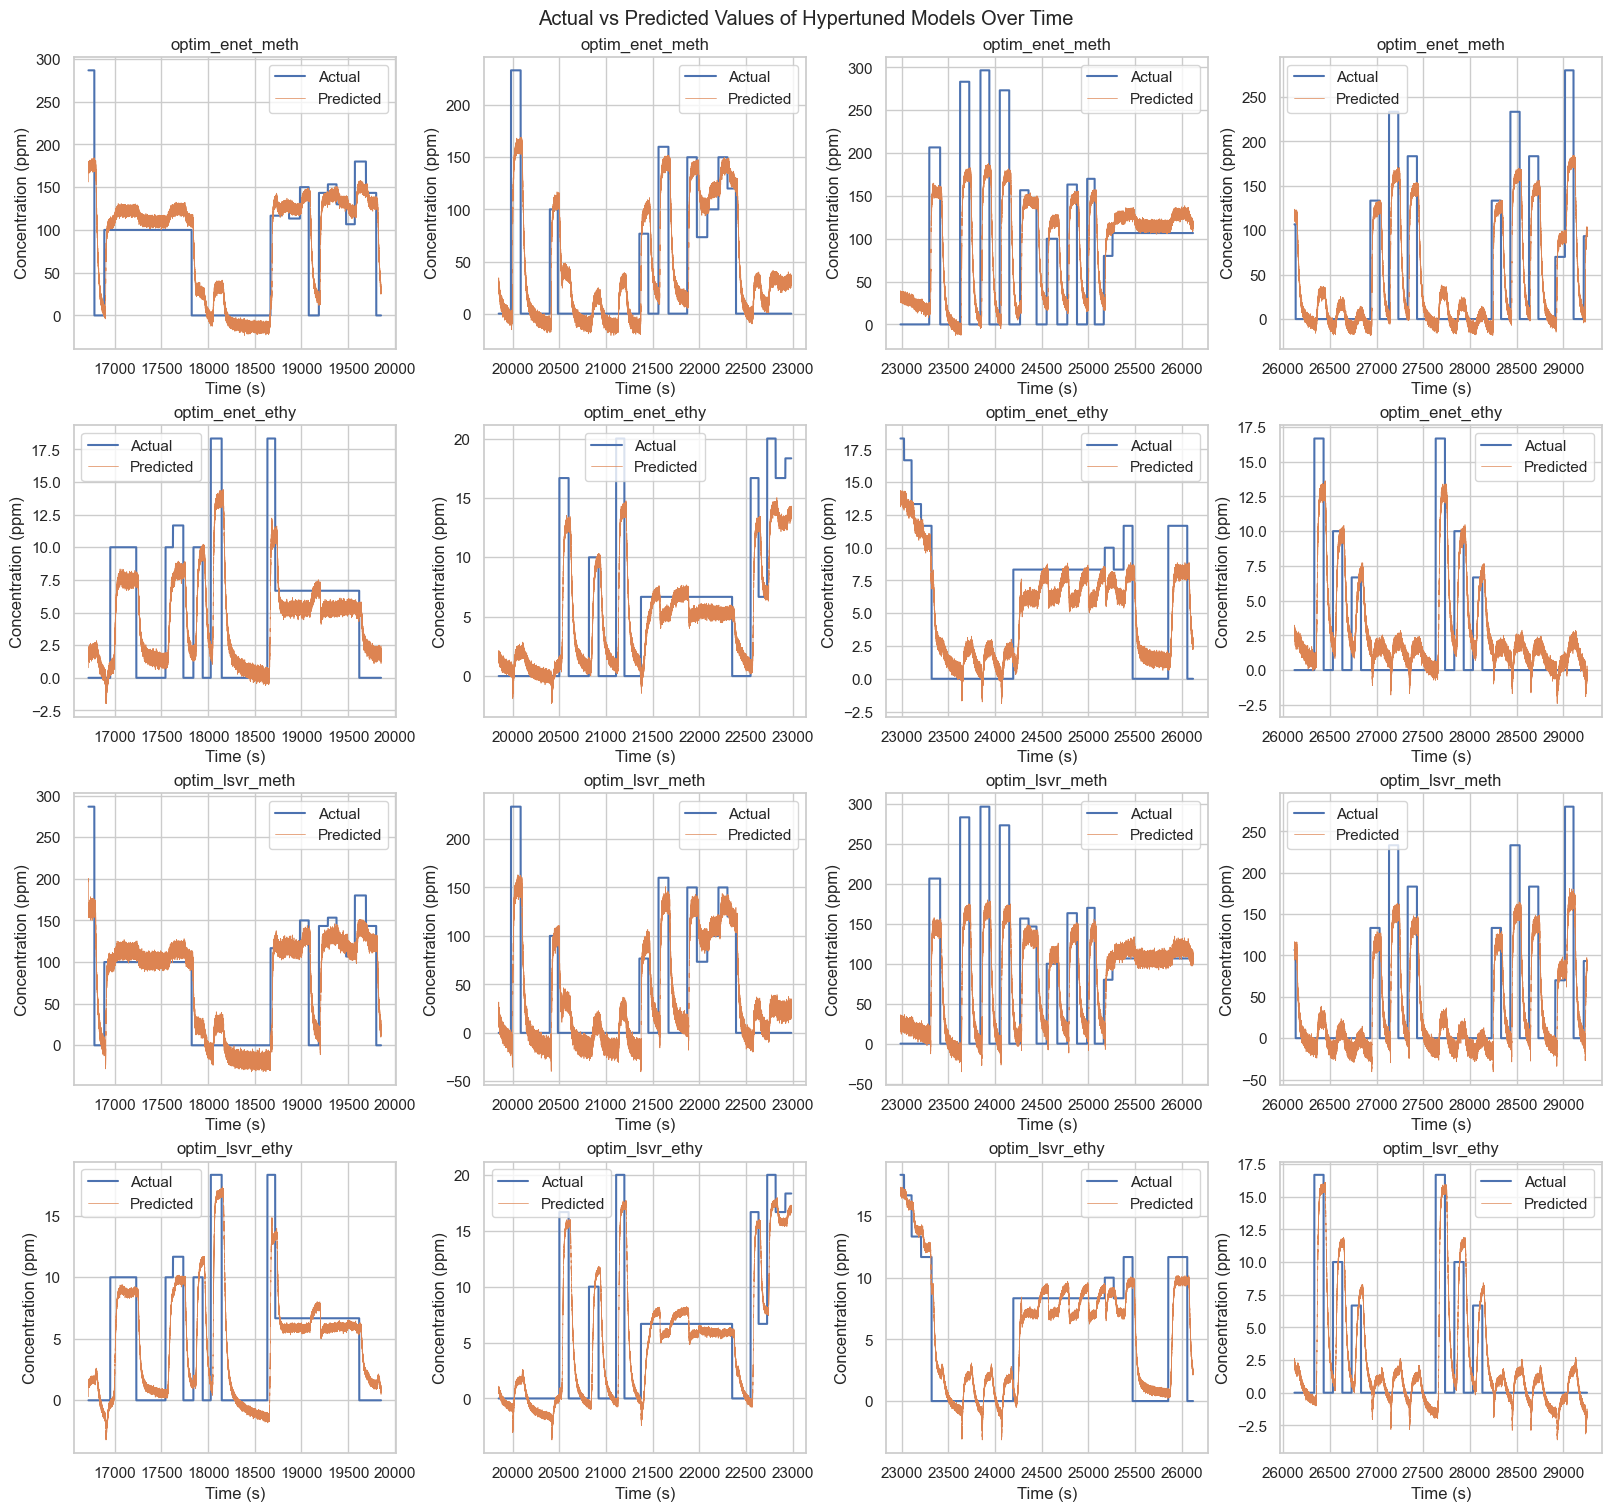

In [207]:
# Make plots of actual vs predicted values over time
fig = plt.figure(figsize=(16, 15), layout = "constrained")
fig.suptitle("Actual vs Predicted Values of Hypertuned Models Over Time")
num_ranges = 4
for i in range(len(model_collections)):
  curr_best_model_label = list(best_model_labels)[i]
  curr_best_model = model_collections[curr_best_model_label]


  for j in range(num_ranges):
    # Plot the ith range
    # Plot the predicted y values vs the actual y values
    ax1 = fig.add_subplot(len(model_collections), num_ranges, i * num_ranges + j + 1)
    ax1.set_ylabel("Concentration (ppm)")
    ax1.set_xlabel("Time (s)")
    ax1.title.set_text(curr_best_model_label)
    data_len = len(x1_test['Time'])
    ax1.plot(x1_test['Time'][j * data_len // 4: (j + 1) * data_len // 4], curr_best_model[1][j * data_len // 4: (j + 1) * data_len // 4], label = "Actual")
    ax1.plot(x1_test['Time'][j * data_len // 4: (j + 1) * data_len // 4], curr_best_model[2][j * data_len // 4: (j + 1) * data_len // 4], label = "Predicted", linewidth = 0.5)
    ax1.legend()
  # Plot the line y = x
  # Make sure that the axes are the same
  # ax1.set_aspect('equal', adjustable='box')
plt.show()

# DON'T RUN BELOW CODE - EXPERIMENTAL

# Add change points to training data

In [37]:
is_changepoint = y_meth_train.eq(y_meth_train.shift()).apply(lambda row: not row)
is_changepoint

20000       True
20001      False
20002      False
20003      False
20004      False
           ...  
1671396    False
1671397    False
1671398    False
1671399    False
1671400    False
Name: Methane, Length: 1651401, dtype: bool

In [38]:
# Get the change points in a list
changepoints = np.array(list(y_meth_train[is_changepoint].index)) - 20000 

In [39]:
len(changepoints)

77

In [181]:
x1_train['Time'].iloc[0]

200.27

C:\Users\jacob\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\jacob\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


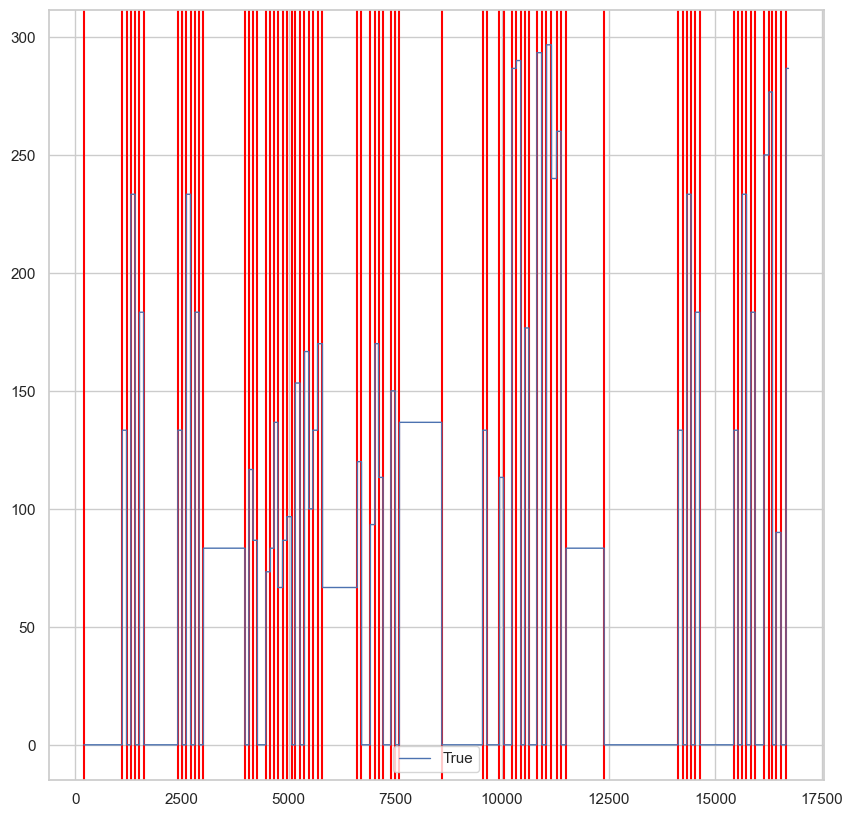

In [186]:
# Plot the change points
plt.figure(figsize=(10,10))
for pt in changepoints:
    plt.axvline(x1_train['Time'].iloc[pt], c = "red")
plt.plot(x1_train['Time'].values, y_meth_train.values, label = "True", linewidth=1)
plt.legend()

In [190]:
meth_is_changepoint_test = y_meth_test.eq(y_meth_test.shift()).apply(lambda row: not row)
meth_is_changepoint_test

1671401     True
1671402    False
1671403    False
1671404    False
1671405    False
           ...  
2924947    False
2924948    False
2924949    False
2924950    False
2924951    False
Name: Methane, Length: 1253551, dtype: bool

# Fit logitistic regression on the change points

In [247]:
isof_meth = IsolationForest(contamination= 1e-3, random_state=42, verbose = 10, n_jobs= -1)
isof_meth.fit(x_meth_train_fe_robust)
outliers = isof_meth.predict(x_meth_train_fe_robust)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.


Building estimator 1 of 9 for this parallel run (total 100)...Building estimator 1 of 9 for this parallel run (total 100)...
Building estimator 1 of 9 for this parallel run (total 100)...
Building estimator 1 of 9 for this parallel run (total 100)...
Building estimator 1 of 8 for this parallel run (total 100)...
Building estimator 1 of 8 for this parallel run (total 100)...
Building estimator 1 of 8 for this parallel run (total 100)...
Building estimator 1 of 8 for this parallel run (total 100)...

Building estimator 1 of 8 for this parallel run (total 100)...
Building estimator 1 of 8 for this parallel run (total 100)...
Building estimator 1 of 8 for this parallel run (total 100)...
Building estimator 1 of 8 for this parallel run (total 100)...
Building estimator 2 of 8 for this parallel run (total 100)...
Building estimator 2 of 9 for this parallel run (total 100)...
Building estimator 2 of 9 for this parallel run (total 100)...
Building estimator 2 of 8 for this parallel run (total 

[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    3.5s remaining:   10.6s
[Parallel(n_jobs=12)]: Done   5 out of  12 | elapsed:    3.7s remaining:    5.2s
[Parallel(n_jobs=12)]: Done   7 out of  12 | elapsed:    3.7s remaining:    2.6s


Building estimator 8 of 8 for this parallel run (total 100)...Building estimator 8 of 8 for this parallel run (total 100)...

Building estimator 9 of 9 for this parallel run (total 100)...
Building estimator 9 of 9 for this parallel run (total 100)...
Building estimator 8 of 8 for this parallel run (total 100)...


[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:    3.8s remaining:    1.2s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    3.9s finished


In [248]:
outlier_indices = list(np.where(outliers == -1)[0])
outlier_indices

[91819,
 91824,
 91825,
 91830,
 111582,
 111583,
 111584,
 111587,
 111588,
 111589,
 111590,
 111592,
 111593,
 111594,
 111595,
 111596,
 111597,
 111598,
 111599,
 111600,
 111601,
 111602,
 111603,
 111604,
 111605,
 111606,
 111607,
 111608,
 111609,
 111610,
 111611,
 111612,
 111613,
 111614,
 111615,
 111616,
 111617,
 111618,
 111619,
 111620,
 111621,
 111622,
 111624,
 111625,
 111626,
 111627,
 111628,
 111629,
 111630,
 111631,
 111632,
 111633,
 111635,
 111636,
 111637,
 111638,
 111639,
 111640,
 111641,
 111642,
 111644,
 111645,
 111646,
 111647,
 111648,
 111649,
 111650,
 111651,
 111652,
 111653,
 111654,
 111655,
 111656,
 111657,
 111659,
 111661,
 111662,
 111666,
 111667,
 111668,
 111669,
 111670,
 111671,
 111672,
 111673,
 111675,
 111676,
 111677,
 111678,
 111681,
 111682,
 111685,
 111686,
 111687,
 111688,
 111691,
 111692,
 111693,
 111696,
 111697,
 111698,
 111699,
 111702,
 111703,
 111704,
 111707,
 111708,
 111711,
 111712,
 111716,
 111718,
 1117

C:\Users\jacob\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\jacob\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


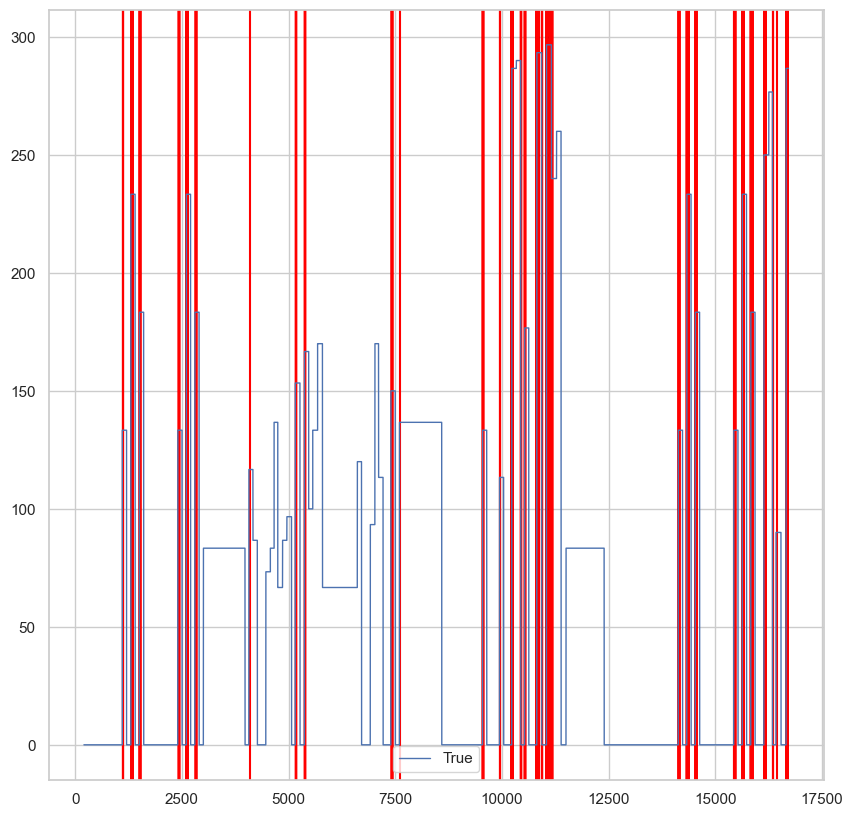

In [249]:
# Plot the change points
plt.figure(figsize=(10,10))
for pt in list(outlier_indices):
    plt.axvline(x1_train['Time'].iloc[pt], c = "red")
plt.plot(x1_train['Time'].values, y_meth_train.values, label = "True", linewidth=1)
plt.legend()

In [251]:
# Plot the change points
plt.figure(figsize=(10,10))
for pt in meth_changepoints_predicted:
    plt.axvline(x1_test['Time'].iloc[pt], c = "red")
plt.plot(x1_test['Time'].values, y_meth_test.values, label = "True", linewidth=1)
plt.legend()

Error in callback <function flush_figures at 0x000001BDF65B65C0> (for post_execute):


KeyboardInterrupt: 

In [254]:
compute_class_weight

<function sklearn.utils.class_weight.compute_class_weight(class_weight, *, classes, y)>

In [255]:
weighting = compute_class_weight('balanced', classes = [True,False],  y= is_changepoint)
weighting

array([1.07233831e+04, 5.00023315e-01])

In [256]:
1e4/5e-1

20000.0

In [302]:
logr_change_point_meth = LogisticRegression(class_weight = {True: 1000, False: 1})
logr_change_point_meth.fit(x_meth_fe_train, is_changepoint)

c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight={False: 1, True: 1000})

In [271]:
# meth_is_changepoint_predict = logr_change_point_meth.predict(x1_train[good_meth_sensors])

In [308]:
logr_change_point_meth = LogisticRegression(class_weight = {True: 20000, False: 1})
logr_change_point_meth.fit(x_meth_train_preprocessed, is_changepoint)

LogisticRegression(class_weight={False: 1, True: 20000})

In [322]:
meth_is_changepoint_predict = logr_change_point_meth.predict(x_meth_test_preprocessed)

In [318]:
meth_is_changepoint_predict = logr_change_point_meth.predict(x_meth_fe_test)

c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


ValueError: X has 88 features, but LogisticRegression is expecting 15 features as input.

In [332]:
lsvc_change_point_meth = LinearSVC(class_weight = 'balanced')
lsvc_change_point_meth.fit(x_meth_fe_train, is_changepoint)

c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(class_weight='balanced')

In [333]:
meth_is_changepoint_predict = lsvc_change_point_meth.predict(x_meth_fe_test)

In [327]:
meth_is_changepoint_predict = ~meth_is_changepoint_predict

In [334]:
# Get the change points in a list
meth_changepoints_predicted = np.array(list(y_meth_test[meth_is_changepoint_predict].index)) - 1671401      

In [335]:
len(meth_changepoints_predicted)

0

In [321]:
sum(meth_is_changepoint_predict)

409273

In [325]:
meth_changepoints_predicted

array([      0,       1,       2, ..., 1253541, 1253545, 1253546])

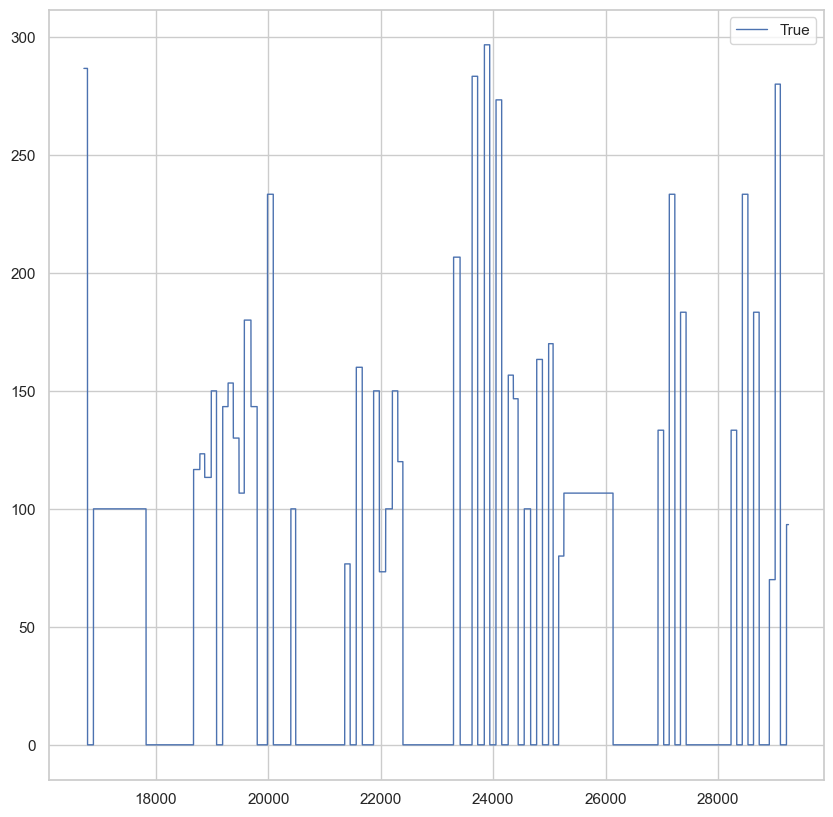

In [336]:
# Plot the change points
plt.figure(figsize=(10,10))
plt.plot(x1_test['Time'].values, y_meth_test.values, label = "True", linewidth=1)
plt.scatter(x1_test['Time'].iloc[meth_changepoints_predicted], y_meth_test.iloc[meth_changepoints_predicted], c = "red")
plt.legend()

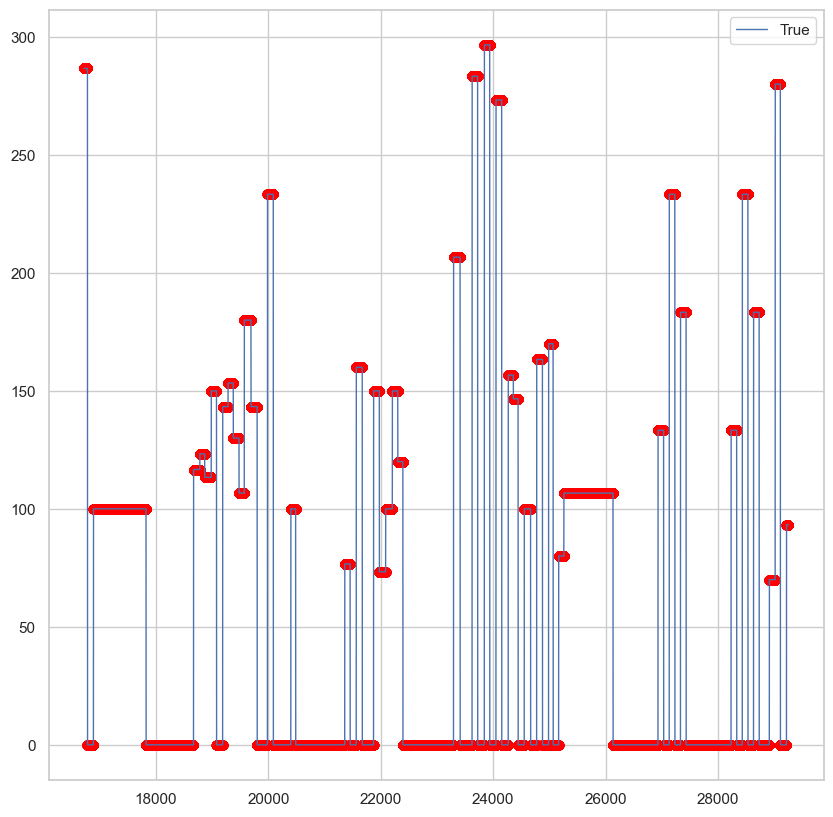

In [326]:
# Plot the change points
plt.figure(figsize=(10,10))
plt.plot(x1_test['Time'].values, y_meth_test.values, label = "True", linewidth=1)
plt.scatter(x1_test['Time'].iloc[meth_changepoints_predicted], y_meth_test.iloc[meth_changepoints_predicted], c = "red")
plt.legend()

# Do Time Series EDA 

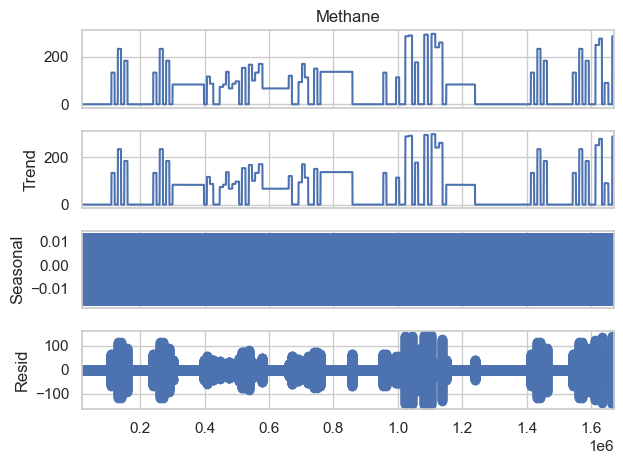

In [342]:
# Plot the trends
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(train_df["Methane"], period = 100, model='additive')
fig = decomposition.plot()

# Do change point detection on the predicted values

Need to smooth results

In [32]:
predicted_vals_lr_meth_fe = lr_meth_fe[2]

In [ ]:
predicted_vals_lr_meth_fe

In [172]:
import scipy.signal as ss


In [174]:
ss_smoothed_pv_lr_meth_fe = ss.medfilt(predicted_vals_lr_meth_fe, kernel_size=5)

In [180]:
print(get_main_metrics(y_meth_test,predicted_vals_lr_meth_fe))
print(get_main_metrics(y_meth_test,ss_smoothed_pv_lr_meth_fe))

46.58638076768872
296.67 0.0 296.67
(46.58638076768872, 0.7356079721540117, 0.1570309797677174, 5.1221284243055224e+16, 21.99588471868871)
46.25092293196211
296.67 0.0 296.67
(46.25092293196211, 0.730311027978147, 0.15590023572306638, 4.920330836916235e+16, 21.00849267820927)


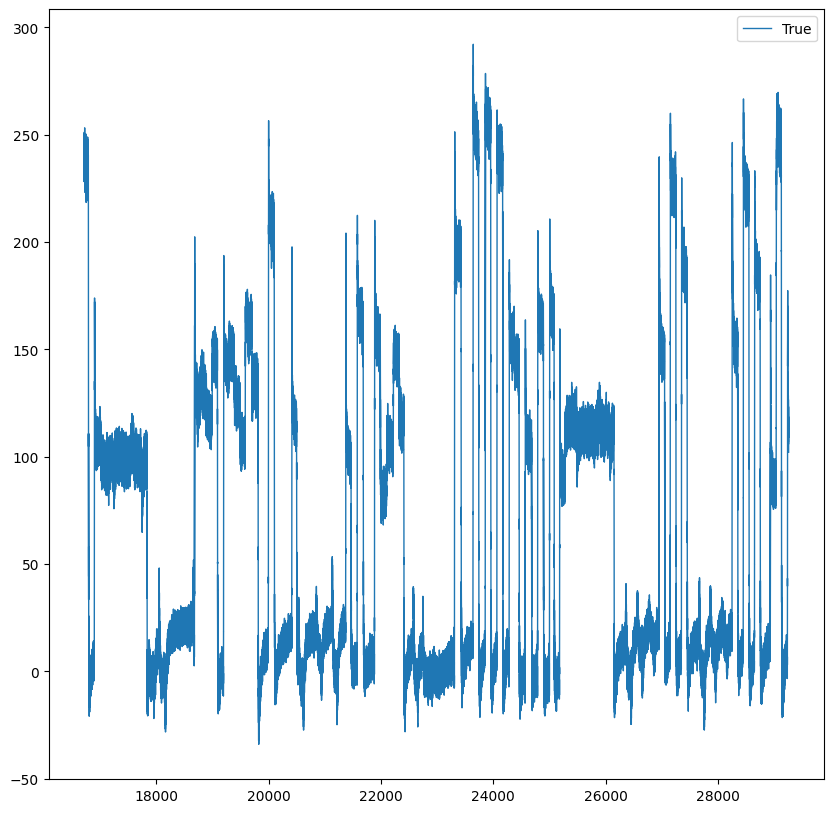

In [176]:
# Plot the change points
plt.figure(figsize=(10,10))
plt.plot(x1_test['Time'].values, ss_smoothed_pv_lr_meth_fe, label = "True", linewidth=1, zorder = 1)
plt.legend()

In [57]:
# detection
model = "l2"  # "l2", "rbf"
algo = rpt.Pelt(model = model, min_size = 8 * 1000, jump = 5).fit(predicted_vals_lr_meth_fe)
my_bkps = algo.predict(pen=3)


In [45]:
x1_test.shape

(1253551, 17)

In [58]:
len(my_bkps)

128

In [48]:
my_bkps

[1320,
 2160,
 3260,
 4490,
 5400,
 6230,
 7035,
 7835,
 8635,
 9490,
 10850,
 11805,
 12800,
 13670,
 14715,
 15625,
 16745,
 17575,
 18375,
 19175,
 19980,
 20815,
 21665,
 22475,
 23275,
 24085,
 24945,
 25745,
 26700,
 27705,
 28535,
 29400,
 30370,
 31560,
 32410,
 33675,
 34475,
 35275,
 36075,
 36945,
 37750,
 38840,
 39655,
 40985,
 41820,
 42705,
 43695,
 44495,
 45325,
 46130,
 46930,
 47910,
 49125,
 50225,
 51465,
 52940,
 53825,
 54625,
 56005,
 56805,
 58090,
 58890,
 60495,
 61670,
 62495,
 63615,
 64760,
 65560,
 66380,
 67290,
 68150,
 69065,
 70265,
 71080,
 72385,
 73235,
 74275,
 75260,
 76155,
 77130,
 78020,
 78820,
 79725,
 80905,
 81875,
 83190,
 84040,
 85000,
 86325,
 87155,
 88430,
 89795,
 90635,
 91485,
 92390,
 93555,
 94360,
 95280,
 96110,
 96975,
 98010,
 98820,
 99760,
 101005,
 102440,
 103250,
 104050,
 104850,
 105880,
 106680,
 107480,
 108280,
 109240,
 110155,
 111270,
 112070,
 112870,
 113670,
 115020,
 116305,
 117150,
 118275,
 119095,
 11994

In [77]:
predicted_bkps = list(np.array(my_bkps) - 1)

In [78]:
len(predicted_vals_lr_meth_fe)/len(changepoints)

16279.883116883117

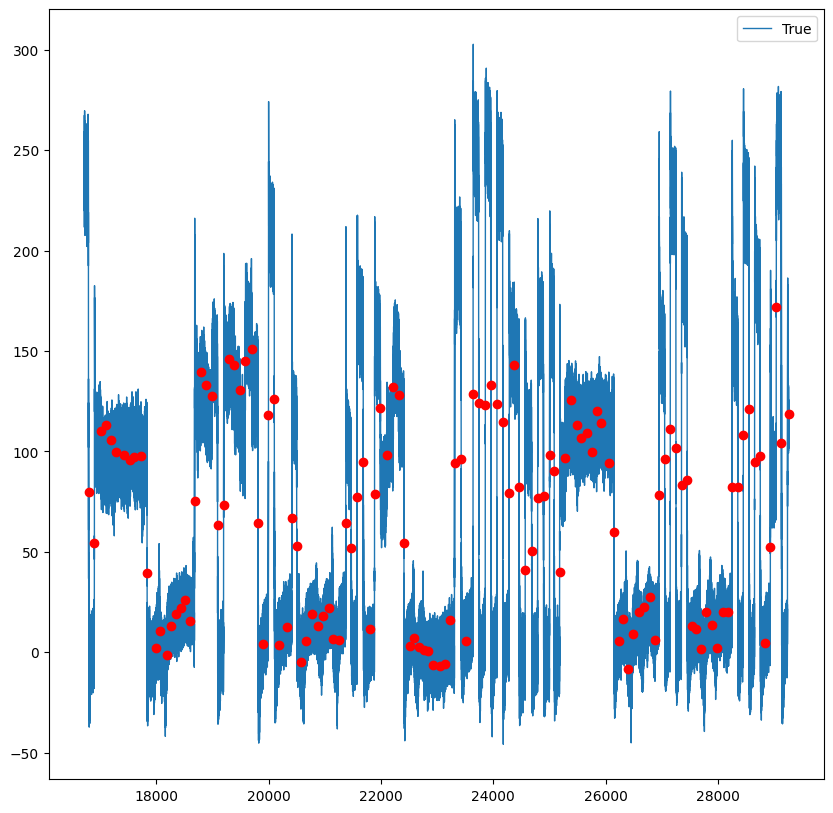

In [105]:
# Plot the change points
plt.figure(figsize=(10,10))
plt.plot(x1_test['Time'].values, predicted_vals_lr_meth_fe, label = "True", linewidth=1, zorder = 1)
plt.scatter(x1_test['Time'].iloc[predicted_bkps], predicted_vals_lr_meth_fe[predicted_bkps], c = "red", zorder = 2)
plt.legend()

In [80]:
np.mean(predicted_vals_lr_meth_fe[0:1000])

239.60802297938022

In [88]:
# Smooth the averages between the change points
smoothed_predictions_meth_lr_fe = []
prev_bkp = 0
for i in range(len(predicted_bkps)):
    next_bkp = predicted_bkps[i]
    # print(next_bkp, prev_bkp)
    centered_val = np.mean(predicted_vals_lr_meth_fe[prev_bkp:next_bkp])
    # print(centered_val)
    smoothed_predictions_meth_lr_fe += [centered_val] * (next_bkp - prev_bkp)
    prev_bkp = next_bkp
smoothed_predictions_meth_lr_fe += [centered_val]
smoothed_predictions_meth_lr_fe = np.array(smoothed_predictions_meth_lr_fe)

In [171]:
np.unique(smoothed_predictions_meth_lr_fe)

array([-13.28404167, -12.84916077, -10.23943478, ..., 281.71123058,
       290.82770313, 302.71668704])

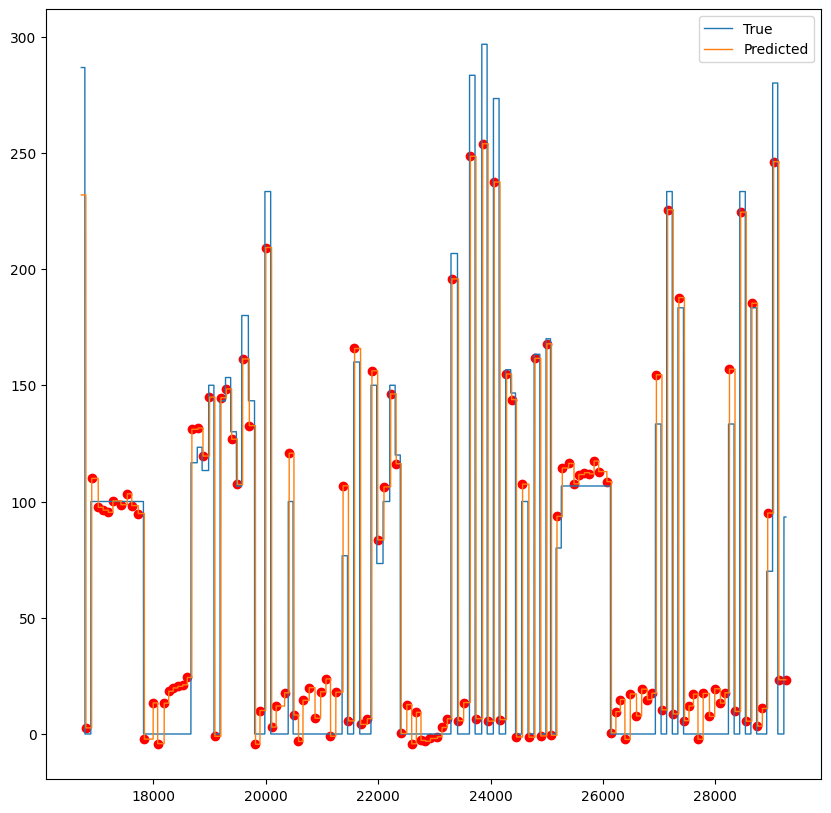

In [91]:
plt.figure(figsize=(10,10))
plt.plot(x1_test['Time'].values, y_meth_test.values, label = "True", linewidth=1)
plt.plot(x1_test['Time'].values, smoothed_predictions_meth_lr_fe, label = "Predicted", linewidth=1)
plt.scatter(x1_test['Time'].iloc[predicted_bkps], smoothed_predictions_meth_lr_fe[predicted_bkps], c = "red")
plt.legend()

In [90]:
get_main_metrics(y_meth_test,smoothed_predictions_meth_lr_fe)

(47.16941545702286,
 0.7448142027829854,
 0.15899624315577193,
 4.818203837661744e+16,
 20.535710023217412)

In [92]:
# Smooth the averages between the change points
smoothed_predictions_meth_lr_fe = []
prev_bkp = 0
for i in range(len(predicted_bkps)):
    next_bkp = predicted_bkps[i]
    # print(next_bkp, prev_bkp)
    centered_val = np.median(predicted_vals_lr_meth_fe[prev_bkp:next_bkp])
    # print(centered_val)
    smoothed_predictions_meth_lr_fe += [centered_val] * (next_bkp - prev_bkp)
    prev_bkp = next_bkp
smoothed_predictions_meth_lr_fe += [centered_val]
smoothed_predictions_meth_lr_fe = np.array(smoothed_predictions_meth_lr_fe)

In [93]:
get_main_metrics(y_meth_test,smoothed_predictions_meth_lr_fe)

(47.32729368969871,
 0.7473071306445654,
 0.15952841099436652,
 4.6509378999965e+16,
 19.986077345695158)

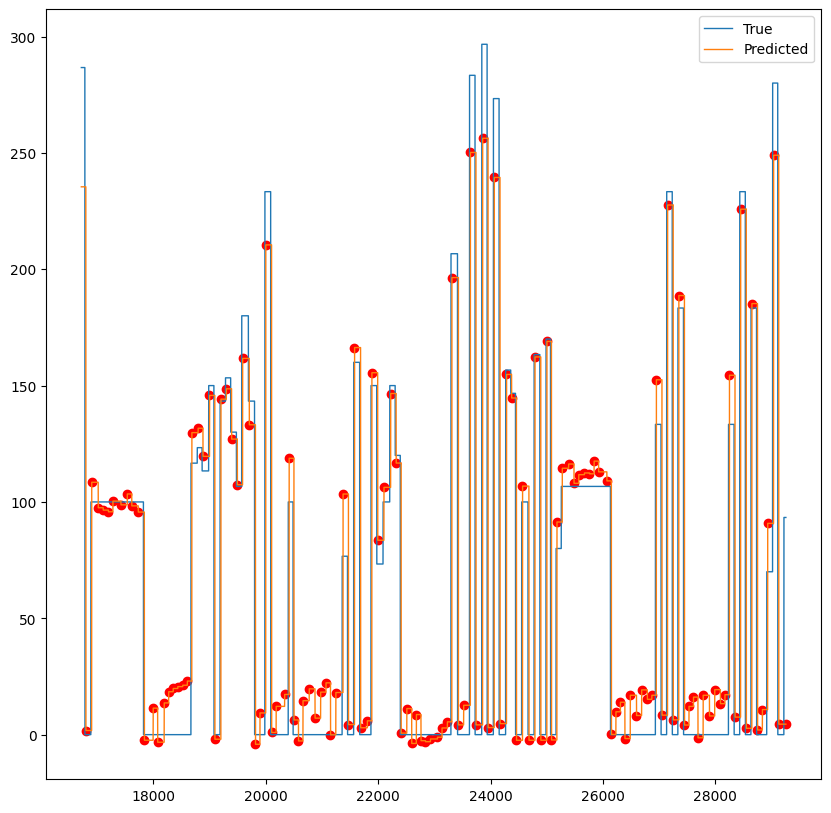

In [94]:
plt.figure(figsize=(10,10))
plt.plot(x1_test['Time'].values, y_meth_test.values, label = "True", linewidth=1)
plt.plot(x1_test['Time'].values, smoothed_predictions_meth_lr_fe, label = "Predicted", linewidth=1)
plt.scatter(x1_test['Time'].iloc[predicted_bkps], smoothed_predictions_meth_lr_fe[predicted_bkps], c = "red")
plt.legend()

In [134]:
model = "l2"  # "l2", "rbf"
algo = rpt.Pelt(model = model, min_size = 8 * 1000, jump = 20).fit(predicted_vals_lr_meth_fe)
my_bkps = algo.predict(pen=3)


In [135]:
predicted_bkps = list(np.array(my_bkps) - 1)

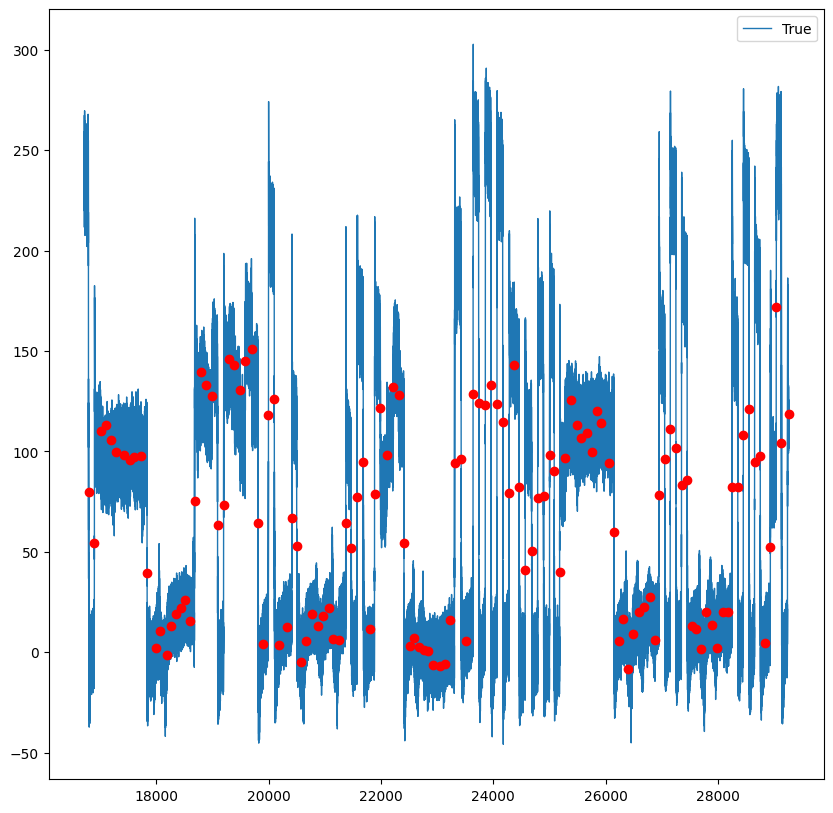

In [136]:
# Plot the change points
# Plot the change points
plt.figure(figsize=(10,10))
plt.plot(x1_test['Time'].values, predicted_vals_lr_meth_fe, label = "True", linewidth=1, zorder = 1)
plt.scatter(x1_test['Time'].iloc[predicted_bkps], predicted_vals_lr_meth_fe[predicted_bkps], c = "red", zorder = 2)
plt.legend()

In [155]:
# Smooth the averages between the change points
smoothed_predictions_meth_lr_fe = []
prev_bkp = 0
for i in range(len(predicted_bkps)):
    next_bkp = predicted_bkps[i]
    # print(next_bkp, prev_bkp)
    centered_val = np.mean(predicted_vals_lr_meth_fe[prev_bkp:next_bkp])
    # print(centered_val)
    smoothed_predictions_meth_lr_fe += [centered_val] * (next_bkp - prev_bkp)
    prev_bkp = next_bkp
smoothed_predictions_meth_lr_fe += [centered_val]
smoothed_predictions_meth_lr_fe = np.array(smoothed_predictions_meth_lr_fe)

In [167]:
# Smooth the averages between the change points
smoothed_predictions_meth_lr_fe = []
prev_bkp = 0
for i in range(len(predicted_bkps)):
    next_bkp = predicted_bkps[i]
    # print(next_bkp, prev_bkp)
    centered_val = np.mean(predicted_vals_lr_meth_fe[prev_bkp:next_bkp])
    if centered_val > 200:
        centered_val = np.max(predicted_vals_lr_meth_fe[prev_bkp:next_bkp])
    elif centered_val > 30:
        centered_val = centered_val
    else:
        centered_val = 0
    # print(centered_val)
    smoothed_predictions_meth_lr_fe += list(predicted_vals_lr_meth_fe[prev_bkp:prev_bkp + 10]) + [centered_val] * (next_bkp - prev_bkp - 20) + list(predicted_vals_lr_meth_fe[next_bkp - 10:next_bkp])
    prev_bkp = next_bkp
smoothed_predictions_meth_lr_fe += [centered_val]
smoothed_predictions_meth_lr_fe = np.array(smoothed_predictions_meth_lr_fe)

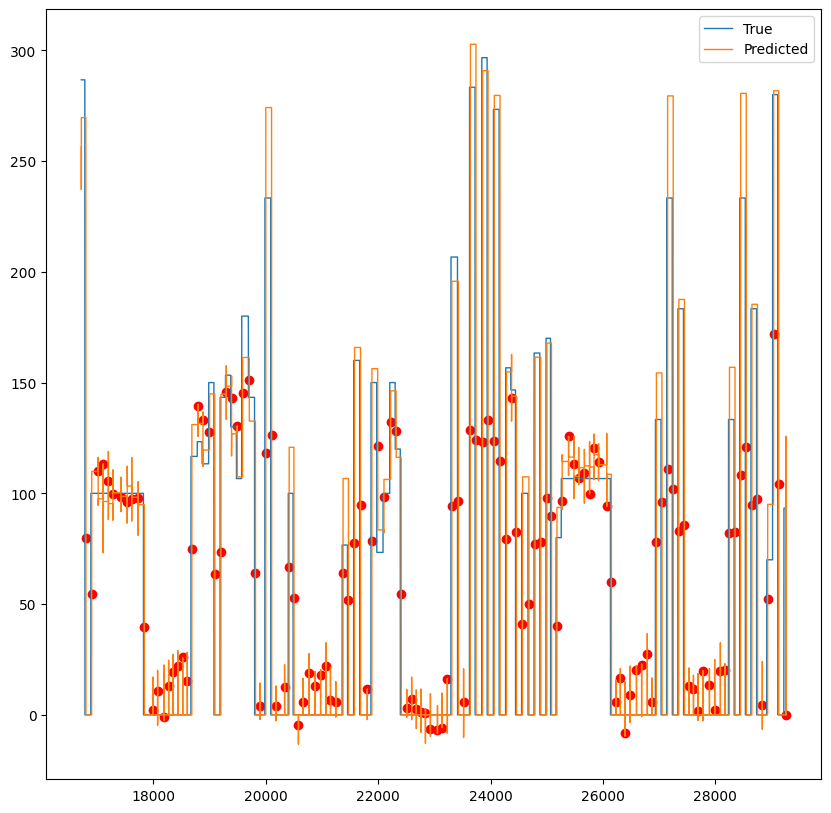

In [168]:
plt.figure(figsize=(10,10))
plt.plot(x1_test['Time'].values, y_meth_test.values, label = "True", linewidth=1)
plt.plot(x1_test['Time'].values, smoothed_predictions_meth_lr_fe, label = "Predicted", linewidth=1)
plt.scatter(x1_test['Time'].iloc[predicted_bkps], smoothed_predictions_meth_lr_fe[predicted_bkps], c = "red")
plt.legend()

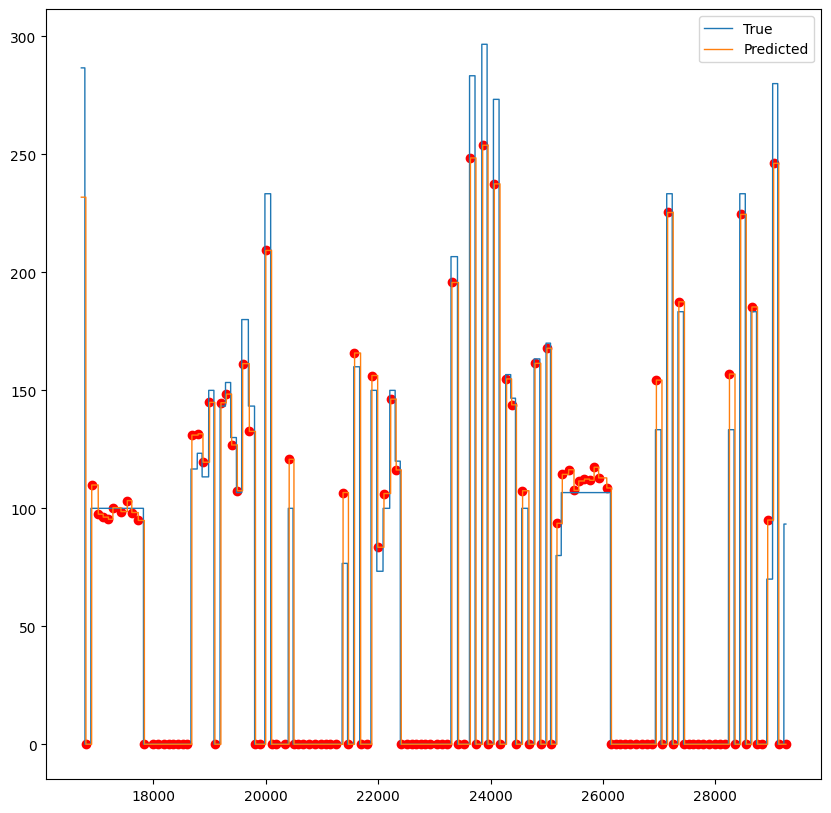

In [154]:
plt.figure(figsize=(10,10))
plt.plot(x1_test['Time'].values, y_meth_test.values, label = "True", linewidth=1)
plt.plot(x1_test['Time'].values, smoothed_predictions_meth_lr_fe, label = "Predicted", linewidth=1)
plt.scatter(x1_test['Time'].iloc[predicted_bkps], smoothed_predictions_meth_lr_fe[predicted_bkps], c = "red")
plt.legend()

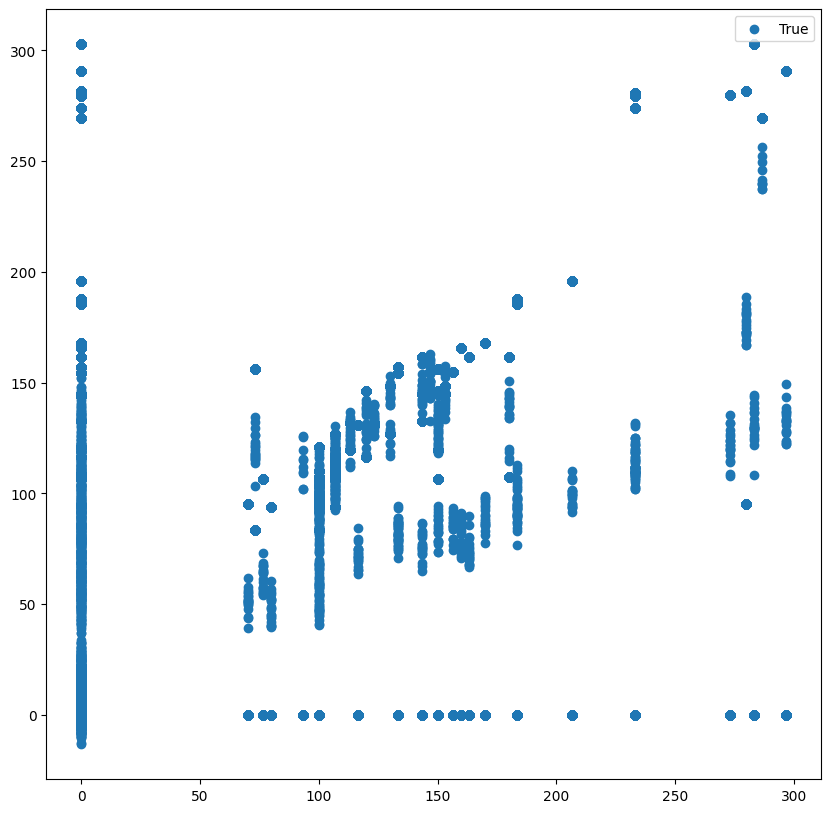

In [169]:
plt.figure(figsize=(10,10))
plt.scatter(y_meth_test.values, smoothed_predictions_meth_lr_fe, label = "True", linewidth=1)
plt.legend()

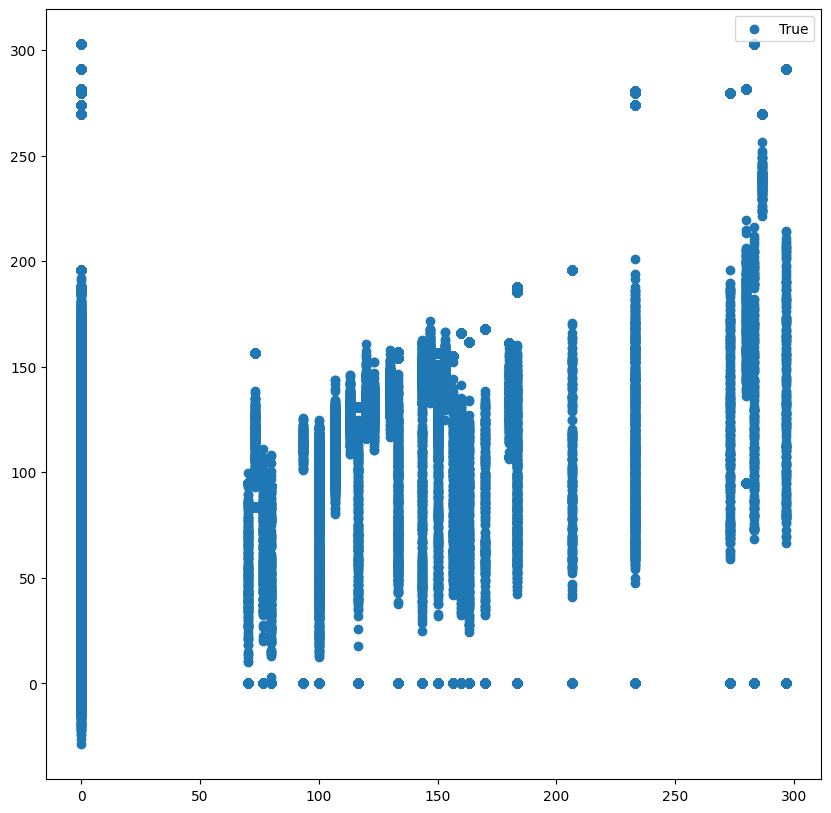

In [166]:
plt.figure(figsize=(10,10))
plt.scatter(y_meth_test.values, smoothed_predictions_meth_lr_fe, label = "True", linewidth=1)
plt.legend()

In [151]:
get_main_metrics(y_meth_test,smoothed_predictions_meth_lr_fe)

(47.16151663020255,
 0.7446894787781597,
 0.1589696181959839,
 4.818044547844156e+16,
 20.530128159026173)

In [147]:
get_main_metrics(y_meth_test,smoothed_predictions_meth_lr_fe)

(47.3571536582496,
 0.7477786253293282,
 0.1596290614428476,
 2.6175561836155852e+16,
 15.963896654074514)

In [170]:
get_main_metrics(y_meth_test,smoothed_predictions_meth_lr_fe)

(49.89122951166298,
 0.7877921736903709,
 0.16817079418769332,
 2.850961789665836e+16,
 16.185816447996842)

# Run DecisionTreeRegressor

In [157]:
dtr_meth = DecisionTreeRegressor(criterion = "squared_error", max_depth = 7, max_features = 3)
dtr_meth.fit(x_meth_fe_train, y_meth_train.values)
dtr_predictions = dtr_meth.predict(x_meth_fe_test)
dtr_metrics = get_main_metrics(y_meth_test.values, dtr_predictions)
print(dtr_metrics)

(52.22704931493621, 0.8246752206343125, 0.17604425562050832, 5.236055611764981e+16, 25.3275442218316)


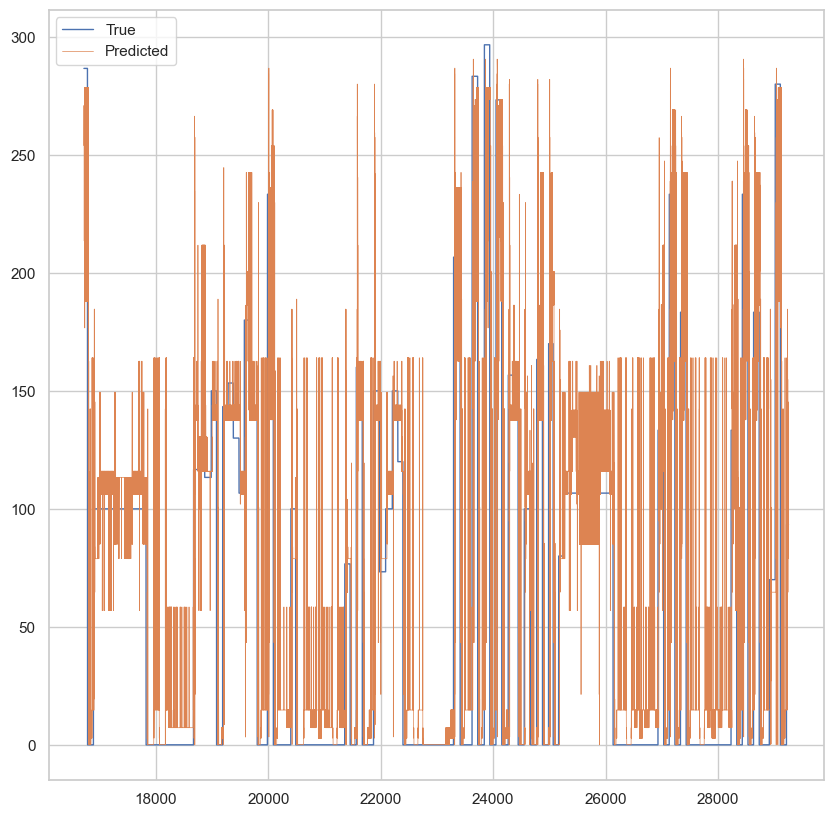

In [155]:
plt.figure(figsize=(10,10))
plt.plot(x1_test['Time'].values, y_meth_test.values, label = "True", linewidth=1)
plt.plot(x1_test['Time'].values, dtr_predictions, label = "Predicted",linewidth=0.5)
plt.legend()

In [153]:
dtr_meth = DecisionTreeRegressor(criterion = "squared_error", max_depth = 7, max_features = 3)
dtr_meth.fit(x_meth_train_preprocessed, y_meth_train.values)
dtr_predictions = dtr_meth.predict(x_meth_test_preprocessed)
dtr_metrics = get_main_metrics(y_meth_test.values, dtr_predictions)

KeyboardInterrupt: 

# Run RandomForest

In [115]:
rfr_meth = RandomForestRegressor(n_estimators = 500, criterion = "squared_error", n_jobs = -1, max_depth = 7, max_features = 3, verbose = 10)
rfr_meth.fit(x_meth_train_preprocessed, y_meth_train.values)
rfr_predictions = rfr_meth.predict(x_meth_test_preprocessed)
rfr_metrics = get_main_metrics(y_meth_test.values, rfr_predictions)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   16.0s


building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   21.3s


building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   50.6s


building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  1.2min


building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
building tree 43 of 500
building tree 44 of 500
building tree 45 of 500
building tree 46 of 500
building tree 47 of 500
building tree 48 of 500
building tree 49 of 500


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.8min


building tree 50 of 500
building tree 51 of 500
building tree 52 of 500
building tree 53 of 500
building tree 54 of 500
building tree 55 of 500
building tree 56 of 500
building tree 57 of 500
building tree 58 of 500
building tree 59 of 500
building tree 60 of 500


[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  2.4min


building tree 61 of 500
building tree 62 of 500
building tree 63 of 500
building tree 64 of 500
building tree 65 of 500
building tree 66 of 500
building tree 67 of 500
building tree 68 of 500
building tree 69 of 500
building tree 70 of 500
building tree 71 of 500
building tree 72 of 500
building tree 73 of 500


[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:  2.9min


building tree 74 of 500
building tree 75 of 500
building tree 76 of 500
building tree 77 of 500
building tree 78 of 500
building tree 79 of 500
building tree 80 of 500
building tree 81 of 500
building tree 82 of 500
building tree 83 of 500
building tree 84 of 500
building tree 85 of 500
building tree 86 of 500


[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:  3.6min


building tree 87 of 500
building tree 88 of 500
building tree 89 of 500
building tree 90 of 500
building tree 91 of 500
building tree 92 of 500
building tree 93 of 500
building tree 94 of 500
building tree 95 of 500
building tree 96 of 500
building tree 97 of 500
building tree 98 of 500
building tree 99 of 500
building tree 100 of 500
building tree 101 of 500


[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:  4.4min


building tree 102 of 500
building tree 103 of 500
building tree 104 of 500
building tree 105 of 500
building tree 106 of 500
building tree 107 of 500
building tree 108 of 500
building tree 109 of 500
building tree 110 of 500
building tree 111 of 500
building tree 112 of 500
building tree 113 of 500
building tree 114 of 500
building tree 115 of 500
building tree 116 of 500


[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:  5.0min


building tree 117 of 500
building tree 118 of 500
building tree 119 of 500
building tree 120 of 500
building tree 121 of 500
building tree 122 of 500
building tree 123 of 500
building tree 124 of 500
building tree 125 of 500
building tree 126 of 500
building tree 127 of 500
building tree 128 of 500
building tree 129 of 500
building tree 130 of 500
building tree 131 of 500
building tree 132 of 500
building tree 133 of 500
building tree 134 of 500


[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:  5.9min


building tree 135 of 500
building tree 136 of 500
building tree 137 of 500
building tree 138 of 500
building tree 139 of 500
building tree 140 of 500
building tree 141 of 500
building tree 142 of 500
building tree 143 of 500
building tree 144 of 500
building tree 145 of 500
building tree 146 of 500
building tree 147 of 500
building tree 148 of 500
building tree 149 of 500
building tree 150 of 500


[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  6.7min


building tree 151 of 500
building tree 152 of 500
building tree 153 of 500
building tree 154 of 500
building tree 155 of 500
building tree 156 of 500
building tree 157 of 500
building tree 158 of 500
building tree 159 of 500
building tree 160 of 500
building tree 161 of 500
building tree 162 of 500
building tree 163 of 500
building tree 164 of 500
building tree 165 of 500
building tree 166 of 500
building tree 167 of 500
building tree 168 of 500
building tree 169 of 500


[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:  7.6min


building tree 170 of 500
building tree 171 of 500
building tree 172 of 500
building tree 173 of 500
building tree 174 of 500
building tree 175 of 500
building tree 176 of 500
building tree 177 of 500
building tree 178 of 500
building tree 179 of 500
building tree 180 of 500
building tree 181 of 500
building tree 182 of 500
building tree 183 of 500
building tree 184 of 500
building tree 185 of 500
building tree 186 of 500
building tree 187 of 500
building tree 188 of 500


[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  8.6min


building tree 189 of 500
building tree 190 of 500
building tree 191 of 500
building tree 192 of 500
building tree 193 of 500
building tree 194 of 500
building tree 195 of 500
building tree 196 of 500
building tree 197 of 500
building tree 198 of 500
building tree 199 of 500
building tree 200 of 500
building tree 201 of 500
building tree 202 of 500
building tree 203 of 500
building tree 204 of 500
building tree 205 of 500
building tree 206 of 500
building tree 207 of 500
building tree 208 of 500
building tree 209 of 500
building tree 210 of 500


[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:  9.6min


building tree 211 of 500
building tree 212 of 500
building tree 213 of 500
building tree 214 of 500
building tree 215 of 500
building tree 216 of 500
building tree 217 of 500
building tree 218 of 500
building tree 219 of 500
building tree 220 of 500
building tree 221 of 500
building tree 222 of 500
building tree 223 of 500
building tree 224 of 500
building tree 225 of 500
building tree 226 of 500
building tree 227 of 500
building tree 228 of 500
building tree 229 of 500
building tree 230 of 500


[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed: 10.6min


building tree 231 of 500
building tree 232 of 500
building tree 233 of 500
building tree 234 of 500
building tree 235 of 500
building tree 236 of 500
building tree 237 of 500
building tree 238 of 500
building tree 239 of 500
building tree 240 of 500
building tree 241 of 500
building tree 242 of 500
building tree 243 of 500
building tree 244 of 500
building tree 245 of 500
building tree 246 of 500
building tree 247 of 500
building tree 248 of 500
building tree 249 of 500
building tree 250 of 500
building tree 251 of 500
building tree 252 of 500
building tree 253 of 500


[Parallel(n_jobs=-1)]: Done 241 tasks      | elapsed: 11.6min


building tree 254 of 500
building tree 255 of 500
building tree 256 of 500
building tree 257 of 500
building tree 258 of 500
building tree 259 of 500
building tree 260 of 500
building tree 261 of 500
building tree 262 of 500
building tree 263 of 500
building tree 264 of 500
building tree 265 of 500
building tree 266 of 500
building tree 267 of 500
building tree 268 of 500
building tree 269 of 500
building tree 270 of 500
building tree 271 of 500
building tree 272 of 500
building tree 273 of 500
building tree 274 of 500
building tree 275 of 500
building tree 276 of 500


[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed: 12.8min


building tree 277 of 500
building tree 278 of 500
building tree 279 of 500
building tree 280 of 500
building tree 281 of 500
building tree 282 of 500
building tree 283 of 500
building tree 284 of 500
building tree 285 of 500
building tree 286 of 500
building tree 287 of 500
building tree 288 of 500
building tree 289 of 500
building tree 290 of 500
building tree 291 of 500
building tree 292 of 500
building tree 293 of 500
building tree 294 of 500
building tree 295 of 500
building tree 296 of 500
building tree 297 of 500
building tree 298 of 500
building tree 299 of 500
building tree 300 of 500
building tree 301 of 500


[Parallel(n_jobs=-1)]: Done 289 tasks      | elapsed: 14.2min


building tree 302 of 500
building tree 303 of 500
building tree 304 of 500
building tree 305 of 500
building tree 306 of 500
building tree 307 of 500
building tree 308 of 500
building tree 309 of 500
building tree 310 of 500
building tree 311 of 500
building tree 312 of 500
building tree 313 of 500
building tree 314 of 500
building tree 315 of 500
building tree 316 of 500
building tree 317 of 500
building tree 318 of 500
building tree 319 of 500
building tree 320 of 500
building tree 321 of 500
building tree 322 of 500
building tree 323 of 500
building tree 324 of 500
building tree 325 of 500
building tree 326 of 500


[Parallel(n_jobs=-1)]: Done 314 tasks      | elapsed: 15.5min


building tree 327 of 500
building tree 328 of 500
building tree 329 of 500
building tree 330 of 500
building tree 331 of 500
building tree 332 of 500
building tree 333 of 500
building tree 334 of 500
building tree 335 of 500
building tree 336 of 500
building tree 337 of 500
building tree 338 of 500
building tree 339 of 500
building tree 340 of 500
building tree 341 of 500
building tree 342 of 500
building tree 343 of 500
building tree 344 of 500
building tree 345 of 500
building tree 346 of 500
building tree 347 of 500
building tree 348 of 500
building tree 349 of 500
building tree 350 of 500
building tree 351 of 500
building tree 352 of 500
building tree 353 of 500


[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed: 16.7min


building tree 354 of 500
building tree 355 of 500
building tree 356 of 500
building tree 357 of 500
building tree 358 of 500
building tree 359 of 500
building tree 360 of 500
building tree 361 of 500
building tree 362 of 500building tree 363 of 500

building tree 364 of 500
building tree 365 of 500
building tree 366 of 500
building tree 367 of 500
building tree 368 of 500
building tree 369 of 500
building tree 370 of 500
building tree 371 of 500
building tree 372 of 500
building tree 373 of 500
building tree 374 of 500
building tree 375 of 500
building tree 376 of 500
building tree 377 of 500
building tree 378 of 500
building tree 379 of 500
building tree 380 of 500


[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed: 17.9min


building tree 381 of 500
building tree 382 of 500
building tree 383 of 500
building tree 384 of 500
building tree 385 of 500
building tree 386 of 500
building tree 387 of 500
building tree 388 of 500
building tree 389 of 500
building tree 390 of 500
building tree 391 of 500
building tree 392 of 500
building tree 393 of 500
building tree 394 of 500
building tree 395 of 500
building tree 396 of 500
building tree 397 of 500
building tree 398 of 500
building tree 399 of 500
building tree 400 of 500
building tree 401 of 500
building tree 402 of 500
building tree 403 of 500
building tree 404 of 500
building tree 405 of 500
building tree 406 of 500
building tree 407 of 500
building tree 408 of 500
building tree 409 of 500


[Parallel(n_jobs=-1)]: Done 397 tasks      | elapsed: 19.1min


building tree 410 of 500
building tree 411 of 500
building tree 412 of 500
building tree 413 of 500
building tree 414 of 500
building tree 415 of 500
building tree 416 of 500
building tree 417 of 500
building tree 418 of 500
building tree 419 of 500
building tree 420 of 500
building tree 421 of 500
building tree 422 of 500
building tree 423 of 500
building tree 424 of 500
building tree 425 of 500
building tree 426 of 500
building tree 427 of 500
building tree 428 of 500
building tree 429 of 500
building tree 430 of 500
building tree 431 of 500
building tree 432 of 500
building tree 433 of 500
building tree 434 of 500
building tree 435 of 500
building tree 436 of 500
building tree 437 of 500
building tree 438 of 500


[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed: 20.3min


building tree 439 of 500
building tree 440 of 500
building tree 441 of 500
building tree 442 of 500
building tree 443 of 500
building tree 444 of 500
building tree 445 of 500
building tree 446 of 500
building tree 447 of 500
building tree 448 of 500
building tree 449 of 500
building tree 450 of 500
building tree 451 of 500
building tree 452 of 500
building tree 453 of 500
building tree 454 of 500
building tree 455 of 500
building tree 456 of 500
building tree 457 of 500
building tree 458 of 500
building tree 459 of 500
building tree 460 of 500
building tree 461 of 500
building tree 462 of 500
building tree 463 of 500
building tree 464 of 500
building tree 465 of 500
building tree 466 of 500
building tree 467 of 500
building tree 468 of 500
building tree 469 of 500


[Parallel(n_jobs=-1)]: Done 457 tasks      | elapsed: 21.6min


building tree 470 of 500
building tree 471 of 500
building tree 472 of 500
building tree 473 of 500
building tree 474 of 500
building tree 475 of 500
building tree 476 of 500
building tree 477 of 500
building tree 478 of 500
building tree 479 of 500
building tree 480 of 500
building tree 481 of 500
building tree 482 of 500
building tree 483 of 500
building tree 484 of 500
building tree 485 of 500
building tree 486 of 500
building tree 487 of 500
building tree 488 of 500
building tree 489 of 500
building tree 490 of 500
building tree 491 of 500
building tree 492 of 500
building tree 493 of 500
building tree 494 of 500
building tree 495 of 500
building tree 496 of 500
building tree 497 of 500
building tree 498 of 500
building tree 499 of 500
building tree 500 of 500


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 23.3min finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  37 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  48 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  61 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done  74 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done  89 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 104 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 121 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 157 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 176 tasks    

In [118]:
rfr_predictions_train = rfr_meth.predict(x_meth_train_preprocessed)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done  37 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done  48 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done  61 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done  74 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done  89 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 104 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 121 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 157 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 197 tasks      | elaps

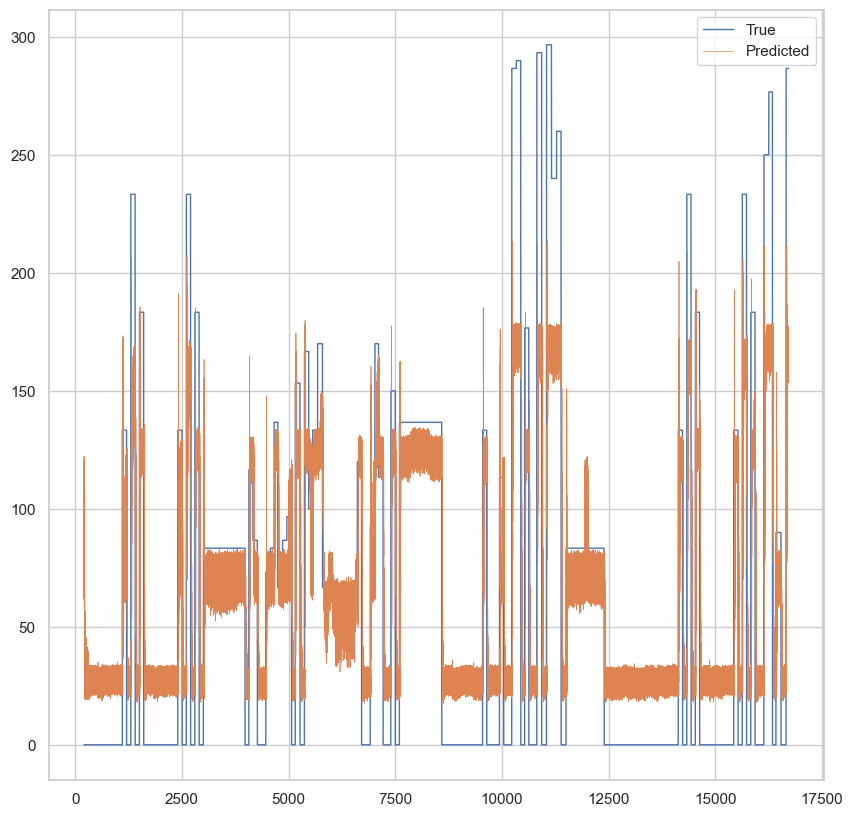

In [120]:
plt.figure(figsize=(10,10))
plt.plot(x1_train['Time'].values, y_meth_train.values, label = "True", linewidth=1)
plt.plot(x1_train['Time'].values, rfr_predictions_train, label = "Predicted",linewidth=0.5)
plt.legend()

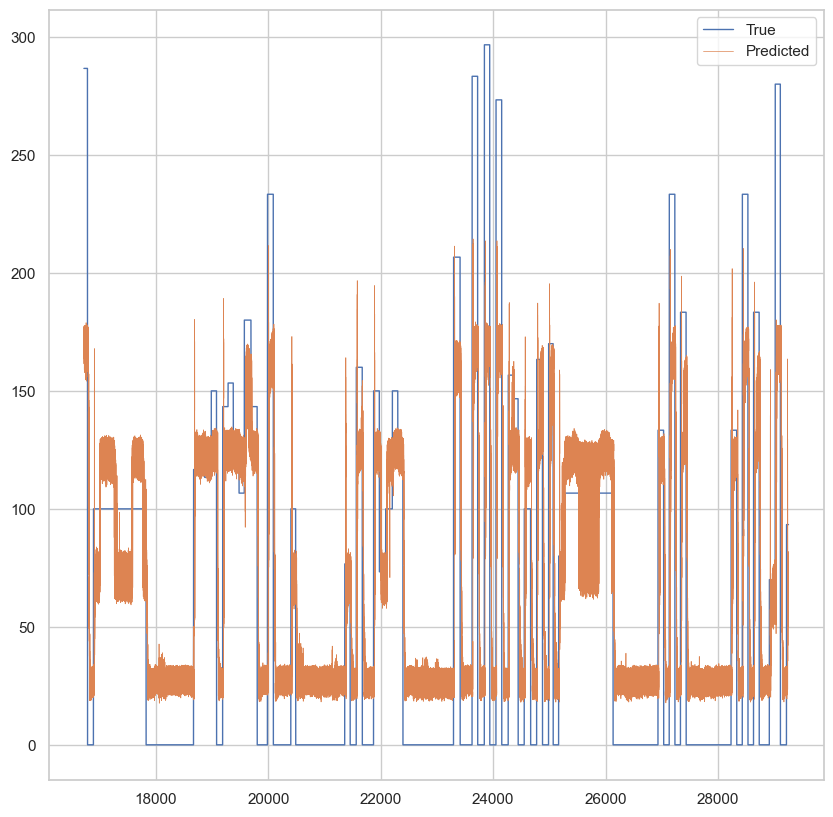

In [117]:
plt.figure(figsize=(10,10))
plt.plot(x1_test['Time'].values, y_meth_test.values, label = "True", linewidth=1)
plt.plot(x1_test['Time'].values, rfr_predictions, label = "Predicted",linewidth=0.5)
plt.legend()

In [116]:
print(rfr_metrics)

(52.46862969146003, 0.8284898215532606, 0.17685856234691755, 8.948956319373267e+16, 37.58344017619922)


# Run Linear SVR

In [39]:
linear_svr_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'epsilon': [0, 0.1, 1],
    'verbose': [10],
}

In [138]:
optim_lsvr_meth = optimize_halving_model(LinearSVR(), linear_svr_param_grid, "neg_root_mean_squared_error", True, 5, 10, -1, x_meth_train_preprocessed, y_meth_train, x_meth_test_preprocessed, y_meth_test)
print(optim_lsvr_meth[3])
model_collections["optim_lsvr_meth"] = optim_lsvr_meth

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 183489
max_resources_: 1651401
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 15
n_resources: 183489
Fitting 5 folds for each of 15 candidates, totalling 75 fits
----------
iter: 1
n_candidates: 5
n_resources: 550467
Fitting 5 folds for each of 5 candidates, totalling 25 fits
----------
iter: 2
n_candidates: 2
n_resources: 1651401
Fitting 5 folds for each of 2 candidates, totalling 10 fits


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[LibLinear]

c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


(54.9781119232037, 0.8681150318664392, 0.1853173961748869, 6.01547193410915e+16, 30.630394177735514)


In [139]:
print(optim_lsvr_meth[3:])

((54.9781119232037, 0.8681150318664392, 0.1853173961748869, 6.01547193410915e+16, 30.630394177735514), {'C': 100, 'epsilon': 1, 'verbose': 10}, -52.46407147336954)


In [60]:
joblib.dump(optim_lsvr_meth, "models/best_meth_poly_lsvr.pkl")

['models/best_meth_poly_lsvr.pkl']

In [61]:
optim_lsvr_ethy = optimize_halving_model(LinearSVR(), linear_svr_param_grid, "neg_root_mean_squared_error", True, 5, 10, -1, x_ethy_train_preprocessed, y_ethy_train, x_ethy_test_preprocessed, y_ethy_test)
print(optim_lsvr_ethy[3])
model_collections["optim_lsvr_ethy"] = optim_lsvr_ethy

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 185711
max_resources_: 1671401
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 15
n_resources: 185711
Fitting 5 folds for each of 15 candidates, totalling 75 fits


----------
iter: 1
n_candidates: 5
n_resources: 557133
Fitting 5 folds for each of 5 candidates, totalling 25 fits


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


----------
iter: 2
n_candidates: 2
n_resources: 1671399
Fitting 5 folds for each of 2 candidates, totalling 10 fits


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[LibLinear]

c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


(4.196439103847411, 0.9038487631373393, 0.20982195519237057, 5028298057533418.0, 2.2877996199406674)


In [62]:
print(optim_lsvr_ethy[3:])

((4.196439103847411, 0.9038487631373393, 0.20982195519237057, 5028298057533418.0, 2.2877996199406674), {'C': 1, 'epsilon': 1, 'verbose': 10}, -3.8743817151725324)


In [63]:
joblib.dump(optim_lsvr_ethy, "models/best_ethy_poly_lsvr.pkl")

['models/best_ethy_poly_lsvr.pkl']

# Run Linear Regression

In [129]:
optim_lr_meth = optimize_halving_model(LinearRegression(), {}, "neg_root_mean_squared_error", True, 5, 10, -1, x_meth_train_preprocessed, y_meth_train, x_meth_test_preprocessed, y_meth_test)
print(optim_lr_meth[3])
model_collections["optim_lr_meth"] = optim_lr_meth

n_iterations: 1
n_required_iterations: 1
n_possible_iterations: 1
min_resources_: 1651401
max_resources_: 1651401
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 1
n_resources: 1651401
Fitting 5 folds for each of 1 candidates, totalling 5 fits


(54.775942995879504, 0.8649227453610094, 0.18463593553739677, 6.871447248955724e+16, 31.974474767229445)


In [130]:

joblib.dump(optim_lr_meth, "models/best_meth_poly_lr.pkl")

['models/best_meth_poly_lr.pkl']

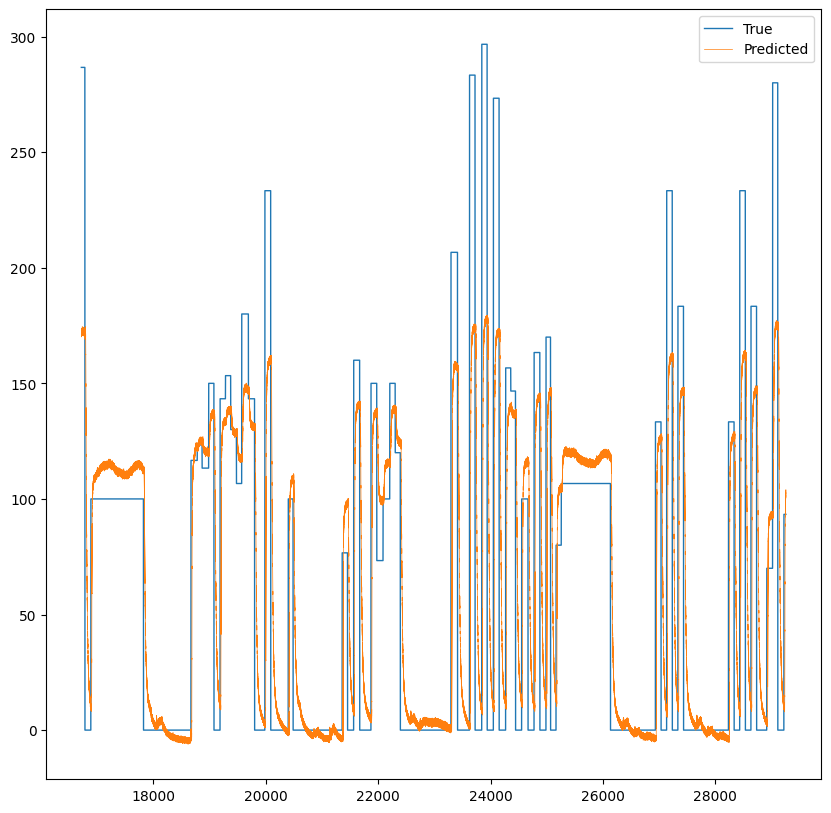

In [133]:
plt.figure(figsize=(10,10))
plt.plot(x1_test['Time'].values, y_meth_test.values, label = "True", linewidth=1)
plt.plot(x1_test['Time'].values, optim_lsvr_meth[2], label = "Predicted",linewidth=0.5)
plt.legend()

In [131]:
optim_lr_ethy = optimize_halving_model(LinearRegression(), {}, "neg_root_mean_squared_error", True, 5, 10, -1, x_ethy_train_preprocessed, y_ethy_train, x_ethy_test_preprocessed, y_ethy_test)
print(optim_lr_ethy[3])
model_collections["optim_lr_ethy"] = optim_lr_ethy

n_iterations: 1
n_required_iterations: 1
n_possible_iterations: 1
min_resources_: 1651401
max_resources_: 1651401
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 1
n_resources: 1651401
Fitting 5 folds for each of 1 candidates, totalling 5 fits


(4.0343496001284125, 0.8689371645585244, 0.20171748000642062, 5254951986246370.0, 2.692685398538889)


In [132]:

joblib.dump(optim_lr_ethy, "models/best_ethy_poly_lr.pkl")

['models/best_ethy_poly_lr.pkl']

# Run HistGradientBoostingRegressor

In [52]:
hist_gradient_boosting_param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'max_depth': [2, 3, 4, 5],
}


In [134]:
optim_hgbr_meth = optimize_halving_model(HistGradientBoostingRegressor(), hist_gradient_boosting_param_grid, "neg_root_mean_squared_error", True, 5, 10, -1, x_meth_train_preprocessed, y_meth_train, x_meth_test_preprocessed, y_meth_test)
print(optim_hgbr_meth[3])
model_collections["optim_hgbr_meth"] = optim_hgbr_meth

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 183489
max_resources_: 1651401
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 12
n_resources: 183489
Fitting 5 folds for each of 12 candidates, totalling 60 fits
----------
iter: 1
n_candidates: 4
n_resources: 550467
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 2
n_candidates: 2
n_resources: 1651401
Fitting 5 folds for each of 2 candidates, totalling 10 fits
(55.96103998344793, 0.883635656247525, 0.18863059960039077, 9.205608902309163e+16, 34.767400441972356)


In [135]:
joblib.dump(optim_hgbr_meth, "models/best_meth_poly_hgbr.pkl")

['models/best_meth_poly_hgbr.pkl']

In [136]:
optim_hgbr_ethy = optimize_halving_model(HistGradientBoostingRegressor(), hist_gradient_boosting_param_grid, "neg_root_mean_squared_error", True, 5, 10, -1, x_ethy_train_preprocessed, y_ethy_train, x_ethy_test_preprocessed, y_ethy_test)
print(optim_hgbr_ethy[3])
model_collections["optim_hgbr_ethy"] = optim_hgbr_ethy

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 183489
max_resources_: 1651401
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 12
n_resources: 183489
Fitting 5 folds for each of 12 candidates, totalling 60 fits


----------
iter: 1
n_candidates: 4
n_resources: 550467
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 2
n_candidates: 2
n_resources: 1651401
Fitting 5 folds for each of 2 candidates, totalling 10 fits
(3.976215903624636, 0.8564160559754483, 0.1988107951812318, 5358180444021673.0, 2.5959789179327277)


In [137]:
joblib.dump(optim_hgbr_ethy, "models/best_ethy_poly_hgbr.pkl")

['models/best_ethy_poly_hgbr.pkl']

# Plot Results

In [143]:
del model_collections["optim_hgbr_ethy"]
del model_collections["optim_hgbr_meth"]

C:\Users\jacob\AppData\Local\Temp\ipykernel_15976\3335752449.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(best_model_labels, rotation = 45)
C:\Users\jacob\AppData\Local\Temp\ipykernel_15976\3335752449.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(best_model_labels, rotation = 45)
C:\Users\jacob\AppData\Local\Temp\ipykernel_15976\3335752449.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(best_model_labels, rotation = 45)
C:\Users\jacob\AppData\Local\Temp\ipykernel_15976\3335752449.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(best_model_labels, rotation = 45)
C:\Users\jacob\AppData\Local\Temp\ipykernel_15976\3335752449.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(best_model_labels, rotation = 45)


Text(0.5, 1.0, 'MAE of Hypertuned Models')

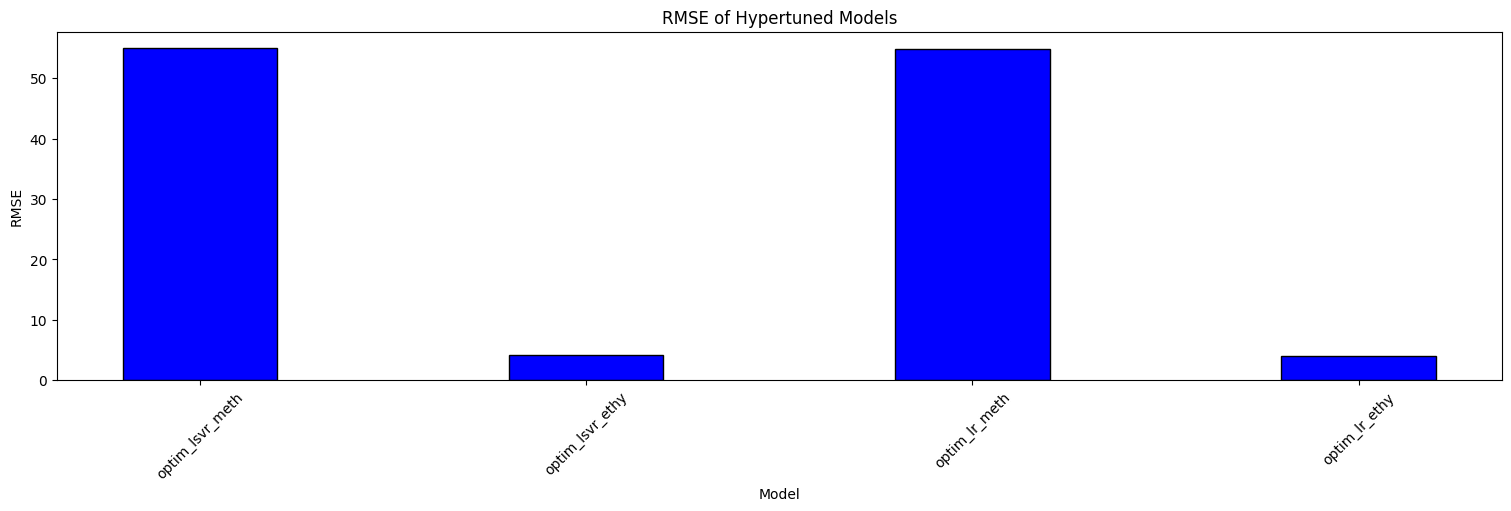

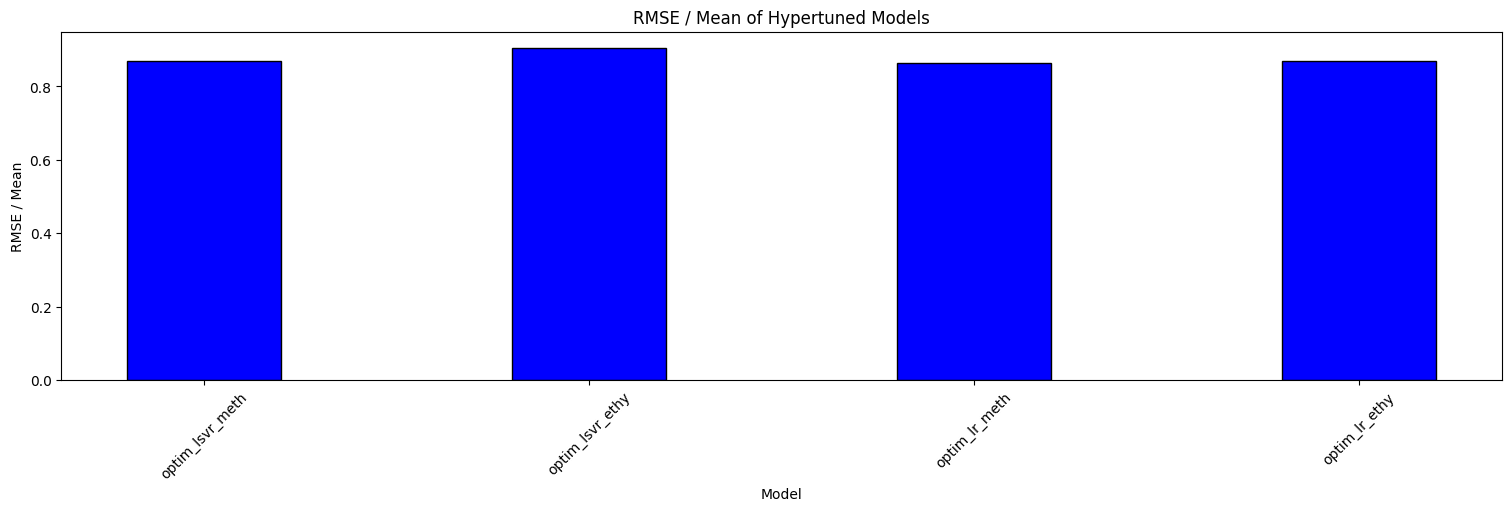

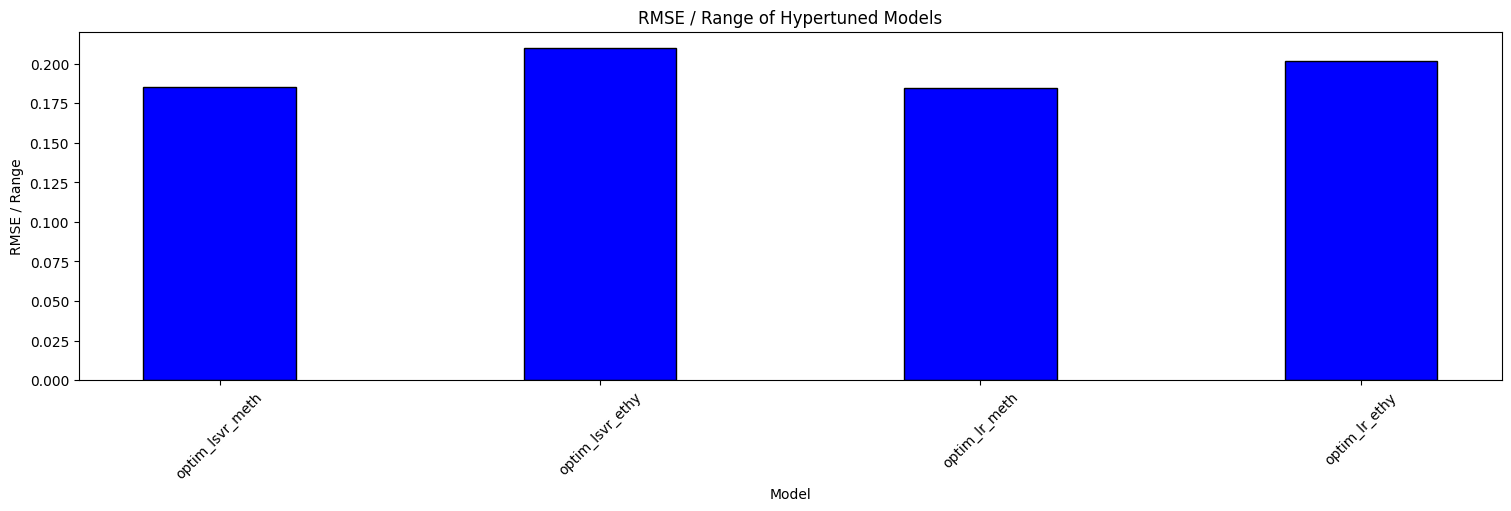

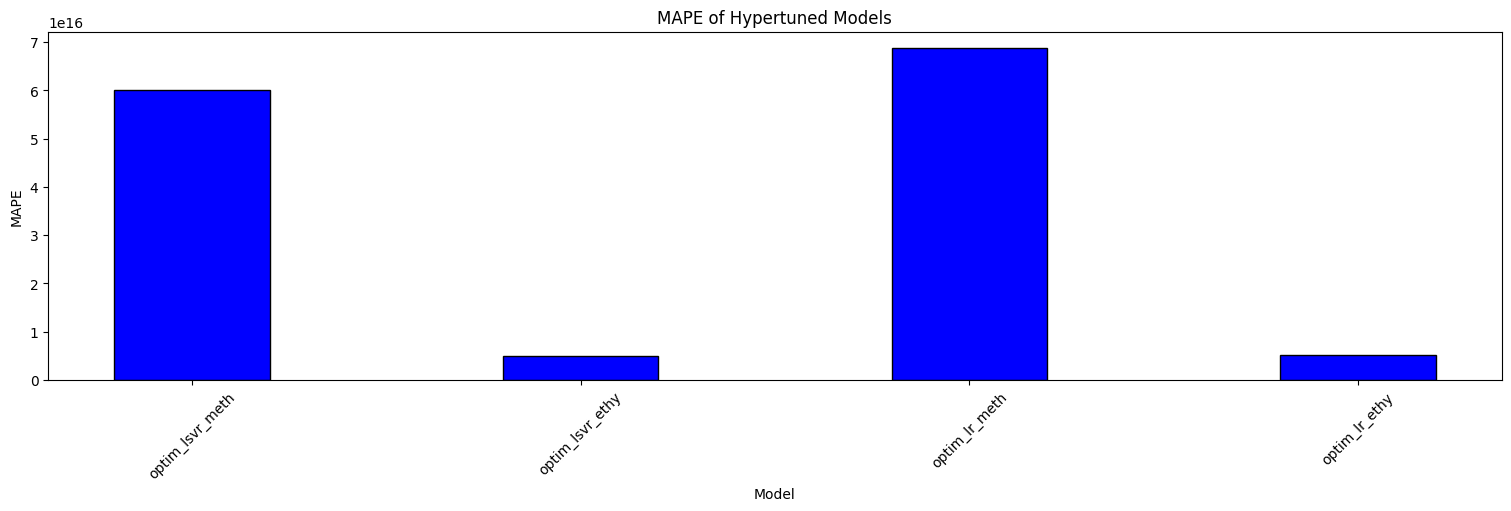

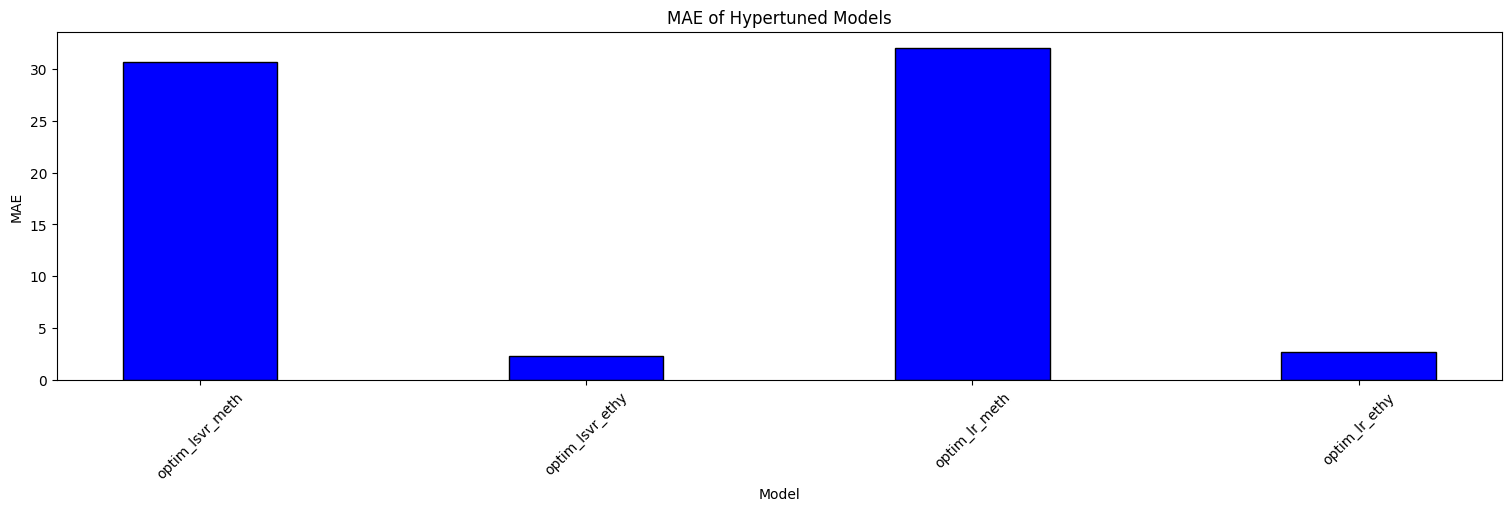

In [144]:
# Get Plots of the model data
best_model_labels = model_collections.keys()
rmses = [model_collections[label][3][0] for label in best_model_labels]

rmses_div_mean = [model_collections[label][3][1] for label in best_model_labels]
rmses_div_range = [model_collections[label][3][2] for label in best_model_labels]
mapes = [model_collections[label][3][3] for label in best_model_labels]
maes = [model_collections[label][3][4] for label in best_model_labels]

fig = plt.figure(figsize = (15, 5), layout = "constrained")
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(best_model_labels, rmses, color = 'blue', edgecolor='black', width = 0.4)
ax1.set_xticklabels(best_model_labels, rotation = 45)
ax1.set_ylabel("RMSE")
ax1.set_xlabel("Model")
ax1.set_title("RMSE of Hypertuned Models")

fig = plt.figure(figsize = (15, 5), layout = "constrained")
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(best_model_labels, rmses_div_mean, color = 'blue', edgecolor='black', width = 0.4)
ax1.set_xticklabels(best_model_labels, rotation = 45)
ax1.set_ylabel("RMSE / Mean")
ax1.set_xlabel("Model")
ax1.set_title("RMSE / Mean of Hypertuned Models")

fig = plt.figure(figsize = (15, 5), layout = "constrained")
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(best_model_labels, rmses_div_range, color = 'blue', edgecolor='black', width = 0.4)
ax1.set_xticklabels(best_model_labels, rotation = 45)
ax1.set_ylabel("RMSE / Range")
ax1.set_xlabel("Model")
ax1.set_title("RMSE / Range of Hypertuned Models")

fig = plt.figure(figsize = (15, 5), layout = "constrained")
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(best_model_labels, mapes, color = 'blue', edgecolor='black', width = 0.4)
ax1.set_xticklabels(best_model_labels, rotation = 45)
ax1.set_ylabel("MAPE")
ax1.set_xlabel("Model")
ax1.set_title("MAPE of Hypertuned Models")

fig = plt.figure(figsize = (15, 5), layout = "constrained")
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(best_model_labels, maes, color = 'blue', edgecolor='black', width = 0.4)
ax1.set_xticklabels(best_model_labels, rotation = 45)
ax1.set_ylabel("MAE")
ax1.set_xlabel("Model")
ax1.set_title("MAE of Hypertuned Models")

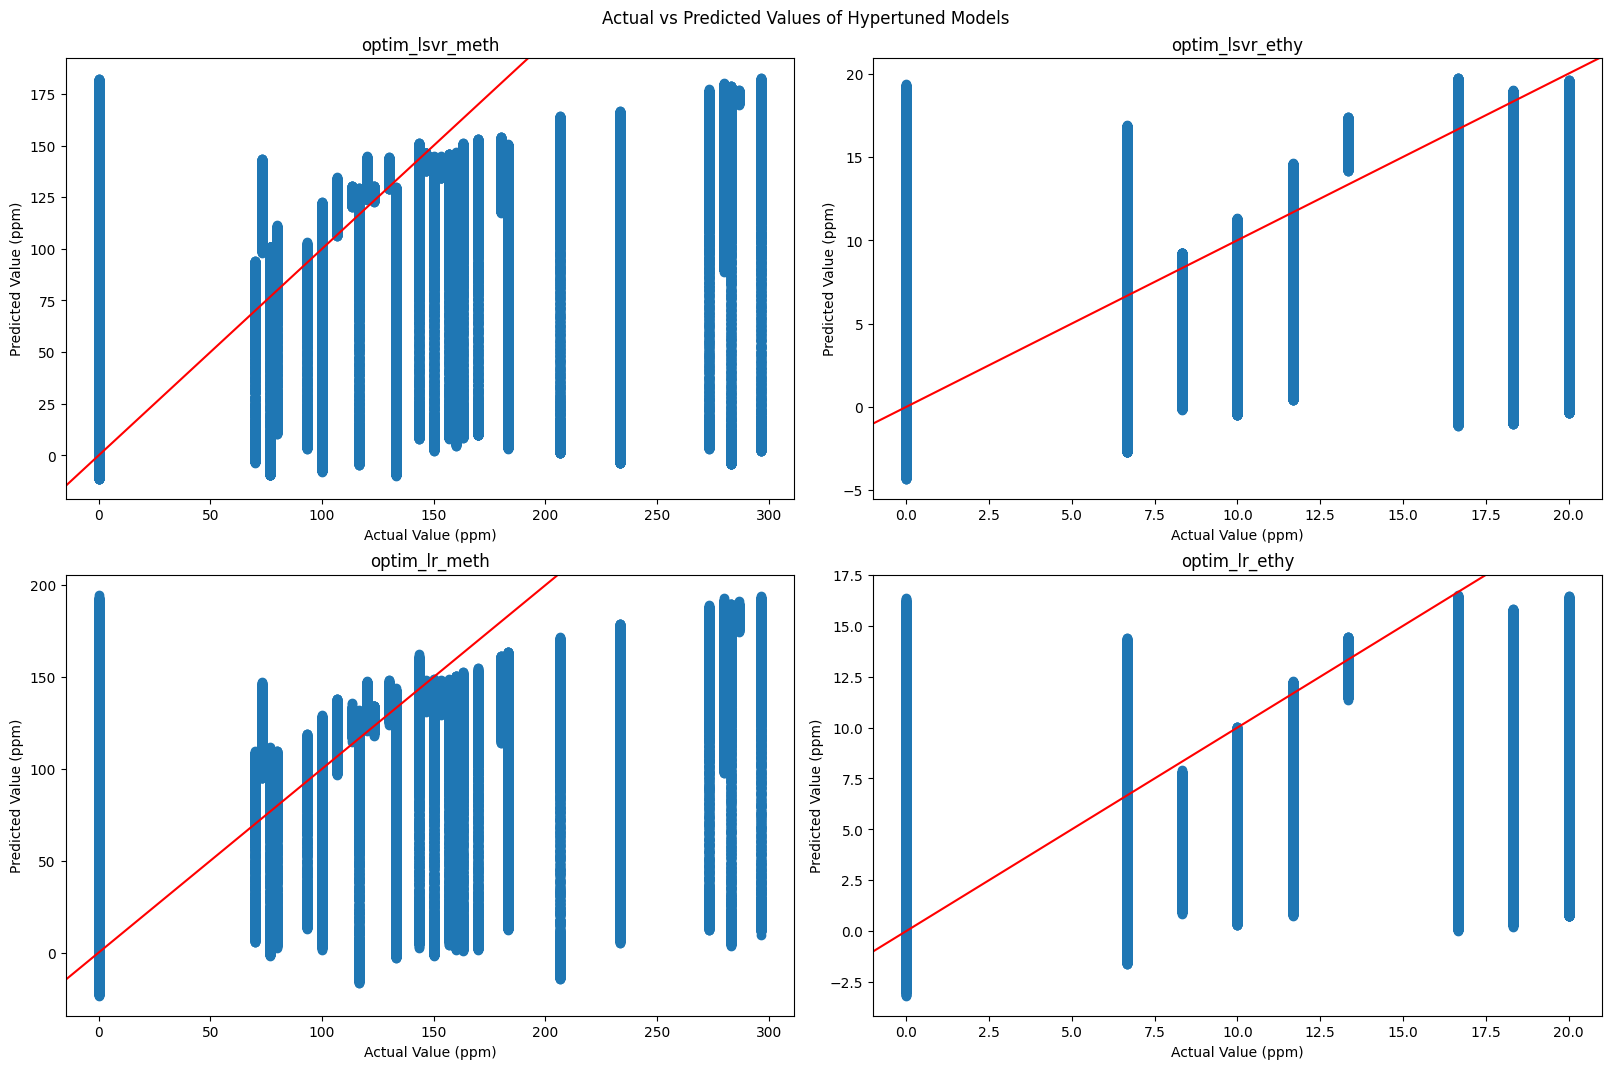

In [145]:
# Make plots of actual vs predicted values
fig = plt.figure(figsize=(16, 15), layout = "constrained")
fig.suptitle("Actual vs Predicted Values of Hypertuned Models")
for i in range(len(model_collections)):
  curr_best_model_label = list(best_model_labels)[i]
  curr_best_model = model_collections[curr_best_model_label]

  ax1 = fig.add_subplot(len(model_collections)//2 + 1, 2, i + 1)
  ax1.set_ylabel("Predicted Value (ppm)")
  ax1.set_xlabel("Actual Value (ppm)")
  ax1.title.set_text(curr_best_model_label)
  # Plot the predicted y values vs the actual y values
  ax1.scatter(curr_best_model[1], curr_best_model[2])
  # Plot the line y = x
  ax1.axline((0, 0), slope=1, color = "r")
  # Make sure that the axes are the same
  # ax1.set_aspect('equal', adjustable='box')
plt.show()

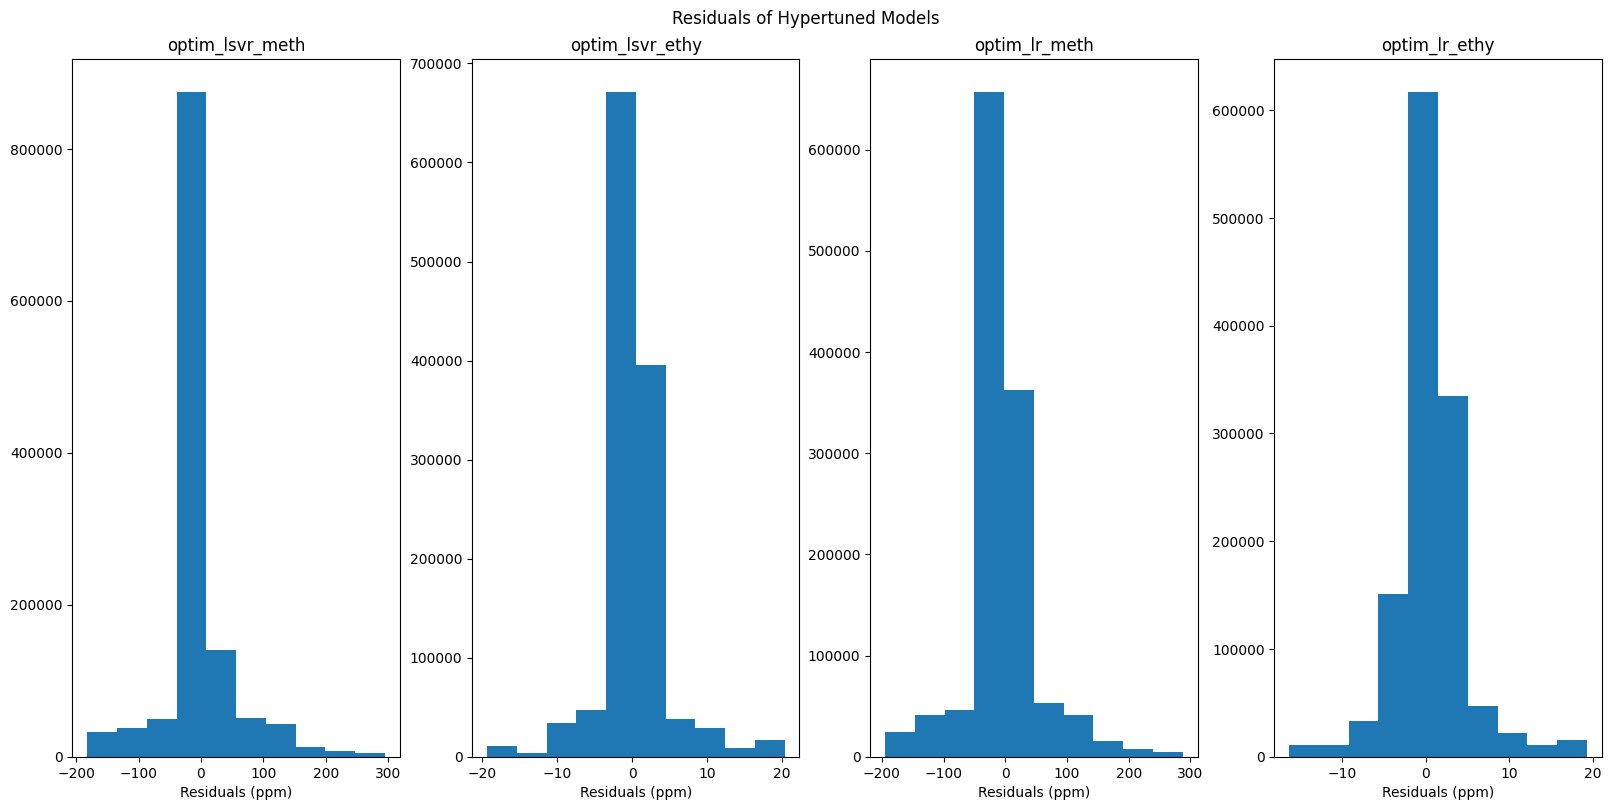

In [146]:
# Make plots of residuals values
fig = plt.figure(figsize=(16, 15), layout = "constrained")
fig.suptitle("Residuals of Hypertuned Models")
for i in range(len(model_collections)):
  curr_best_model_label = list(best_model_labels)[i]
  curr_best_model = model_collections[curr_best_model_label]
  ax1 = fig.add_subplot(len(model_collections)//4 + 1, 4, i + 1)
  ax1.set_xlabel("Residuals (ppm)")
  ax1.title.set_text(curr_best_model_label)
  # Plot the predicted y values vs the actual y values
  # print(residuals[i].shape, residuals[i])
  ax1.hist(curr_best_model[1] - curr_best_model[2])
  # Make sure that the axes are the same
  # ax1.set_aspect('equal', adjustable='box')
plt.show()

C:\Users\jacob\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


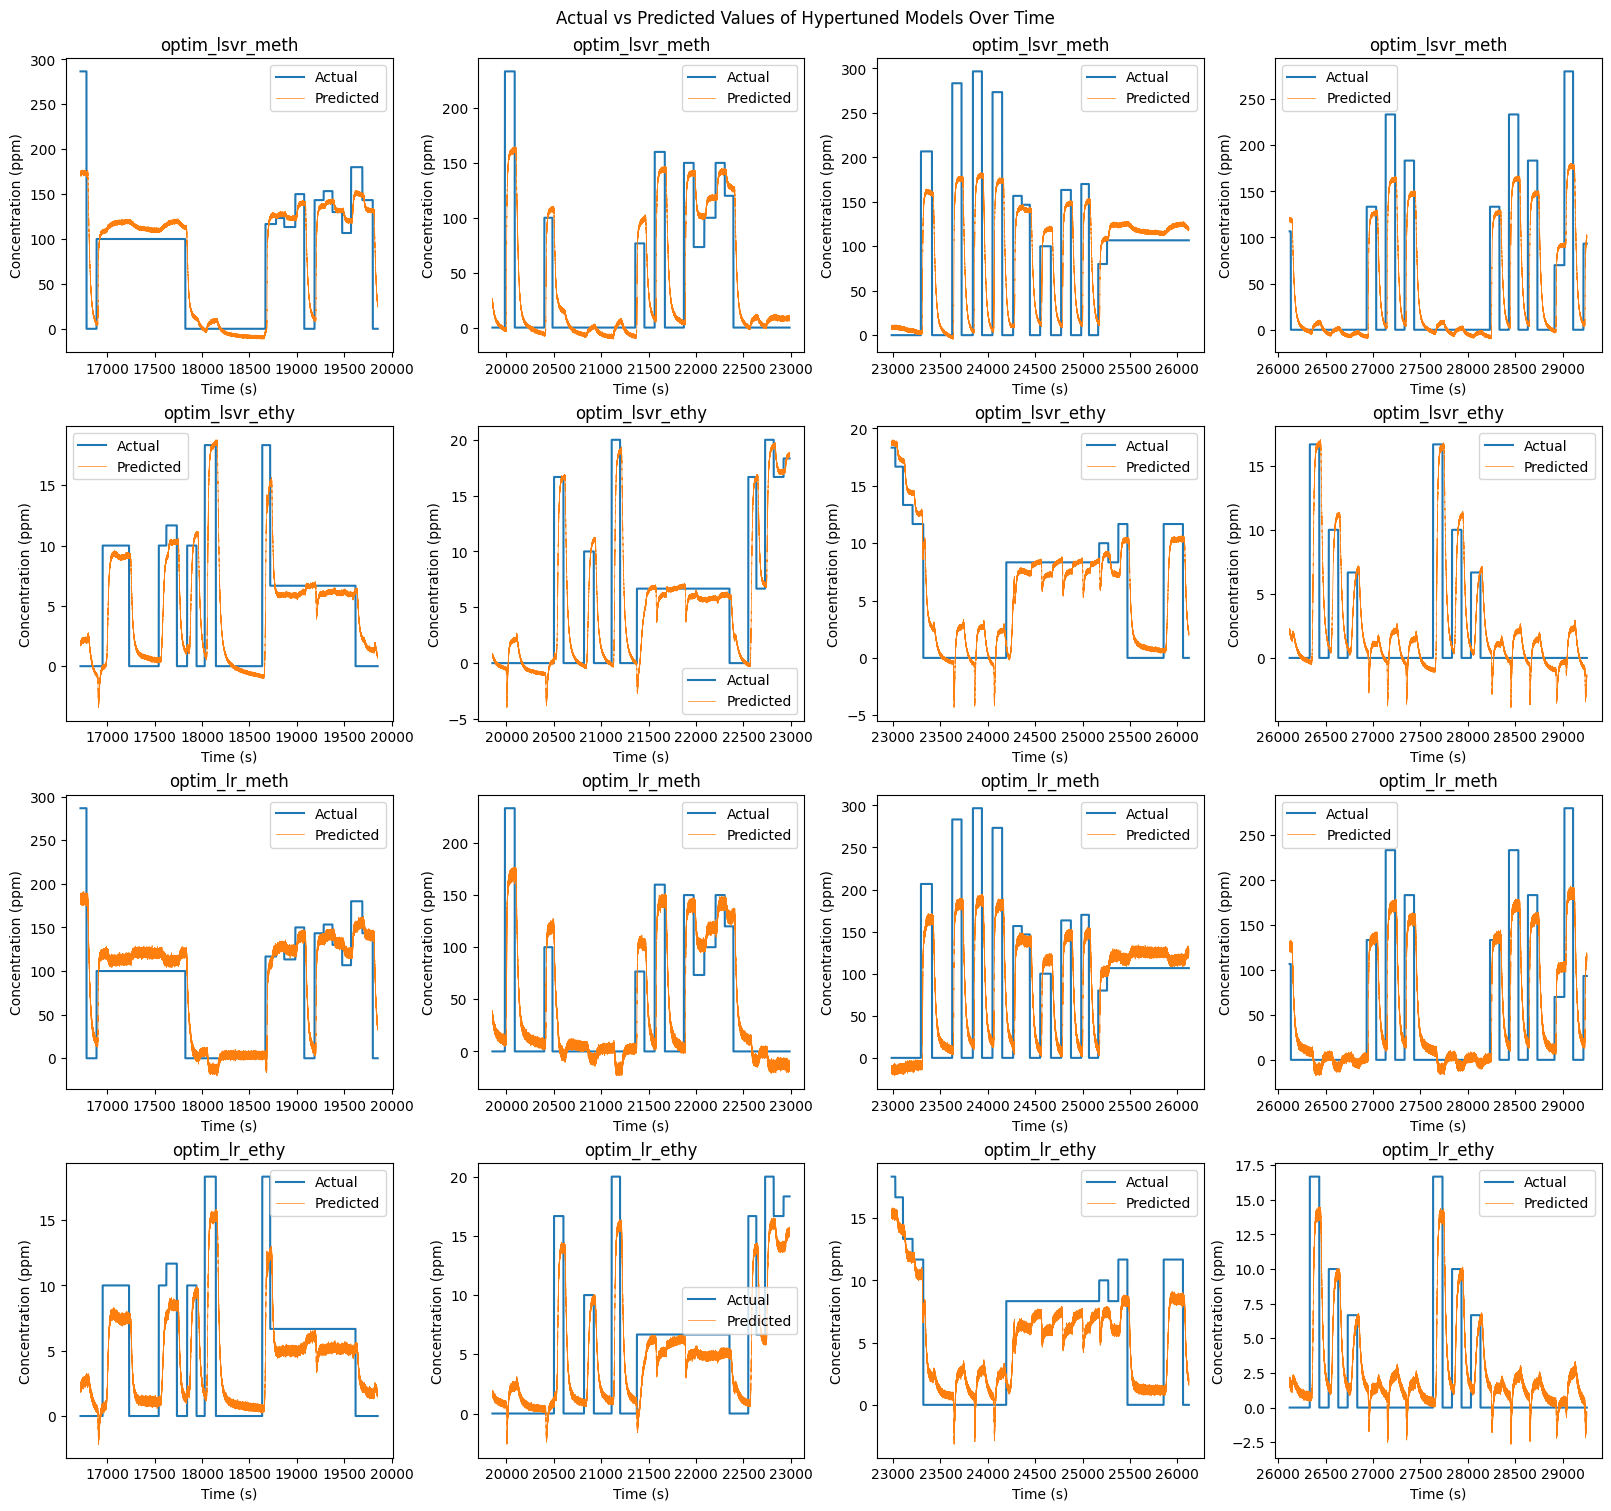

In [147]:
# Make plots of actual vs predicted values over time
fig = plt.figure(figsize=(16, 15), layout = "constrained")
fig.suptitle("Actual vs Predicted Values of Hypertuned Models Over Time")
num_ranges = 4
for i in range(len(model_collections)):
  curr_best_model_label = list(best_model_labels)[i]
  curr_best_model = model_collections[curr_best_model_label]


  for j in range(num_ranges):
    # Plot the ith range
    # Plot the predicted y values vs the actual y values
    ax1 = fig.add_subplot(len(model_collections), num_ranges, i * num_ranges + j + 1)
    ax1.set_ylabel("Concentration (ppm)")
    ax1.set_xlabel("Time (s)")
    ax1.title.set_text(curr_best_model_label)
    data_len = len(x1_test['Time'])
    ax1.plot(x1_test['Time'][j * data_len // 4: (j + 1) * data_len // 4], curr_best_model[1][j * data_len // 4: (j + 1) * data_len // 4], label = "Actual")
    ax1.plot(x1_test['Time'][j * data_len // 4: (j + 1) * data_len // 4], curr_best_model[2][j * data_len // 4: (j + 1) * data_len // 4], label = "Predicted", linewidth = 0.5)
    ax1.legend()
  # Plot the line y = x
  # Make sure that the axes are the same
  # ax1.set_aspect('equal', adjustable='box')
plt.show()